In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from matplotlib.colors import ListedColormap
import matplotlib.dates as mdates

import matplotlib.patches as mpatches
from datetime import datetime
import xarray as xr
import netCDF4 as nc
import glob
import math
import subprocess
from matplotlib import colormaps
import plotly.graph_objs as go

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import seaborn as sns
import csv
import pandas as pd
from scipy.optimize import curve_fit
from math import prod

from metpy.plots import SkewT
from metpy.units import units
from metpy.calc import dewpoint_from_relative_humidity

import numpy as np
from scipy.integrate import trapezoid


plt.rcParams['font.family'] = 'DejaVu Sans'

import warnings
warnings.simplefilter("ignore", RuntimeWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)

warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.font_manager")
warnings.filterwarnings("ignore", module="matplotlib.font_manager")

-116.29358745238027 -87.67572068430397
25.783100780887047 54.4309905374282


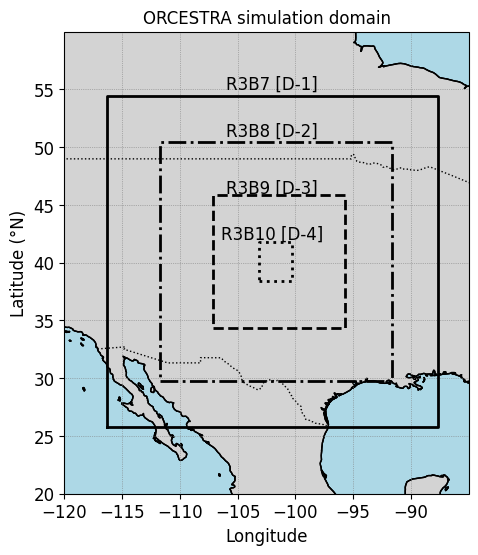

In [2]:
## ORCESTRA 3 Sept 2024 domain

lon1 = [np.rad2deg(-2.029706), np.rad2deg(-1.53023)];
lat1 = [np.rad2deg(0.45), np.rad2deg(0.95)];

lon2 = [np.rad2deg(-1.95), np.rad2deg(-1.60)];
lat2 = [np.rad2deg(0.52), np.rad2deg(0.88)];

lon3 = [np.rad2deg(-1.87), np.rad2deg(-1.67)];
lat3 = [np.rad2deg(0.6), np.rad2deg(0.80)];

lon4 = [np.rad2deg(-1.8), np.rad2deg(-1.75)];
lat4 = [np.rad2deg(0.67), np.rad2deg(0.73)];

#lon2 = [-22., -38.];
#lat2 = [-0., 17.];

#lon3 = [-25., -35.];
#lat3 = [4, 14.];

#lon4 = [-28., -32.];
#lat4 = [7., 11.];

print(np.min(lon1), np.max(lon1))
print(np.min(lat1), np.max(lat1))

fontsize = 12

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Add coastlines and features for context
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS, linestyle=':')


ax.plot([lon1[0], lon1[1], lon1[1], lon1[0], lon1[0]], 
        [lat1[0], lat1[0], lat1[1], lat1[1], lat1[0]], 
        color='black', linewidth=2, linestyle='-', transform=ccrs.PlateCarree())

ax.plot([lon2[0], lon2[1], lon2[1], lon2[0], lon2[0]], 
        [lat2[0], lat2[0], lat2[1], lat2[1], lat2[0]], 
        color='black', linewidth=2, linestyle='-.', transform=ccrs.PlateCarree())

ax.plot([lon3[0], lon3[1], lon3[1], lon3[0], lon3[0]], 
        [lat3[0], lat3[0], lat3[1], lat3[1], lat3[0]], 
        color='black', linewidth=2, linestyle='--', transform=ccrs.PlateCarree())

ax.plot([lon4[0], lon4[1], lon4[1], lon4[0], lon4[0]], 
        [lat4[0], lat4[0], lat4[1], lat4[1], lat4[0]], 
        color='black', linewidth=2, linestyle=':', transform=ccrs.PlateCarree())

ax.text(-102, 55, "R3B7 [D-1]", transform=ccrs.PlateCarree(), fontsize=fontsize-0, ha='center', color='k')#, fontweight='bold')
ax.text(-102., 51, "R3B8 [D-2]", transform=ccrs.PlateCarree(), fontsize=fontsize-0, ha='center', color='k')#, fontweight='bold')
ax.text(-102., 46, "R3B9 [D-3]", transform=ccrs.PlateCarree(), fontsize=fontsize-0, ha='center', color='k')#, fontweight='bold')
ax.text(-102., 42, "R3B10 [D-4]", transform=ccrs.PlateCarree(), fontsize=fontsize-0, ha='center', color='k')#, fontweight='bold')

ax.set_xlim(-120., -85.)
ax.set_ylim(20., 60.)
ax.set_xticks(range(-120, -85, 5))  
ax.set_yticks(range(20, 60, 5))
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)
ax.set_xlabel("Longitude", fontsize=fontsize)
ax.set_ylabel("Latitude (°N)", fontsize=fontsize)
ax.grid(True, linestyle=':', linewidth=0.5, color='grey')
ax.set_title('ORCESTRA simulation domain', fontsize=fontsize)#, fontweight='bold')

# Add oceans and continents features
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')

ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
#ax.text(-30, 26, "Atlantic Ocean", transform=ccrs.PlateCarree(), fontsize=24, fontweight='bold', ha='center', color='blue')
#ax.text(-14, 14, "Senegal", transform=ccrs.PlateCarree(), fontsize=14, fontweight='bold', ha='center', color='blue')
#ax.text(-46, -8, "Brazil", transform=ccrs.PlateCarree(), fontsize=18, fontweight='bold', ha='center', color='blue')

plt.show()

In [3]:

#ds_nosip = xr.open_mfdataset('/work/bk1415/b382718/output/steps/nested_run/icon_output/continental_ccn/latent_heat/nosip/steps_2mom_nosip/NWP_LAM_icongrid_DOM04_200006*');
ds_4sip = xr.open_mfdataset('/work/bk1415/b382718/output/steps/nested_run/icon_output/continental_ccn/latent_heat/control/steps_2mom_sip/NWP_LAM_icongrid_DOM04_200006*');
#ds_nohm = xr.open_mfdataset('/work/bk1415/b382718/output/steps/nested_run/icon_output/continental_ccn/latent_heat/nohm/steps_2mom_nohm/NWP_LAM_icongrid_DOM04_200006*');
#ds_norf = xr.open_mfdataset('/work/bk1415/b382718/output/steps/nested_run/icon_output/continental_ccn/latent_heat/norf/steps_2mom_norf/NWP_LAM_icongrid_DOM04_200006*');
#ds_nobr = xr.open_mfdataset('/work/bk1415/b382718/output/steps/nested_run/icon_output/continental_ccn/latent_heat/nobr/steps_2mom_nobr/NWP_LAM_icongrid_DOM04_200006*');
#ds_nosb = xr.open_mfdataset('/work/bk1415/b382718/output/steps/nested_run/icon_output/continental_ccn/latent_heat/nosb/steps_2mom_nosb/NWP_LAM_icongrid_DOM04_200006*');


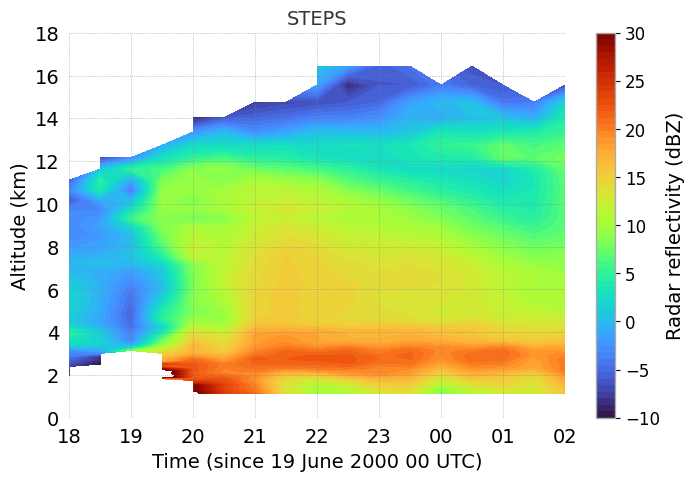

In [6]:

avg_ht = 1.e-3*ds_4sip.z_mc.mean(dim=('time','ncells'))
avg_refl_sip = ds_4sip.dbz.where(ds_4sip.dbz > -10).mean(dim=('ncells'))

colors = ['cyan', 'deepskyblue', 'mediumblue', 'lawngreen', 'limegreen', 'green', 'yellow', 'gold', 'goldenrod', 
          'coral', 'orangered', 'red', 'lightcoral', 'magenta', 'darkorchid', 'pink']
cmap = ListedColormap(colors)

lnwdth = 3
fontsize = 14
lev = np.linspace(-10, 30, 60)

plt.figure(figsize=(8, 5))
contour = plt.contourf(ds_4sip.time, avg_ht, avg_refl_sip.T, cmap='turbo', levels=lev)
colorbar = plt.colorbar(contour, ticks=[-10, -5, 0, 5, 10, 15, 20, 25, 30], label='Radar reflectivity (dBZ)')
colorbar.ax.tick_params(labelsize=12)
colorbar.set_label(label='Radar reflectivity (dBZ)', size=fontsize)

plt.xlabel('Time (since 19 June 2000 00 UTC)', fontsize=fontsize)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2000, 6, 19, 18, 0) 
end_date = datetime(2000, 6, 20, 2, 0)

plt.xlim(start_date, end_date)

plt.xticks(fontsize=fontsize)

plt.ylim([0, 18])
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.title('STEPS', fontsize=fontsize)

plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.show()




In [7]:

grid_steps = xr.open_dataset('/work/bk1415/b382718/output/steps/nested_run/icon_output/continental_ccn/latent_heat/control/steps_2mom_sip/domain4_DOM04.nc');

clon_deg = np.degrees(grid_steps.clon)
clat_deg = np.degrees(grid_steps.clat)

print(clon_deg.min().values); print(clon_deg.max().values);
print(clat_deg.min().values); print(clat_deg.max().values);

okla_x, okla_y = np.array([-102., 40.])
#print(okla_x), print(okla_y)
dx_deg = 1.; dy_deg = 1.
left_bound = okla_x - dx_deg
right_bound = okla_x + dx_deg
top_bound = okla_y + dy_deg
bottom_bound = okla_y - dy_deg

print(left_bound), print(right_bound)
print(top_bound), print(bottom_bound)


window_cell = (
    (grid_steps.clat >= np.deg2rad(bottom_bound))
    & (grid_steps.clat <= np.deg2rad(top_bound))
    & (grid_steps.clon >= np.deg2rad(left_bound))
    & (grid_steps.clon <= np.deg2rad(right_bound))
).values

(window_cell_indices,) = np.where(window_cell)

# select cells matching with the area of interest (windows_cell_indices:: matching to that with the area sampled by the aircraft)
window_vertex_indices = (np.unique(grid_steps.vertex_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_vertex_indices ::',window_vertex_indices)

# select edges matching with the area of interest (corresponding to the windows_cell_indices)
window_edge_indices = (np.unique(grid_steps.edge_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_edge_indices ::',window_edge_indices)

selected_indices = xr.Dataset(
    {
        "cell": ("cell", window_cell_indices),
        "vertex": ("vertex", window_vertex_indices),
        "edge": ("edge", window_edge_indices),
    }
)

vars_to_renumber = {
    "cell": [
        "adjacent_cell_of_edge",
        "cells_of_vertex",
        "neighbor_cell_index",
    ],
    "vertex": ["vertex_of_cell", "edge_vertices", "vertices_of_vertex"],
    "edge": ["edge_of_cell", "edges_of_vertex"],
}

def reindex_grid(grid, indices, vars_to_renumber):
    new_grid = grid.load().isel(
        cell=indices.cell, vertex=indices.vertex, edge=indices.edge
    )
    for dim, idx in indices.coords.items():
        renumbering = np.full(grid.dims[dim], -2, dtype="int")
        renumbering[idx] = np.arange(len(idx))
        for name in vars_to_renumber[dim]:
            new_grid[name].data = renumbering[new_grid[name].data - 1] + 1
    return new_grid

new_grid_steps = reindex_grid(grid_steps, selected_indices, vars_to_renumber)

mask=np.isin(ds_4sip['ncells'], selected_indices.cell)
mask_cell = mask

-104.03640368667047
-99.96295237559231
37.96466532654236
42.03547401194576
-103.0
-101.0
41.0
39.0
window_vertex_indices :: [ 3428  3433  3434 ... 27926 27927 27928]
window_edge_indices :: [10410 10411 10412 ... 81419 81420 81421]


In [8]:

#ds_nosip['w_vel'] = -1.*ds_nosip.omega/(9.8*ds_nosip.rho)
#ds_nosip['tempc'] = ds_nosip.temp-273.16;
#ds_nosip['lwc_gperm3']  = ds_nosip.qc*ds_nosip.rho*1.e3 # kgperm3 to gperm3
#ds_nosip['tqi'] = ds_nosip.qi+ds_nosip.qs+ds_nosip.qg+ds_nosip.qh
#ds_nosip['tq'] = ds_nosip.qc+ds_nosip.qi+ds_nosip.qs+ds_nosip.qg+ds_nosip.qh
#ds_nosip['ciwc_gperm3'] = ds_nosip.qi*ds_nosip.rho*1.e3 # kgperm3 to gperm3
#ds_nosip['tiwc_gperm3'] = (ds_nosip.qi+ds_nosip.qs+ds_nosip.qg+ds_nosip.qh)*ds_nosip.rho*1.e3 # kgperm3 to gperm3
#ds_nosip['cdnc_percm3'] = ds_nosip.qnc*ds_nosip.rho*1.e-6  # perkg to percm3
#ds_nosip['inc_perl'] = (ds_nosip.qni+ds_nosip.qns+ds_nosip.qng+ds_nosip.qnh)*ds_nosip.rho*1.e-3 # perkg to perl

ds_4sip['w_vel'] = -1.*ds_4sip.omega/(9.8*ds_4sip.rho)
ds_4sip['tempc'] = ds_4sip.temp-273.16;
ds_4sip['lwc_gperm3']  = ds_4sip.qc*ds_4sip.rho*1.e3 # kgperm3 to gperm3
ds_4sip['tqi'] = ds_4sip.qi+ds_4sip.qs+ds_4sip.qg+ds_4sip.qh
ds_4sip['tq'] = ds_4sip.qc+ds_4sip.qi+ds_4sip.qs+ds_4sip.qg+ds_4sip.qh
ds_4sip['ciwc_gperm3'] = ds_4sip.qi*ds_4sip.rho*1.e3 # kgperm3 to gperm3
ds_4sip['tiwc_gperm3'] = (ds_4sip.qi+ds_4sip.qs+ds_4sip.qg+ds_4sip.qh)*ds_4sip.rho*1.e3 # kgperm3 to gperm3
ds_4sip['cdnc_percm3'] = ds_4sip.qnc*ds_4sip.rho*1.e-6  # perkg to percm3
ds_4sip['inc_perl'] = (ds_4sip.qni+ds_4sip.qns+ds_4sip.qng+ds_4sip.qnh)*ds_4sip.rho*1.e-3 # perkg to perl

#ds_norf['w_vel'] = -1.*ds_norf.omega/(9.8*ds_norf.rho)
#ds_norf['tempc'] = ds_norf.temp-273.16;
#ds_norf['lwc_gperm3']  = ds_norf.qc*ds_norf.rho*1.e3 # kgperm3 to gperm3
#ds_norf['tqi'] = ds_norf.qi+ds_norf.qs+ds_norf.qg+ds_norf.qh
#ds_norf['tq'] = ds_norf.qc+ds_norf.qi+ds_norf.qs+ds_norf.qg+ds_norf.qh
#ds_norf['ciwc_gperm3'] = ds_norf.qi*ds_norf.rho*1.e3 # kgperm3 to gperm3
#ds_norf['tiwc_gperm3'] = (ds_norf.qi+ds_norf.qs+ds_norf.qg+ds_norf.qh)*ds_norf.rho*1.e3 # kgperm3 to gperm3
#ds_norf['cdnc_percm3'] = ds_norf.qnc*ds_norf.rho*1.e-6  # perkg to percm3
#ds_norf['inc_perl'] = (ds_norf.qni+ds_norf.qns+ds_norf.qng+ds_norf.qnh)*ds_norf.rho*1.e-3 # perkg to perl

#ds_nohm['w_vel'] = -1.*ds_nohm.omega/(9.8*ds_nohm.rho)
#ds_nohm['tempc'] = ds_nohm.temp-273.16;
#ds_nohm['lwc_gperm3']  = ds_nohm.qc*ds_nohm.rho*1.e3 # kgperm3 to gperm3
#ds_nohm['tqi'] = ds_nohm.qi+ds_nohm.qs+ds_nohm.qg+ds_nohm.qh
#ds_nohm['tq'] = ds_nohm.qc+ds_nohm.qi+ds_nohm.qs+ds_nohm.qg+ds_nohm.qh
#ds_nohm['ciwc_gperm3'] = ds_nohm.qi*ds_nohm.rho*1.e3 # kgperm3 to gperm3
#ds_nohm['tiwc_gperm3'] = (ds_nohm.qi+ds_nohm.qs+ds_nohm.qg+ds_nohm.qh)*ds_nohm.rho*1.e3 # kgperm3 to gperm3
#ds_nohm['cdnc_percm3'] = ds_nohm.qnc*ds_nohm.rho*1.e-6  # perkg to percm3
#ds_nohm['inc_perl'] = (ds_nohm.qni+ds_nohm.qns+ds_nohm.qng+ds_nohm.qnh)*ds_nohm.rho*1.e-3 # perkg to perl

#ds_nobr['w_vel'] = -1.*ds_nobr.omega/(9.8*ds_nobr.rho)
#ds_nobr['tempc'] = ds_nobr.temp-273.16;
#ds_nobr['lwc_gperm3']  = ds_nobr.qc*ds_nobr.rho*1.e3 # kgperm3 to gperm3
#ds_nobr['tqi'] = ds_nobr.qi+ds_nobr.qs+ds_nobr.qg+ds_nobr.qh
#ds_nobr['tq'] = ds_nobr.qc+ds_nobr.qi+ds_nobr.qs+ds_nobr.qg+ds_nobr.qh
#ds_nobr['ciwc_gperm3'] = ds_nobr.qi*ds_nobr.rho*1.e3 # kgperm3 to gperm3
#ds_nobr['tiwc_gperm3'] = (ds_nobr.qi+ds_nobr.qs+ds_nobr.qg+ds_nobr.qh)*ds_nobr.rho*1.e3 # kgperm3 to gperm3
#ds_nobr['cdnc_percm3'] = ds_nobr.qnc*ds_nobr.rho*1.e-6  # perkg to percm3
#ds_nobr['inc_perl'] = (ds_nobr.qni+ds_nobr.qns+ds_nobr.qng+ds_nobr.qnh)*ds_nobr.rho*1.e-3 # perkg to perl

#ds_nosb['w_vel'] = -1.*ds_nosb.omega/(9.8*ds_nosb.rho)
#ds_nosb['tempc'] = ds_nosb.temp-273.16;
#ds_nosb['lwc_gperm3']  = ds_nosb.qc*ds_nosb.rho*1.e3 # kgperm3 to gperm3
#ds_nosb['tqi'] = ds_nosb.qi+ds_nosb.qs+ds_nosb.qg+ds_nosb.qh
#ds_nosb['tq'] = ds_nosb.qc+ds_nosb.qi+ds_nosb.qs+ds_nosb.qg+ds_nosb.qh
#ds_nosb['ciwc_gperm3'] = ds_nosb.qi*ds_nosb.rho*1.e3 # kgperm3 to gperm3
#ds_nosb['tiwc_gperm3'] = (ds_nosb.qi+ds_nosb.qs+ds_nosb.qg+ds_nosb.qh)*ds_nosb.rho*1.e3 # kgperm3 to gperm3
#ds_nosb['cdnc_percm3'] = ds_nosb.qnc*ds_nosb.rho*1.e-6  # perkg to percm3
#ds_nosb['inc_perl'] = (ds_nosb.qni+ds_nosb.qns+ds_nosb.qng+ds_nosb.qnh)*ds_nosb.rho*1.e-3 # perkg to perl


In [9]:
aircraft_starttime='2000-06-19T20:00:00.000000000'
aircraft_endtime='2000-06-20T02:00:00.000000000'

#ds_nosip_new = ds_nosip.sel(ncells=mask,time=slice(aircraft_starttime, aircraft_endtime))
ds_4sip_new = ds_4sip.sel(ncells=mask,time=slice(aircraft_starttime, aircraft_endtime))
#ds_norf_new = ds_norf.sel(ncells=mask,time=slice(aircraft_starttime, aircraft_endtime))
#ds_nohm_new = ds_nohm.sel(ncells=mask,time=slice(aircraft_starttime, aircraft_endtime))
#ds_nobr_new = ds_nobr.sel(ncells=mask,time=slice(aircraft_starttime, aircraft_endtime))
#ds_nosb_new = ds_nosb.sel(ncells=mask,time=slice(aircraft_starttime, aircraft_endtime))


In [10]:

w_thres = 1.
###### Without SIP
# lwc gperm3
#filt_lwc_up_perl = xr.where((ds_nosip_new.lwc_gperm3 > 1.e-6) & (ds_nosip_new.w_vel > w_thres), ds_nosip_new.lwc_gperm3, np.nan)
#filt_lwc_dn_perl = xr.where((ds_nosip_new.lwc_gperm3 > 1.e-6) & (ds_nosip_new.w_vel < -1.*w_thres), ds_nosip_new.lwc_gperm3, np.nan)
#filt_lwc_st_perl = xr.where((ds_nosip_new.lwc_gperm3 > 1.e-6) & (np.abs(ds_nosip_new.w_vel) < w_thres), ds_nosip_new.lwc_gperm3, np.nan)

#lwc_up_nosip = filt_lwc_up_perl.mean(dim=('time','ncells'))
#lwc_dn_nosip = filt_lwc_dn_perl.mean(dim=('time','ncells'))
#lwc_st_nosip = filt_lwc_st_perl.mean(dim=('time','ncells'))

#tempc_nosip = ds_nosip_new.tempc.mean(dim=('time','ncells'))

# iwc gperm3
#filt_tiwc_up_perl = xr.where((ds_nosip_new.tiwc_gperm3 > 1.e-6) & (ds_nosip_new.w_vel > w_thres), ds_nosip_new.tiwc_gperm3, np.nan)
#filt_tiwc_dn_perl = xr.where((ds_nosip_new.tiwc_gperm3 > 1.e-6) & (ds_nosip_new.w_vel < -1.*w_thres), ds_nosip_new.tiwc_gperm3, np.nan)
#filt_tiwc_st_perl = xr.where((ds_nosip_new.tiwc_gperm3 > 1.e-6) & (np.abs(ds_nosip_new.w_vel) < w_thres), ds_nosip_new.tiwc_gperm3, np.nan)

#tiwc_up_nosip = filt_tiwc_up_perl.mean(dim=('time','ncells'))
#tiwc_dn_nosip = filt_tiwc_dn_perl.mean(dim=('time','ncells'))
#tiwc_st_nosip = filt_tiwc_st_perl.mean(dim=('time','ncells'))

# CDNC percm3
#filt_cdnc_up_perl = xr.where((ds_nosip_new.cdnc_percm3 > 1.e-6) & (ds_nosip_new.w_vel > w_thres), ds_nosip_new.cdnc_percm3, np.nan)
#filt_cdnc_dn_perl = xr.where((ds_nosip_new.cdnc_percm3 > 1.e-6) & (ds_nosip_new.w_vel < -1.*w_thres), ds_nosip_new.cdnc_percm3, np.nan)
#filt_cdnc_st_perl = xr.where((ds_nosip_new.cdnc_percm3 > 1.e-6) & (np.abs(ds_nosip_new.w_vel) < w_thres), ds_nosip_new.cdnc_percm3, np.nan)

#cdnc_up_nosip = filt_cdnc_up_perl.mean(dim=('time','ncells'))
#cdnc_dn_nosip = filt_cdnc_dn_perl.mean(dim=('time','ncells'))
#cdnc_st_nosip = filt_cdnc_st_perl.mean(dim=('time','ncells'))


###### With SIP
# lwc gperm3
filt_lwc_up_perl = xr.where((ds_4sip_new.lwc_gperm3 > 1.e-6) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.lwc_gperm3, np.nan)
filt_lwc_dn_perl = xr.where((ds_4sip_new.lwc_gperm3 > 1.e-6) & (ds_4sip_new.w_vel < -1.*w_thres), ds_4sip_new.lwc_gperm3, np.nan)
filt_lwc_st_perl = xr.where((ds_4sip_new.lwc_gperm3 > 1.e-6) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.lwc_gperm3, np.nan)

lwc_up_sip = filt_lwc_up_perl.mean(dim=('time','ncells'))
lwc_dn_sip = filt_lwc_dn_perl.mean(dim=('time','ncells'))
lwc_st_sip = filt_lwc_st_perl.mean(dim=('time','ncells'))

tempc_sip = ds_4sip_new.tempc.mean(dim=('time','ncells'))

# iwc gperm3
filt_tiwc_up_perl = xr.where((ds_4sip_new.tiwc_gperm3 > 1.e-6) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.tiwc_gperm3, np.nan)
filt_tiwc_dn_perl = xr.where((ds_4sip_new.tiwc_gperm3 > 1.e-6) & (ds_4sip_new.w_vel < -1.*w_thres), ds_4sip_new.tiwc_gperm3, np.nan)
filt_tiwc_st_perl = xr.where((ds_4sip_new.tiwc_gperm3 > 1.e-6) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.tiwc_gperm3, np.nan)

tiwc_up_sip = filt_tiwc_up_perl.mean(dim=('time','ncells'))
tiwc_dn_sip = filt_tiwc_dn_perl.mean(dim=('time','ncells'))
tiwc_st_sip = filt_tiwc_st_perl.mean(dim=('time','ncells'))

# CDNC percm3
filt_cdnc_up_perl = xr.where((ds_4sip_new.cdnc_percm3 > 1.e-6) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.cdnc_percm3, np.nan)
filt_cdnc_dn_perl = xr.where((ds_4sip_new.cdnc_percm3 > 1.e-6) & (ds_4sip_new.w_vel < -1.*w_thres), ds_4sip_new.cdnc_percm3, np.nan)
filt_cdnc_st_perl = xr.where((ds_4sip_new.cdnc_percm3 > 1.e-6) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.cdnc_percm3, np.nan)

cdnc_up_sip = filt_cdnc_up_perl.mean(dim=('time','ncells'))
cdnc_dn_sip = filt_cdnc_dn_perl.mean(dim=('time','ncells'))
cdnc_st_sip = filt_cdnc_st_perl.mean(dim=('time','ncells'))


In [8]:

####================== Boxplot of ICON-LWC [4-SIP]
w_thres = 1.
thres_q = 1.e-6
###### Without SIP
# lwc gperm3
lwc_4sip_up_gperm3 = xr.where((ds_4sip_new.qc > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.lwc_gperm3, np.nan)
lwc_4sip_dn_gperm3 = xr.where((ds_4sip_new.qc > thres_q) & (ds_4sip_new.w_vel > -1.*w_thres), ds_4sip_new.lwc_gperm3, np.nan)
lwc_4sip_st_gperm3 = xr.where((ds_4sip_new.qc > thres_q) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.lwc_gperm3, np.nan)
tempc_4sip = ds_4sip_new.tempc

lwc_4sip_up_gperm3 = lwc_4sip_up_gperm3.values.flatten()
lwc_4sip_dn_gperm3 = lwc_4sip_dn_gperm3.values.flatten()
lwc_4sip_st_gperm3 = lwc_4sip_st_gperm3.values.flatten()
tempc_4sip = tempc_4sip.values.flatten()

df_lwc_4sip = pd.DataFrame({
    'lwc_up': lwc_4sip_up_gperm3,
    'lwc_dn': lwc_4sip_dn_gperm3,
    'lwc_st': lwc_4sip_st_gperm3,
    'tempc': tempc_4sip,
})

tempc_bin = np.arange(-50., 20., 5.)  # Temperature bins 
tempc_bin = np.sort(tempc_bin)

df_lwc_4sip['temp_bin'] = np.digitize(df_lwc_4sip['tempc'], bins=tempc_bin, right=False)

bin_edges = np.concatenate([tempc_bin - 2, [tempc_bin[-1] + 2]])  
df_lwc_4sip['temp_bin'] = bin_edges[df_lwc_4sip['temp_bin']]

df_lwc_up_4sip = df_lwc_4sip[['lwc_up', 'temp_bin']].dropna()
df_lwc_dn_4sip = df_lwc_4sip[['lwc_dn', 'temp_bin']].dropna()
df_lwc_st_4sip = df_lwc_4sip[['lwc_st', 'temp_bin']].dropna()

df_lwc_up_4sip = df_lwc_up_4sip.dropna(subset=['temp_bin'])
df_lwc_dn_4sip = df_lwc_dn_4sip.dropna(subset=['temp_bin'])
df_lwc_st_4sip = df_lwc_st_4sip.dropna(subset=['temp_bin'])

lwc_4sip_up_by_bin = [df_lwc_up_4sip[df_lwc_up_4sip['temp_bin'] == temp]['lwc_up'].values for temp in bin_edges]
lwc_4sip_dn_by_bin = [df_lwc_dn_4sip[df_lwc_dn_4sip['temp_bin'] == temp]['lwc_dn'].values for temp in bin_edges]
lwc_4sip_st_by_bin = [df_lwc_st_4sip[df_lwc_st_4sip['temp_bin'] == temp]['lwc_st'].values for temp in bin_edges]


In [9]:

####================== Boxplot of ICON-LWC [3-SIP]
w_thres = 1.
thres_q = 1.e-6
###### Without SIP
# lwc gperm3
cdnc_4sip_up_percm3 = xr.where((ds_4sip_new.qc > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.cdnc_percm3, np.nan)
cdnc_4sip_dn_percm3 = xr.where((ds_4sip_new.qc > thres_q) & (ds_4sip_new.w_vel > -1.*w_thres), ds_4sip_new.cdnc_percm3, np.nan)
cdnc_4sip_st_percm3 = xr.where((ds_4sip_new.qc > thres_q) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.cdnc_percm3, np.nan)
tempc_4sip = ds_4sip_new.tempc

cdnc_4sip_up_percm3 = cdnc_4sip_up_percm3.values.flatten()
cdnc_4sip_dn_percm3 = cdnc_4sip_dn_percm3.values.flatten()
cdnc_4sip_st_percm3 = cdnc_4sip_st_percm3.values.flatten()
tempc_4sip = tempc_4sip.values.flatten()

df_cdnc_4sip = pd.DataFrame({
    'cdnc_up': cdnc_4sip_up_percm3,
    'cdnc_dn': cdnc_4sip_dn_percm3,
    'cdnc_st': cdnc_4sip_st_percm3,
    'tempc': tempc_4sip,
})

tempc_bin = np.arange(-50., 20., 5.)  # Temperature bins 
tempc_bin = np.sort(tempc_bin)

df_cdnc_4sip['temp_bin'] = np.digitize(df_cdnc_4sip['tempc'], bins=tempc_bin, right=False)

bin_edges = np.concatenate([tempc_bin - 2, [tempc_bin[-1] + 2]])  
df_cdnc_4sip['temp_bin'] = bin_edges[df_cdnc_4sip['temp_bin']]

df_cdnc_up_4sip = df_cdnc_4sip[['cdnc_up', 'temp_bin']].dropna()
df_cdnc_dn_4sip = df_cdnc_4sip[['cdnc_dn', 'temp_bin']].dropna()
df_cdnc_st_4sip = df_cdnc_4sip[['cdnc_st', 'temp_bin']].dropna()

df_cdnc_up_4sip = df_cdnc_up_4sip.dropna(subset=['temp_bin'])
df_cdnc_dn_4sip = df_cdnc_dn_4sip.dropna(subset=['temp_bin'])
df_cdnc_st_4sip = df_cdnc_st_4sip.dropna(subset=['temp_bin'])

cdnc_4sip_up_by_bin = [df_cdnc_up_4sip[df_cdnc_up_4sip['temp_bin'] == temp]['cdnc_up'].values for temp in bin_edges]
cdnc_4sip_dn_by_bin = [df_cdnc_dn_4sip[df_cdnc_dn_4sip['temp_bin'] == temp]['cdnc_dn'].values for temp in bin_edges]
cdnc_4sip_st_by_bin = [df_cdnc_st_4sip[df_cdnc_st_4sip['temp_bin'] == temp]['cdnc_st'].values for temp in bin_edges]


In [10]:

####================== Boxplot of ICON-LWC [3-SIP]
w_thres = 1.
thres_q = 1.e-5
###### 4-SIP
# lwc gperm3
inc_4sip_up_perl = xr.where((ds_4sip_new.tqi > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.inc_perl, np.nan)
inc_4sip_dn_perl = xr.where((ds_4sip_new.tqi > thres_q) & (ds_4sip_new.w_vel > -1.*w_thres), ds_4sip_new.inc_perl, np.nan)
inc_4sip_st_perl = xr.where((ds_4sip_new.tqi > thres_q) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.inc_perl, np.nan)
tempc_4sip = ds_4sip_new.tempc

inc_4sip_up_perl = inc_4sip_up_perl.values.flatten()
inc_4sip_dn_perl = inc_4sip_dn_perl.values.flatten()
inc_4sip_st_perl = inc_4sip_st_perl.values.flatten()
tempc_4sip = tempc_4sip.values.flatten()

df_inc_4sip = pd.DataFrame({
    'inc_up': inc_4sip_up_perl,
    'inc_dn': inc_4sip_dn_perl,
    'inc_st': inc_4sip_st_perl,
    'tempc': tempc_4sip,
})

tempc_bin = np.arange(-50., 20., 5.)  # Temperature bins 
tempc_bin = np.sort(tempc_bin)

df_inc_4sip['temp_bin'] = np.digitize(df_inc_4sip['tempc'], bins=tempc_bin, right=False)

bin_edges = np.concatenate([tempc_bin - 2, [tempc_bin[-1] + 2]])  
df_inc_4sip['temp_bin'] = bin_edges[df_inc_4sip['temp_bin']]

df_inc_up_4sip = df_inc_4sip[['inc_up', 'temp_bin']].dropna()
df_inc_dn_4sip = df_inc_4sip[['inc_dn', 'temp_bin']].dropna()
df_inc_st_4sip = df_inc_4sip[['inc_st', 'temp_bin']].dropna()

df_inc_up_4sip = df_inc_up_4sip.dropna(subset=['temp_bin'])
df_inc_dn_4sip = df_inc_dn_4sip.dropna(subset=['temp_bin'])
df_inc_st_4sip = df_inc_st_4sip.dropna(subset=['temp_bin'])

inc_4sip_up_by_bin = [df_inc_up_4sip[df_inc_up_4sip['temp_bin'] == temp]['inc_up'].values for temp in bin_edges]
inc_4sip_dn_by_bin = [df_inc_dn_4sip[df_inc_dn_4sip['temp_bin'] == temp]['inc_dn'].values for temp in bin_edges]
inc_4sip_st_by_bin = [df_inc_st_4sip[df_inc_st_4sip['temp_bin'] == temp]['inc_st'].values for temp in bin_edges]


In [11]:

####================== Boxplot of ICON-LWC [3-SIP]
w_thres = 1.
thres_q = 1.e-9
###### Without SIP
# lwc gperm3
iwc_4sip_up_gperm3 = xr.where((ds_4sip_new.tqi > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.tiwc_gperm3, np.nan)
iwc_4sip_dn_gperm3 = xr.where((ds_4sip_new.tqi > thres_q) & (ds_4sip_new.w_vel > -1.*w_thres), ds_4sip_new.tiwc_gperm3, np.nan)
iwc_4sip_st_gperm3 = xr.where((ds_4sip_new.tqi > thres_q) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.tiwc_gperm3, np.nan)
tempc_4sip = ds_4sip_new.tempc

iwc_4sip_up_gperm3 = iwc_4sip_up_gperm3.values.flatten()
iwc_4sip_dn_gperm3 = iwc_4sip_dn_gperm3.values.flatten()
iwc_4sip_st_gperm3 = iwc_4sip_st_gperm3.values.flatten()
tempc_4sip = tempc_4sip.values.flatten()

df_iwc_4sip = pd.DataFrame({
    'iwc_up': iwc_4sip_up_gperm3,
    'iwc_dn': iwc_4sip_dn_gperm3,
    'iwc_st': iwc_4sip_st_gperm3,
    'tempc': tempc_4sip,
})

tempc_bin = np.arange(-50., 20., 5.)  # Temperature bins 
tempc_bin = np.sort(tempc_bin)

df_iwc_4sip['temp_bin'] = np.digitize(df_iwc_4sip['tempc'], bins=tempc_bin, right=False)

bin_edges = np.concatenate([tempc_bin - 2, [tempc_bin[-1] + 2]])  
df_iwc_4sip['temp_bin'] = bin_edges[df_iwc_4sip['temp_bin']]

df_iwc_up_4sip = df_iwc_4sip[['iwc_up', 'temp_bin']].dropna()
df_iwc_dn_4sip = df_iwc_4sip[['iwc_dn', 'temp_bin']].dropna()
df_iwc_st_4sip = df_iwc_4sip[['iwc_st', 'temp_bin']].dropna()

df_iwc_up_4sip = df_iwc_up_4sip.dropna(subset=['temp_bin'])
df_iwc_dn_4sip = df_iwc_dn_4sip.dropna(subset=['temp_bin'])
df_iwc_st_4sip = df_iwc_st_4sip.dropna(subset=['temp_bin'])

iwc_4sip_up_by_bin = [df_iwc_up_4sip[df_iwc_up_4sip['temp_bin'] == temp]['iwc_up'].values for temp in bin_edges]
iwc_4sip_dn_by_bin = [df_iwc_dn_4sip[df_iwc_dn_4sip['temp_bin'] == temp]['iwc_dn'].values for temp in bin_edges]
iwc_4sip_st_by_bin = [df_iwc_st_4sip[df_iwc_st_4sip['temp_bin'] == temp]['iwc_st'].values for temp in bin_edges]


In [12]:

# Open the dataset
import xarray as xr
import netCDF4

ds_air_obs = netCDF4.Dataset('/work/bk1415/b382718/output/steps/observations/aircraft_data/T28_STEPS2000_756.nc', 'r')
#print(ds_air_obs.variables)  # View available variables

ds_obs_tim = ds_air_obs.variables['Time'][:]
ds_obs_hrs = ds_air_obs.variables['TIME_HOURS_20Hz'][:]  
ds_obs_min = ds_air_obs.variables['TIME_MINUTES_20Hz'][:]  
ds_obs_sec = ds_air_obs.variables['TIME_SECONDS_20Hz'][:]                                  
ds_obs_temp_rm = ds_air_obs.variables['TEMPERATURE_ROSEMOUNT_SENSOR'][:]                 # C
ds_obs_temp_rf = ds_air_obs.variables['TEMPERATURE_REVERSE_FLOW_SENSOR'][:]              # C
ds_obs_air_den = ds_air_obs.variables['DENSITY_AIR'][:]                                  # kg/m3
ds_obs_no_conc = ds_air_obs.variables['NO_CONCENTRATION'][:]                             # ppb
ds_obs_fssp_lwc = ds_air_obs.variables['FSSP_LIQUID_WATER'][:]                           # g/m3
ds_obs_tot_cnt = ds_air_obs.variables['FSSP_TOTAL_COUNTS'][:]                            # count
ds_obs_fssp_diam = ds_air_obs.variables['FSSP_AVERAGE_DIAMETER'][:]                      # µm
ds_obs_fssp_tot_conc = ds_air_obs.variables['FSSP_TOTAL_PARTICLE_CONCENTRATION'][:]      # count/cm3
ds_obs_fssp_eq_diam = ds_air_obs.variables['FSSP_EQUIVALENT_DIAMETER'][:]                # µm
ds_obs_fssp_qc = ds_air_obs.variables['FSSP_LIQUID_WATER_MIXING_RATIO'][:]               # gperkg
ds_obs_w = ds_air_obs.variables['UPDRAFT'][:]               # gperkg


###
mask_rho = (ds_obs_air_den < 0.5)
ds_obs_air_den[mask_rho] = np.nan
ds_obs_avg_rho = np.nanmean(ds_obs_air_den, axis=1) 
###

###
#mask_diam = (ds_obs_fssp_diam > 100.)
#ds_obs_fssp_diam[mask_diam] = np.nan
ds_obs_avg_diam = np.nanmean(ds_obs_fssp_diam, axis=1) 
###

###
#mask_tot_conc = (ds_obs_fssp_tot_conc > 2500.)
#ds_obs_fssp_tot_conc[mask_tot_conc] = np.nan
ds_obs_avg_tot_conc = np.nanmean(ds_obs_fssp_tot_conc, axis=1) 
###

###
#mask_eq_diam = (ds_obs_fssp_eq_diam > 100.)
#ds_obs_fssp_eq_diam[mask_eq_diam] = np.nan
ds_obs_avg_eqv_diam = np.nanmean(ds_obs_fssp_eq_diam, axis=1) 
###

###
#mask_qc = (ds_obs_fssp_qc > 25.)
#ds_obs_fssp_qc[mask_qc] = np.nan
ds_obs_avg_qc = np.nanmean(ds_obs_fssp_qc, axis=1) 
###

###
#mask_lwc = (ds_obs_fssp_lwc > 6.)
#ds_obs_fssp_lwc[mask_lwc] = np.nan
ds_obs_avg_lwc = np.nanmean(ds_obs_fssp_lwc, axis=1) 
###


###
mask_w = (np.abs(ds_obs_w) > 20.)
ds_obs_w[mask_w] = np.nan
ds_obs_avg_w = np.nanmean(ds_obs_w, axis=1) 
###

ds_obs_avg_tc = np.nanmean(ds_obs_temp_rm, axis=1)

####
w_thres = 1. 
####
filt_lwc_fssp_up_cond = (ds_obs_avg_lwc > 1.e-4) & (ds_obs_avg_w > w_thres)
filt_lwc_fssp_dn_cond = (ds_obs_avg_lwc > 1.e-4) & (ds_obs_avg_w < -1.*w_thres)
filt_lwc_fssp_st_cond = (ds_obs_avg_lwc > 1.e-4) & (np.abs(ds_obs_avg_w) < w_thres)

fssp_lwc_up = np.where(filt_lwc_fssp_up_cond, ds_obs_avg_lwc, np.nan)
fssp_lwc_dn = np.where(filt_lwc_fssp_dn_cond, ds_obs_avg_lwc, np.nan)
fssp_lwc_st = np.where(filt_lwc_fssp_st_cond, ds_obs_avg_lwc, np.nan)

#####
filt_avg_diam_up_cond = (ds_obs_avg_diam > 0.) & (ds_obs_avg_w > w_thres)
filt_avg_diam_dn_cond = (ds_obs_avg_diam > 0.) & (ds_obs_avg_w < -1.*w_thres)
filt_avg_diam_st_cond = (ds_obs_avg_diam > 0.) & (np.abs(ds_obs_avg_w) < w_thres)

fssp_avg_diam_up = np.where(filt_avg_diam_up_cond, ds_obs_avg_diam, np.nan)
fssp_avg_diam_dn = np.where(filt_avg_diam_dn_cond, ds_obs_avg_diam, np.nan)
fssp_avg_diam_st = np.where(filt_avg_diam_st_cond, ds_obs_avg_diam, np.nan)

###
filt_eqv_diam_up_cond = (ds_obs_avg_eqv_diam > 0.) & (ds_obs_avg_w > w_thres)
filt_eqv_diam_dn_cond = (ds_obs_avg_eqv_diam > 0.) & (ds_obs_avg_w < -1.*w_thres)
filt_eqv_diam_st_cond = (ds_obs_avg_eqv_diam > 0.) & (np.abs(ds_obs_avg_w) < w_thres)

fssp_avg_eqv_diam_up = np.where(filt_eqv_diam_up_cond, ds_obs_avg_eqv_diam, np.nan)
fssp_avg_eqv_diam_dn = np.where(filt_eqv_diam_dn_cond, ds_obs_avg_eqv_diam, np.nan)
fssp_avg_eqv_diam_st = np.where(filt_eqv_diam_st_cond, ds_obs_avg_eqv_diam, np.nan)

###
filt_tot_conc_up_cond = (ds_obs_avg_tot_conc > 0.) & (ds_obs_avg_w > w_thres)
filt_tot_conc_dn_cond = (ds_obs_avg_tot_conc > 0.) & (ds_obs_avg_w < -1.*w_thres)
filt_tot_conc_st_cond = (ds_obs_avg_tot_conc > 0.) & (np.abs(ds_obs_avg_w) < w_thres)

fssp_tot_conc_up = np.where(filt_tot_conc_up_cond, ds_obs_avg_tot_conc, np.nan)
fssp_tot_conc_dn = np.where(filt_tot_conc_dn_cond, ds_obs_avg_tot_conc, np.nan)
fssp_tot_conc_st = np.where(filt_tot_conc_st_cond, ds_obs_avg_tot_conc, np.nan)


###
df_t28_obs = pd.DataFrame({
    'tempc': ds_obs_avg_tc,
    'w_vel': ds_obs_avg_w,
    'air_den':ds_obs_avg_rho,
    'fssp_mean_diam':ds_obs_avg_diam,
    'fssp_eqv_diam':ds_obs_avg_eqv_diam,
    'fssp_qc':ds_obs_avg_qc,
    'fssp_lwc':ds_obs_avg_lwc,
    'fssp_tot_conc':ds_obs_avg_tot_conc,
    'lwc_up':fssp_lwc_up,
    'lwc_dn':fssp_lwc_dn,
    'lwc_st':fssp_lwc_st,
    'avg_diam_up':fssp_avg_diam_up,
    'avg_diam_dn':fssp_avg_diam_dn,
    'avg_diam_st':fssp_avg_diam_st,
    'eqv_diam_up':fssp_avg_eqv_diam_up,
    'eqv_diam_dn':fssp_avg_eqv_diam_dn,
    'eqv_diam_st':fssp_avg_eqv_diam_st,
    'tot_conc_up':fssp_tot_conc_up,
    'tot_conc_dn':fssp_tot_conc_dn,
    'tot_conc_st':fssp_tot_conc_st 
})

#plt.plot(ds_obs_fssp_qc,ds_obs_temp_rm)
#plt.plot(ds_obs_avg_lwc,ds_obs_avg_tc)
#plt.ylim(0,-30)
#plt.grid(True)

print(df_t28_obs.shape)

(5306, 20)


In [33]:

ds_t28

<xarray.Dataset> Size: 34MB
Dimensions:                            (Time: 5306, sps20: 20)
Coordinates:
    LATITUDE_DECIMAL_DEG_20Hz          (Time, sps20) float32 424kB 39.37 ... 0.0
    LONGITUDE_DECIMAL_DEG_20Hz         (Time, sps20) float32 424kB -101.7 ......
    GPS_ALTITUDE                       (Time, sps20) float32 424kB ...
    Time                               (Time, sps20) datetime64[ns] 849kB ...
Dimensions without coordinates: sps20
Data variables: (12/72)
    TIME_HOURS_20Hz                    (Time, sps20) float32 424kB ...
    TIME_MINUTES_20Hz                  (Time, sps20) float32 424kB ...
    TIME_SECONDS_20Hz                  (Time, sps20) timedelta64[ns] 849kB ...
    PRESSURE_STATIC_1                  (Time, sps20) float32 424kB ...
    PRESSURE_STATIC_2                  (Time, sps20) float32 424kB ...
    TEMPERATURE_ROSEMOUNT_SENSOR       (Time, sps20) float32 424kB ...
    ...                                 ...
    VOLTAGE_REGULATOR                  (Time, sps20) float32 424kB ...
    INTERIOR_TEMPERATURE               (Time, sps20) float32 424kB ...
    HEATER_CURRENT                     (Time, sps20) float32 424kB ...
    TIME_GPS_DECIMAL                   (Time, sps20) float32 424kB ...
    EVENT_MARKERS                      (Time, sps20) float32 424kB ...
    time                               (Time, sps20) timedelta64[ns] 849kB ...
Attributes:
    FlightNumber:  756
    Year:          2000
    FlightDate:    06/20/2000
    TimeInterval:  00:17:07-01:45:32
    Conventions:   NCAR-RAF/nimbus
    slowpoints:    5306
    fastpoints:    106101

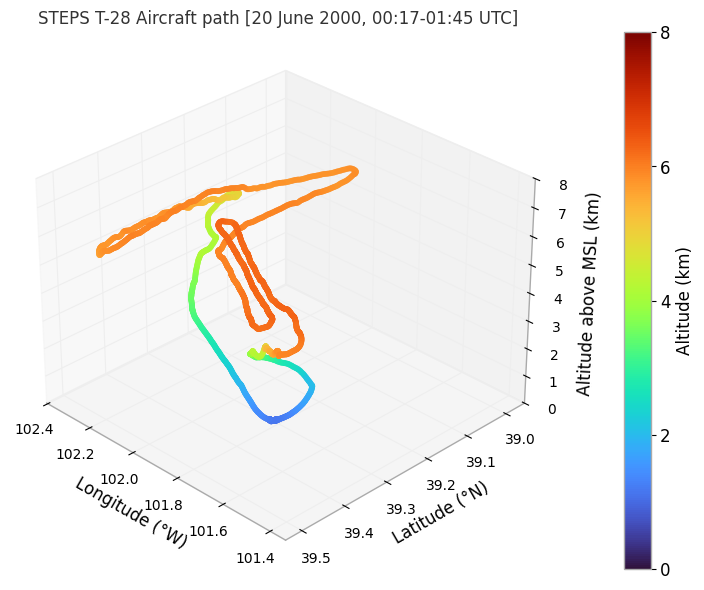

In [35]:
ds_t28 = xr.open_dataset('/work/bk1415/b382718/output/steps/observations/aircraft_data/T28_STEPS2000_756.nc')
ds_t28.LATITUDE_DECIMAL_DEG_20Hz[1, 1:20].values

mean_lon = np.nanmean(ds_t28.LONGITUDE_DECIMAL_DEG_20Hz, axis=1)
mean_lat = np.nanmean(ds_t28.LATITUDE_DECIMAL_DEG_20Hz, axis=1)
mean_alt = 1.e-3*np.nanmean(ds_t28.PRESSURE_ALTITUDE, axis=1)
mean_lon[mean_lon > -101] = np.nan
mean_lat[mean_lat < 38] = np.nan

#plt.plot(mean_alt)

fnt = 12
lnw = 3
# 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with altitude as color
sc = ax.scatter(-1*mean_lon, mean_lat, mean_alt, c=mean_alt, cmap='turbo', s=10, vmin=0, vmax=8)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax, ticks=[0, 2, 4, 6, 8], pad=0.1)
cbar.set_label('Altitude (km)', fontsize=fnt)
cbar.ax.tick_params(labelsize=fnt)

# Axis labels
#ax.set_ylim(33,35)
#ax.set_xlim(-105,-107)
ax.set_zlim(0,8)
ax.set_xlabel('Longitude (°W)', fontsize=fnt)
ax.set_ylabel('Latitude (°N)', fontsize=fnt)
ax.set_zlabel('Altitude above MSL (km)', fontsize=fnt)
ax.tick_params(axis='x', labelsize=fnt-2)
ax.tick_params(axis='y', labelsize=fnt-2)
ax.tick_params(axis='z', labelsize=fnt-2)
ax.set_title('STEPS T-28 Aircraft path [20 June 2000, 00:17-01:45 UTC]', fontsize=fnt)

# Optional: rotate view
ax.view_init(elev=30, azim=135)

plt.tight_layout()
plt.show()
#plt.plot(mean_lon, mean_lat)
#plt.xlim(-100,-90)

#plt.plot(ds_t28.LONGITUDE_DECIMAL_DEG_20Hz, ds_t28.LATITUDE_DECIMAL_DEG_20Hz);
#plt.xlim(-105,-100)
#plt.ylim(35,45)

-116.29358745238027 -87.67572068430397
25.783100780887047 54.4309905374282


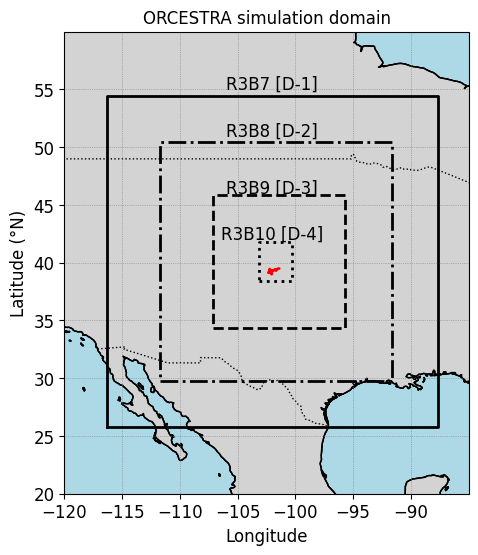

In [359]:


from mpl_toolkits.axes_grid1.inset_locator import inset_axes


ds_t28 = xr.open_dataset('/work/bk1415/b382718/output/steps/observations/aircraft_data/T28_STEPS2000_756.nc')
ds_t28.LATITUDE_DECIMAL_DEG_20Hz[1, 1:20].values

mean_lon = np.nanmean(ds_t28.LONGITUDE_DECIMAL_DEG_20Hz, axis=1)
mean_lat = np.nanmean(ds_t28.LATITUDE_DECIMAL_DEG_20Hz, axis=1)

mean_lon[mean_lon > -101] = np.nan
mean_lat[mean_lat < 38] = np.nan

## ORCESTRA 3 Sept 2024 domain

lon1 = [np.rad2deg(-2.029706), np.rad2deg(-1.53023)];
lat1 = [np.rad2deg(0.45), np.rad2deg(0.95)];

lon2 = [np.rad2deg(-1.95), np.rad2deg(-1.60)];
lat2 = [np.rad2deg(0.52), np.rad2deg(0.88)];

lon3 = [np.rad2deg(-1.87), np.rad2deg(-1.67)];
lat3 = [np.rad2deg(0.6), np.rad2deg(0.80)];

lon4 = [np.rad2deg(-1.8), np.rad2deg(-1.75)];
lat4 = [np.rad2deg(0.67), np.rad2deg(0.73)];

#lon2 = [-22., -38.];
#lat2 = [-0., 17.];

#lon3 = [-25., -35.];
#lat3 = [4, 14.];

#lon4 = [-28., -32.];
#lat4 = [7., 11.];

print(np.min(lon1), np.max(lon1))
print(np.min(lat1), np.max(lat1))

fontsize = 12

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Add coastlines and features for context
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS, linestyle=':')


ax.plot([lon1[0], lon1[1], lon1[1], lon1[0], lon1[0]], 
        [lat1[0], lat1[0], lat1[1], lat1[1], lat1[0]], 
        color='black', linewidth=2, linestyle='-', transform=ccrs.PlateCarree())

ax.plot([lon2[0], lon2[1], lon2[1], lon2[0], lon2[0]], 
        [lat2[0], lat2[0], lat2[1], lat2[1], lat2[0]], 
        color='black', linewidth=2, linestyle='-.', transform=ccrs.PlateCarree())

ax.plot([lon3[0], lon3[1], lon3[1], lon3[0], lon3[0]], 
        [lat3[0], lat3[0], lat3[1], lat3[1], lat3[0]], 
        color='black', linewidth=2, linestyle='--', transform=ccrs.PlateCarree())

ax.plot([lon4[0], lon4[1], lon4[1], lon4[0], lon4[0]], 
        [lat4[0], lat4[0], lat4[1], lat4[1], lat4[0]], 
        color='black', linewidth=2, linestyle=':', transform=ccrs.PlateCarree())

ax.text(-102, 55, "R3B7 [D-1]", transform=ccrs.PlateCarree(), fontsize=fontsize-0, ha='center', color='k')#, fontweight='bold')
ax.text(-102., 51, "R3B8 [D-2]", transform=ccrs.PlateCarree(), fontsize=fontsize-0, ha='center', color='k')#, fontweight='bold')
ax.text(-102., 46, "R3B9 [D-3]", transform=ccrs.PlateCarree(), fontsize=fontsize-0, ha='center', color='k')#, fontweight='bold')
ax.text(-102., 42, "R3B10 [D-4]", transform=ccrs.PlateCarree(), fontsize=fontsize-0, ha='center', color='k')#, fontweight='bold')

plt.plot(mean_lon, mean_lat, 'r-')
plt.ylim()
ax.set_xlim(-120., -85.)
ax.set_ylim(20., 60.)
ax.set_xticks(range(-120, -85, 5))  
ax.set_yticks(range(20, 60, 5))
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)
ax.set_xlabel("Longitude", fontsize=fontsize)
ax.set_ylabel("Latitude (°N)", fontsize=fontsize)
ax.grid(True, linestyle=':', linewidth=0.5, color='grey')
ax.set_title('ORCESTRA simulation domain', fontsize=fontsize)#, fontweight='bold')

# Add oceans and continents features
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')

ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
#ax.text(-30, 26, "Atlantic Ocean", transform=ccrs.PlateCarree(), fontsize=24, fontweight='bold', ha='center', color='blue')
#ax.text(-14, 14, "Senegal", transform=ccrs.PlateCarree(), fontsize=14, fontweight='bold', ha='center', color='blue')
#ax.text(-46, -8, "Brazil", transform=ccrs.PlateCarree(), fontsize=18, fontweight='bold', ha='center', color='blue')

plt.show()

In [194]:
print(np.nanmin(ds_obs_hrs), np.nanmax(ds_obs_hrs))
print(np.nanmin(ds_obs_min), np.nanmax(ds_obs_min))
print(np.nanmin(ds_obs_sec), np.nanmax(ds_obs_sec))

0.0 1.0
0.0 59.0
0.0 59.950195


In [15]:

print(df_t28_obs['tempc'].min())
print(df_t28_obs['tempc'].max())

-16.288616180419922
29.806133270263672


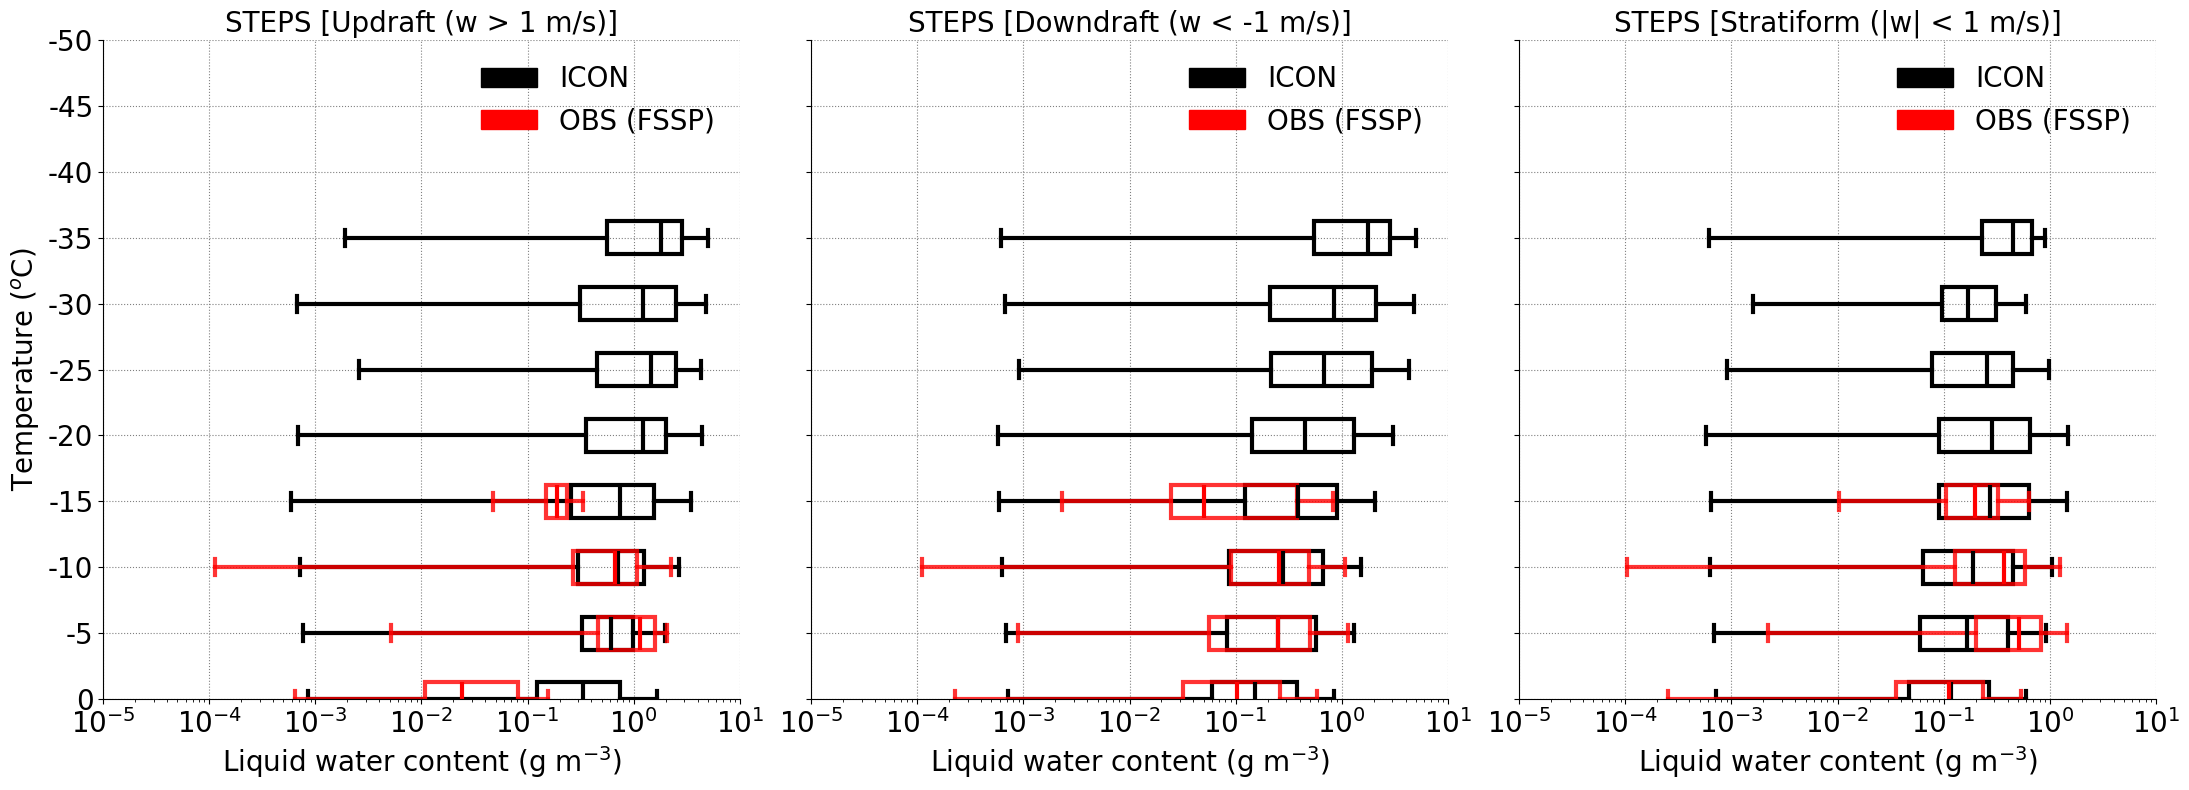

In [17]:

#temp_fssp_bin = np.arange(df_t28_obs['tempc'].min() - 2, df_t28_obs['tempc'].max() + 2, 3)  # Adjust bin range

temp_fssp_bin = np.arange(-50., 20., 5.)
temp_fssp_bin = np.sort(temp_fssp_bin)
df_t28_obs['temp_fssp_bin'] = np.digitize(df_t28_obs['tempc'], bins=temp_fssp_bin, right=False)

bin_edges = np.concatenate([temp_fssp_bin - 2, [temp_fssp_bin[-1] + 2]])  # Adjust to cover the temperature range
df_t28_obs['temp_bin'] = bin_edges[df_t28_obs['temp_fssp_bin']]


### LWC
df_lwc_up_fssp = df_t28_obs[['lwc_up', 'temp_bin']].dropna()
df_lwc_dn_fssp = df_t28_obs[['lwc_dn', 'temp_bin']].dropna()
df_lwc_st_fssp = df_t28_obs[['lwc_st', 'temp_bin']].dropna()

df_lwc_up_fssp = df_lwc_up_fssp.dropna(subset=['temp_bin'])
df_lwc_dn_fssp = df_lwc_dn_fssp.dropna(subset=['temp_bin'])
df_lwc_st_fssp = df_lwc_st_fssp.dropna(subset=['temp_bin'])

lwc_fssp_up_by_bin = [df_lwc_up_fssp[df_lwc_up_fssp['temp_bin'] == temp]['lwc_up'].values for temp in bin_edges]
lwc_fssp_dn_by_bin = [df_lwc_dn_fssp[df_lwc_dn_fssp['temp_bin'] == temp]['lwc_dn'].values for temp in bin_edges]
lwc_fssp_st_by_bin = [df_lwc_st_fssp[df_lwc_st_fssp['temp_bin'] == temp]['lwc_st'].values for temp in bin_edges]

#### Total number concentrations
df_tot_conc_up_fssp = df_t28_obs[['tot_conc_up', 'temp_bin']].dropna()
df_tot_conc_dn_fssp = df_t28_obs[['tot_conc_dn', 'temp_bin']].dropna()
df_tot_conc_st_fssp = df_t28_obs[['tot_conc_st', 'temp_bin']].dropna()

df_tot_conc_up_fssp = df_tot_conc_up_fssp.dropna(subset=['temp_bin'])
df_tot_conc_dn_fssp = df_tot_conc_dn_fssp.dropna(subset=['temp_bin'])
df_tot_conc_st_fssp = df_tot_conc_st_fssp.dropna(subset=['temp_bin'])

tot_conc_fssp_up_by_bin = [df_tot_conc_up_fssp[df_tot_conc_up_fssp['temp_bin'] == temp]['tot_conc_up'].values for temp in bin_edges]
tot_conc_fssp_dn_by_bin = [df_tot_conc_dn_fssp[df_tot_conc_dn_fssp['temp_bin'] == temp]['tot_conc_dn'].values for temp in bin_edges]
tot_conc_fssp_st_by_bin = [df_tot_conc_st_fssp[df_tot_conc_st_fssp['temp_bin'] == temp]['tot_conc_st'].values for temp in bin_edges]


fig, axes = plt.subplots(1, 3, figsize=(22, 8), sharey=True)
plot_titles = ['STEPS [Updraft (w > 1 m/s)]', 'STEPS [Downdraft (w < -1 m/s)]', 'STEPS [Stratiform (|w| < 1 m/s)]']

fontsize = 20;
linewidth = 3;
width=2.5
alpha1=1.0
alpha2=0.8
for i, ax in enumerate(axes):
    #temp_bins = temp_bins_list[i]
    #data_by_bin = data_list[i]

    # Plot ICON line if applicable (replace with actual values)
    if i == 0:
        #ax.plot(lwc_up_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(lwc_4sip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            showfliers=False)
        ax.boxplot(lwc_fssp_up_by_bin[:-1], positions=temp_fssp_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
        
    elif i == 1:
        #ax.plot(lwc_dn_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(lwc_4sip_dn_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            showfliers=False)
        ax.boxplot(lwc_fssp_dn_by_bin[:-1], positions=temp_fssp_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
    elif i == 2:
        #ax.plot(lwc_st_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(lwc_4sip_st_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            showfliers=False)
        ax.boxplot(lwc_fssp_st_by_bin[:-1], positions=temp_fssp_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)

    ax.set_xscale('log')
    ax.set_xlim(1.e-5, 1.e1)
    ax.set_xticklabels([1.e-5, 1.e-4, 1.e-3, 1.e-2, 1.e-1, 1.e0, 1.e1], fontsize=fontsize)
    ax.set_ylim(0, -50)
    #ax.set_yticklabels([20, 10, 0, -10, -20, -30, -40], fontsize=fontsize)
    ax.set_title(plot_titles[i], fontsize=fontsize)
    ax.set_xlabel('Liquid water content (g m$^{-3}$)', fontsize=fontsize)
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.grid(True, linestyle=':', color='grey',alpha=1.0)

    # Combine both ICON line and boxplot legend
    handles, labels = ax.get_legend_handles_labels()

    obs_patch1 = mpatches.Patch(color='black', label='ICON')
    obs_patch2 = mpatches.Patch(color='red', label='OBS (FSSP)')

    ax.legend(handles=handles + [obs_patch1,obs_patch2], frameon=False, loc='best', fontsize=fontsize)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[2].set_xscale('log')
axes[0].set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
axes[0].set_yticks([0, -5, -10, -15, -20, -25, -30, -35, -40, -45, -50])
axes[0].set_yticklabels(['0', '-5', '-10', '-15', '-20', '-25', '-30', '-35', '-40',  '-45', '-50'], fontsize=fontsize)

#axes[0].set_yticks([20, 15, 10, 5, 0, -5, -10, -15, -20, -25, -30, -35, -40, -45, -50])
#axes[0].set_yticklabels(['20', '15', '10', '5', '0', '-5', '-10', '-15', '-20', '-25', '-30', '-35', '-40',  '-45', '-50'], fontsize=fontsize)

plt.tight_layout()
plt.show()

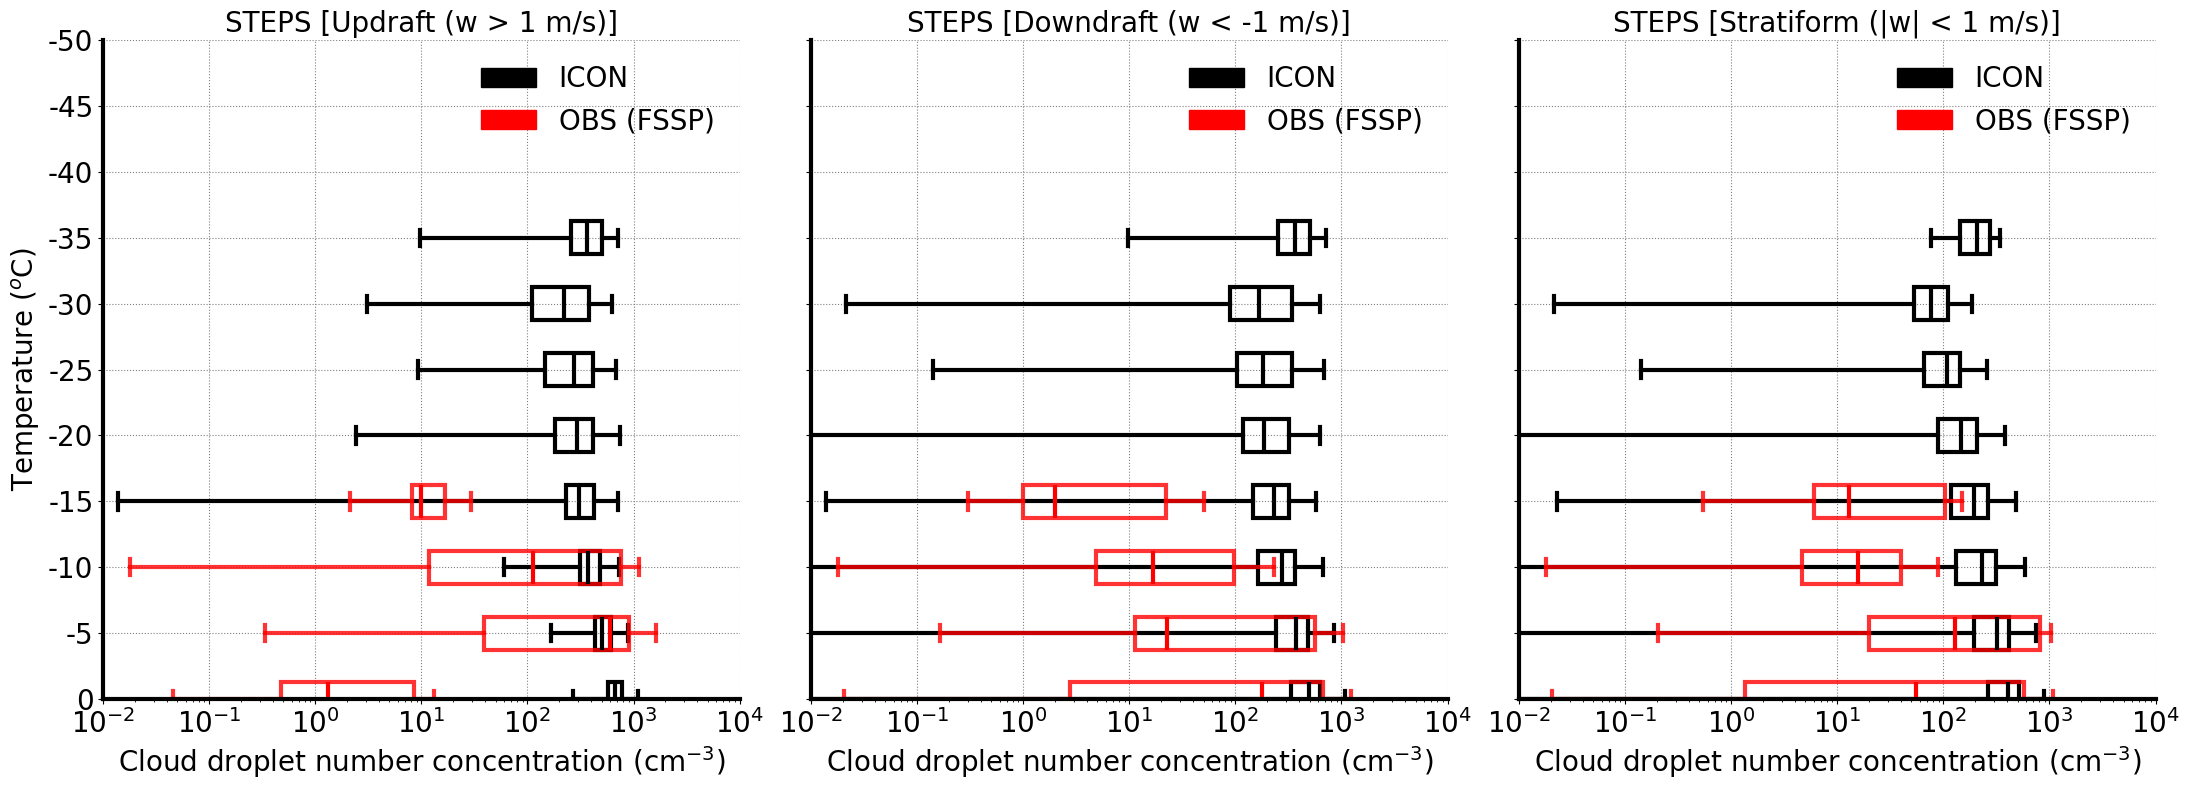

In [273]:


#temp_fssp_bin = np.arange(df_t28_obs['tempc'].min() - 2, df_t28_obs['tempc'].max() + 2, 5)  # Adjust bin range

temp_fssp_bin = np.arange(-50., 20., 5.)
temp_fssp_bin = np.sort(temp_fssp_bin)

df_t28_obs['temp_fssp_bin'] = np.digitize(df_t28_obs['tempc'], bins=temp_fssp_bin, right=False)

bin_edges = np.concatenate([temp_fssp_bin - 2, [temp_fssp_bin[-1] + 2]])  # Adjust to cover the temperature range
df_t28_obs['temp_bin'] = bin_edges[df_t28_obs['temp_fssp_bin']]


### LWC
df_lwc_up_fssp = df_t28_obs[['lwc_up', 'temp_bin']].dropna()
df_lwc_dn_fssp = df_t28_obs[['lwc_dn', 'temp_bin']].dropna()
df_lwc_st_fssp = df_t28_obs[['lwc_st', 'temp_bin']].dropna()

df_lwc_up_fssp = df_lwc_up_fssp.dropna(subset=['temp_bin'])
df_lwc_dn_fssp = df_lwc_dn_fssp.dropna(subset=['temp_bin'])
df_lwc_st_fssp = df_lwc_st_fssp.dropna(subset=['temp_bin'])

lwc_fssp_up_by_bin = [df_lwc_up_fssp[df_lwc_up_fssp['temp_bin'] == temp]['lwc_up'].values for temp in bin_edges]
lwc_fssp_dn_by_bin = [df_lwc_dn_fssp[df_lwc_dn_fssp['temp_bin'] == temp]['lwc_dn'].values for temp in bin_edges]
lwc_fssp_st_by_bin = [df_lwc_st_fssp[df_lwc_st_fssp['temp_bin'] == temp]['lwc_st'].values for temp in bin_edges]

#### Total number concentrations
df_tot_conc_up_fssp = df_t28_obs[['tot_conc_up', 'temp_bin']].dropna()
df_tot_conc_dn_fssp = df_t28_obs[['tot_conc_dn', 'temp_bin']].dropna()
df_tot_conc_st_fssp = df_t28_obs[['tot_conc_st', 'temp_bin']].dropna()

df_tot_conc_up_fssp = df_tot_conc_up_fssp.dropna(subset=['temp_bin'])
df_tot_conc_dn_fssp = df_tot_conc_dn_fssp.dropna(subset=['temp_bin'])
df_tot_conc_st_fssp = df_tot_conc_st_fssp.dropna(subset=['temp_bin'])

tot_conc_fssp_up_by_bin = [df_tot_conc_up_fssp[df_tot_conc_up_fssp['temp_bin'] == temp]['tot_conc_up'].values for temp in bin_edges]
tot_conc_fssp_dn_by_bin = [df_tot_conc_dn_fssp[df_tot_conc_dn_fssp['temp_bin'] == temp]['tot_conc_dn'].values for temp in bin_edges]
tot_conc_fssp_st_by_bin = [df_tot_conc_st_fssp[df_tot_conc_st_fssp['temp_bin'] == temp]['tot_conc_st'].values for temp in bin_edges]


fig, axes = plt.subplots(1, 3, figsize=(22, 8), sharey=True)
plot_titles = ['STEPS [Updraft (w > 1 m/s)]', 'STEPS [Downdraft (w < -1 m/s)]', 'STEPS [Stratiform (|w| < 1 m/s)]']

fontsize = 20;
linewidth = 3;
width=2.5
alpha1=1.0
alpha2=0.8
for i, ax in enumerate(axes):
    #temp_bins = temp_bins_list[i]
    #data_by_bin = data_list[i]

    # Plot ICON line if applicable (replace with actual values)
    if i == 0:
        #ax.plot(cdnc_up_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(cdnc_4sip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            showfliers=False)
        ax.boxplot(tot_conc_fssp_up_by_bin[:-1], positions=temp_fssp_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
        
    elif i == 1:
        #ax.plot(cdnc_dn_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(cdnc_4sip_dn_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            showfliers=False)
        ax.boxplot(tot_conc_fssp_dn_by_bin[:-1], positions=temp_fssp_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
    elif i == 2:
        #ax.plot(cdnc_st_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(cdnc_4sip_st_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            showfliers=False)
        ax.boxplot(tot_conc_fssp_st_by_bin[:-1], positions=temp_fssp_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)

    ax.set_xscale('log')
    ax.set_xlim(1.e-2, 1.e4)
    ax.set_xticklabels([1.e-2, 1.e0, 1.e2, 1.e4], fontsize=fontsize)
    ax.set_ylim(0, -50)
    ax.set_title(plot_titles[i], fontsize=fontsize)
    ax.set_xlabel('Cloud droplet number concentration (cm$^{-3}$)', fontsize=fontsize)
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.grid(True, linestyle=':', color='grey',alpha=1.0)

    # Combine both ICON line and boxplot legend
    handles, labels = ax.get_legend_handles_labels()

    obs_patch1 = mpatches.Patch(color='black', label='ICON')
    obs_patch2 = mpatches.Patch(color='red', label='OBS (FSSP)')

    ax.legend(handles=handles + [obs_patch1, obs_patch2], frameon=False, loc='best', fontsize=fontsize)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)

axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[2].set_xscale('log')
axes[0].set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
axes[0].set_yticks([0, -5, -10, -15, -20, -25, -30, -35, -40, -45, -50])
axes[0].set_yticklabels(['0', '-5', '-10', '-15', '-20', '-25', '-30', '-35', '-40', '-45', '-50'], fontsize=fontsize)

#axes[0].set_yticks([20, 15, 10, 5, 0, -5, -10, -15, -20, -25, -30, -35, -40, -45, -50])
#axes[0].set_yticklabels(['20', '15', '10', '5', '0', '-5', '-10', '-15', '-20', '-25', '-30', '-35', '-40',  '-45', '-50'], fontsize=fontsize)

plt.tight_layout()
plt.show()

In [265]:

import xarray as xr
import netCDF4

ds_air_obs = netCDF4.Dataset('/work/bk1415/b382718/output/steps/observations/aircraft_data/T28_STEPS2000_756.nc', 'r')
ds_2dc_obs = netCDF4.Dataset('/work/bk1415/b382718/output/steps/observations/aircraft_data/from_bansemer/20000620_001702_2DC.nc', 'r')


ds_air_new = {'temp_rm': ds_air_obs['TEMPERATURE_ROSEMOUNT_SENSOR'][:][:, 0],               # C
    'temp_rf': ds_air_obs.variables['TEMPERATURE_REVERSE_FLOW_SENSOR'][:][:, 0],            # C
    'air_den': ds_air_obs.variables['DENSITY_AIR'][:][:, 0],                                # kg/m3
    'fssp_lwc': ds_air_obs.variables['FSSP_LIQUID_WATER'][:][:, 0],                         # g/m3
    'fssp_diam': ds_air_obs.variables['FSSP_AVERAGE_DIAMETER'][:][:, 0],                    # µm
    'fssp_tot_conc': ds_air_obs.variables['FSSP_TOTAL_PARTICLE_CONCENTRATION'][:][:, 0],    # count/cm3
    'fssp_eq_diam': ds_air_obs.variables['FSSP_EQUIVALENT_DIAMETER'][:][:, 0],              # µm
    'fssp_qc': ds_air_obs.variables['FSSP_LIQUID_WATER_MIXING_RATIO'][:][:, 0],             # gperkg
    'w_vel': ds_air_obs.variables['UPDRAFT'][:][:, 0]                                       # m/s
}


time = ds_air_obs['Time'][:][:, 0]
#print(time)
# Convert ds_air_new to an xarray Dataset
ds_air_new = xr.Dataset(
    {key: ('time', value) for key, value in ds_air_new.items()},
    coords={'time': time})


ds_2dc_new = {
    'TAS' : ds_2dc_obs['TAS'],                        # m/s
    'NT100_2DC' : ds_2dc_obs['NT100'],                # per m3 
    'MND100_2DC' : ds_2dc_obs['MND100'],              # µm
    'MVD100_2DC' : ds_2dc_obs['MVD100'],              # µm
    'DMASS100_2DC' : ds_2dc_obs['DMASS100'],          # µm
    'IWC100_2DC' : ds_2dc_obs['IWC100'],              # g/m3
    'AREA100_2DC' : ds_2dc_obs['AREA100'],            # m
    'NT200_2DC' : ds_2dc_obs['NT200'],                # per m3 
    'MND200_2DC' : ds_2dc_obs['MND200'],
    'MVD200_2DC' : ds_2dc_obs['MVD200'],
    'DMASS200_2DC' : ds_2dc_obs['DMASS200'],
    'IWC200_2DC' : ds_2dc_obs['IWC200'],
    'AREA200_2DC' : ds_2dc_obs['AREA200'],
}

time = ds_2dc_obs['time'][:]

ds_2dc_new = xr.Dataset(
    {key: ('time', value) for key, value in ds_2dc_new.items()},
    coords={'time': time}
)

# Find common times between ds_2dc_new and ds_air_new
time_air = ds_air_new.time
time_2dc = ds_2dc_new.time
common_times = np.intersect1d(time_2dc, time_air)

ds_air_new = ds_air_new.sel(time=common_times)
ds_2dc_new = ds_2dc_new.sel(time=common_times)


w_thres = 1.

ds_2dc_new['NT200_2DC_perl'] = 1.e-3*ds_2dc_new['NT200_2DC']

# NI200
filt_inc200_2dc_up_cond = (ds_2dc_new.NT200_2DC_perl > 1.e-9) & (ds_air_new.w_vel > w_thres)
filt_inc200_2dc_dn_cond = (ds_2dc_new.NT200_2DC_perl > 1.e-9) & (ds_air_new.w_vel < -1*w_thres)
filt_inc200_2dc_st_cond = (ds_2dc_new.NT200_2DC_perl > 1.e-9) & (np.abs(ds_air_new.w_vel) < w_thres)

inc200_2dc_up = np.where(filt_inc200_2dc_up_cond, ds_2dc_new.NT200_2DC_perl, np.nan)
inc200_2dc_dn = np.where(filt_inc200_2dc_dn_cond, ds_2dc_new.NT200_2DC_perl, np.nan)
inc200_2dc_st = np.where(filt_inc200_2dc_st_cond, ds_2dc_new.NT200_2DC_perl, np.nan)

# IWC
filt_iwc200_2dc_up_cond = (ds_2dc_new.IWC200_2DC > 1.e-9) & (ds_air_new.w_vel > w_thres)
filt_iwc200_2dc_dn_cond = (ds_2dc_new.IWC200_2DC > 1.e-9) & (ds_air_new.w_vel < -1*w_thres)
filt_iwc200_2dc_st_cond = (ds_2dc_new.IWC200_2DC > 1.e-9) & (np.abs(ds_air_new.w_vel) < w_thres)

iwc200_2dc_up = np.where(filt_iwc200_2dc_up_cond, ds_2dc_new.IWC200_2DC, np.nan)
iwc200_2dc_dn = np.where(filt_iwc200_2dc_dn_cond, ds_2dc_new.IWC200_2DC, np.nan)
iwc200_2dc_st = np.where(filt_iwc200_2dc_st_cond, ds_2dc_new.IWC200_2DC, np.nan)


# Create a pandas dataframe
df_2dc_obs = pd.DataFrame({
    'tempc': ds_air_new['temp_rm'],
    'w_vel': ds_air_new['w_vel'],
    'air_den':ds_air_new['air_den'],
    'NT200':ds_2dc_new['NT200_2DC'],
    'IWC200':ds_2dc_new['IWC200_2DC'], 
    'inc200_2dc_up':inc200_2dc_up,
    'inc200_2dc_dn':inc200_2dc_dn,
    'inc200_2dc_st':inc200_2dc_st,
    'iwc200_2dc_up':iwc200_2dc_up,
    'iwc200_2dc_dn':iwc200_2dc_dn,
    'iwc200_2dc_st':iwc200_2dc_st,
})


#print(ni200_2dc_up)
#plt.plot(1.e-3*ds_2dc_new.NT200_2DC, ds_air_new.temp_rm)

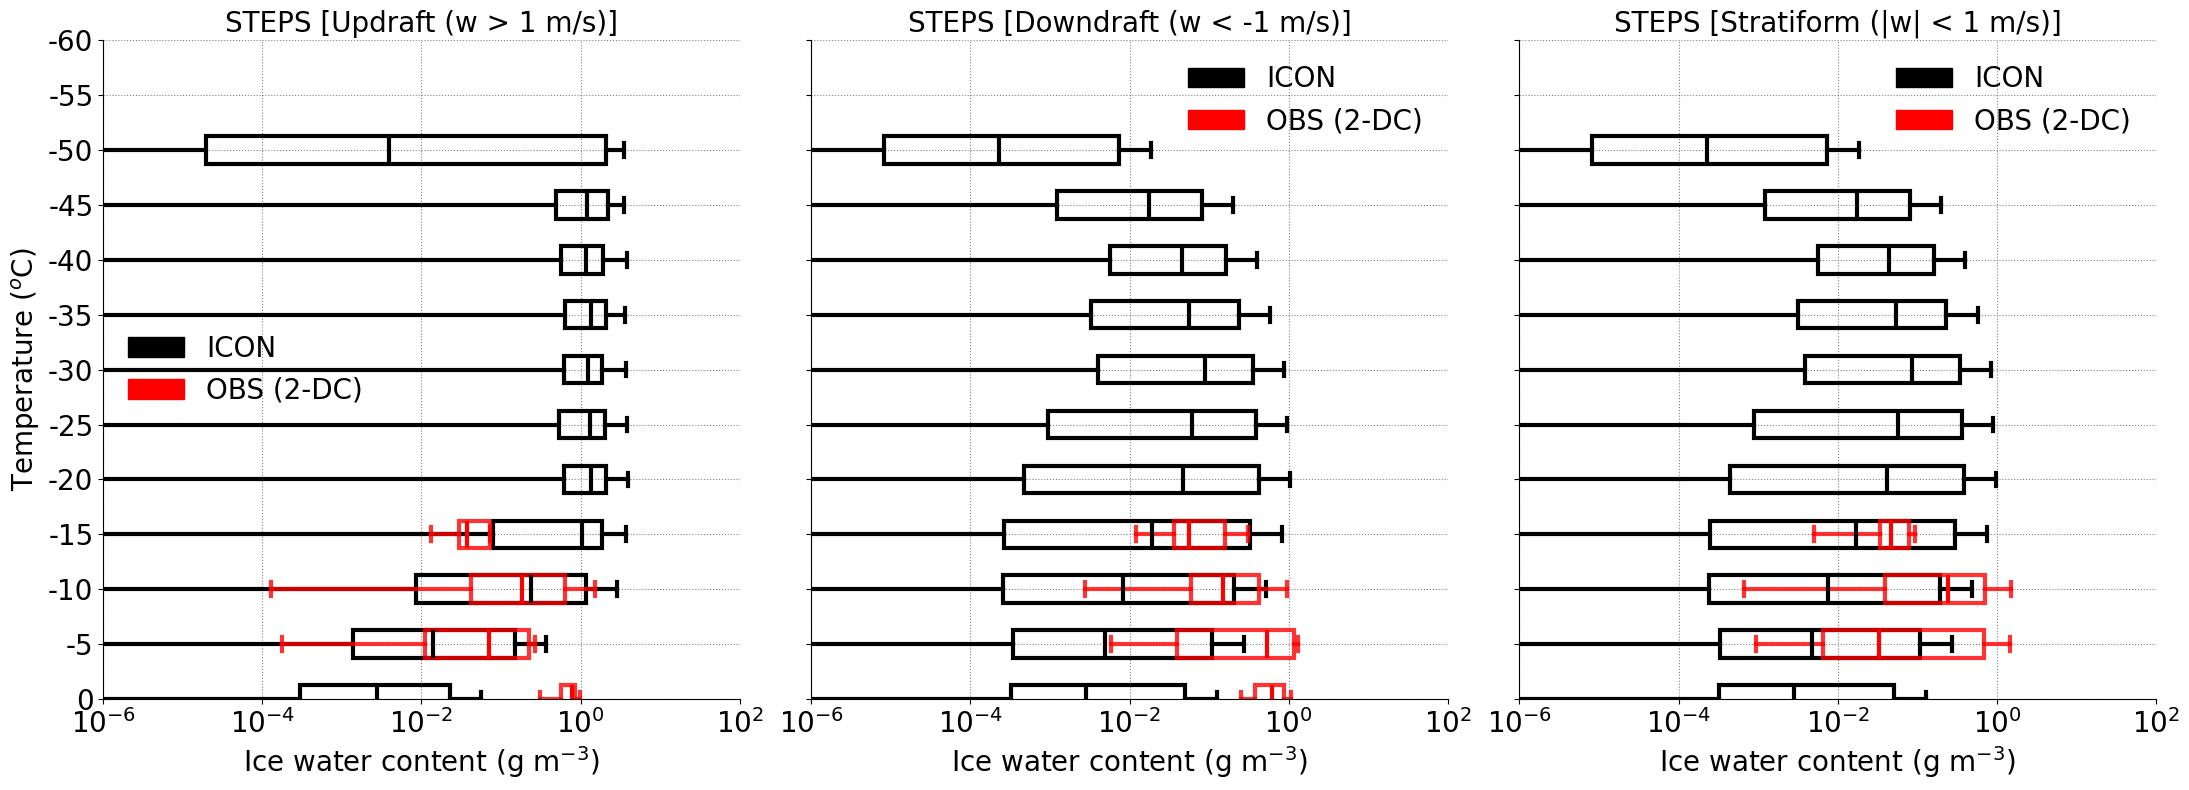

In [256]:
temp_2dc_bin = np.arange(-50., 20., 5.)
temp_2dc_bin = np.sort(temp_2dc_bin)
#temp_2dc_bin = (df_2dc_obs['tempc'].min() - 2, df_2dc_obs['tempc'].max() + 2, 3)
#temp_2dc_bin = np.sort(temp_2dc_bin)
df_2dc_obs['temp_2dc_bin'] = np.digitize(df_2dc_obs['tempc'], bins=temp_2dc_bin, right=False)

bin_edges = np.concatenate([temp_2dc_bin - 2, [temp_2dc_bin[-1] + 2]])  # Adjust to cover the temperature range
df_2dc_obs['temp_bin'] = bin_edges[df_2dc_obs['temp_2dc_bin']]


### LWC
df_iwc200_up_2dc = df_2dc_obs[['iwc200_2dc_up', 'temp_bin']].dropna()
df_iwc200_dn_2dc = df_2dc_obs[['iwc200_2dc_dn', 'temp_bin']].dropna()
df_iwc200_st_2dc = df_2dc_obs[['iwc200_2dc_st', 'temp_bin']].dropna()

df_iwc200_up_2dc = df_iwc200_up_2dc.dropna(subset=['temp_bin'])
df_iwc200_dn_2dc = df_iwc200_dn_2dc.dropna(subset=['temp_bin'])
df_iwc200_st_2dc = df_iwc200_st_2dc.dropna(subset=['temp_bin'])

iwc200_2dc_up_by_bin = [df_iwc200_up_2dc[df_iwc200_up_2dc['temp_bin'] == temp]['iwc200_2dc_up'].values for temp in bin_edges]
iwc200_2dc_dn_by_bin = [df_iwc200_dn_2dc[df_iwc200_dn_2dc['temp_bin'] == temp]['iwc200_2dc_dn'].values for temp in bin_edges]
iwc200_2dc_st_by_bin = [df_iwc200_st_2dc[df_iwc200_st_2dc['temp_bin'] == temp]['iwc200_2dc_st'].values for temp in bin_edges]


fig, axes = plt.subplots(1, 3, figsize=(22, 8), sharey=True)
plot_titles = ['STEPS [Updraft (w > 1 m/s)]', 'STEPS [Downdraft (w < -1 m/s)]', 'STEPS [Stratiform (|w| < 1 m/s)]']

fontsize = 20;
linewidth = 3;
width=2.5
alpha1=1.0
alpha2=0.8
for i, ax in enumerate(axes):
    #temp_bins = temp_bins_list[i]
    #data_by_bin = data_list[i]

    # Plot ICON line if applicable (replace with actual values)
    if i == 0:
        #ax.plot(iwc200_2dc_up_by_bin, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(iwc_4sip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            showfliers=False)
        ax.boxplot(iwc200_2dc_up_by_bin[:-1], positions=temp_2dc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
            medianprops=dict(color='red', linewidth=linewidth),  
            whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
            capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
            showfliers=False)
        
        
    elif i == 1:
        #ax.plot(iwc200_2dc_dn_by_bin, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(iwc_4sip_dn_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            showfliers=False)
        ax.boxplot(iwc200_2dc_dn_by_bin[:-1], positions=temp_2dc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
            medianprops=dict(color='red', linewidth=linewidth),  
            whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
            capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
            showfliers=False)
        
    elif i == 2:
        #ax.plot(iwc200_2dc_st_by_bin, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(iwc_4sip_st_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            showfliers=False)
        ax.boxplot(iwc200_2dc_st_by_bin[:-1], positions=temp_2dc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
            medianprops=dict(color='red', linewidth=linewidth),  
            whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
            capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
            showfliers=False)
        

    ax.set_xscale('log')
    ax.set_xlim(1.e-6, 1.e2)
    #ax.set_xticklabels([1.e-2, 1.e0, 1.e2, 1.e4], fontsize=fontsize)
    ax.set_ylim(0, -50)
    ax.set_title(plot_titles[i], fontsize=fontsize)
    ax.set_xlabel('Ice water content (g m$^{-3}$)', fontsize=fontsize)
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.grid(True, linestyle=':', color='grey',alpha=1.0)

    # Combine both ICON line and boxplot legend
    handles, labels = ax.get_legend_handles_labels()

    obs_patch1 = mpatches.Patch(color='black', label='ICON')
    obs_patch2 = mpatches.Patch(color='red', label='OBS (2-DC)')

    ax.legend(handles=handles + [obs_patch1, obs_patch2], frameon=False, loc='best', fontsize=fontsize)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[2].set_xscale('log')
axes[0].set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
axes[0].set_yticks([0, -5, -10, -15, -20, -25, -30, -35, -40, -45, -50, -55, -60])
axes[0].set_yticklabels(['0', '-5', '-10', '-15', '-20', '-25', '-30', '-35', '-40', '-45', '-50', '-55', '-60'], fontsize=fontsize)

#axes[0].set_yticks([20, 15, 10, 5, 0, -5, -10, -15, -20, -25, -30, -35, -40, -45, -50])
#axes[0].set_yticklabels(['20', '15', '10', '5', '0', '-5', '-10', '-15', '-20', '-25', '-30', '-35', '-40',  '-45', '-50'], fontsize=fontsize)

plt.tight_layout()
plt.show()

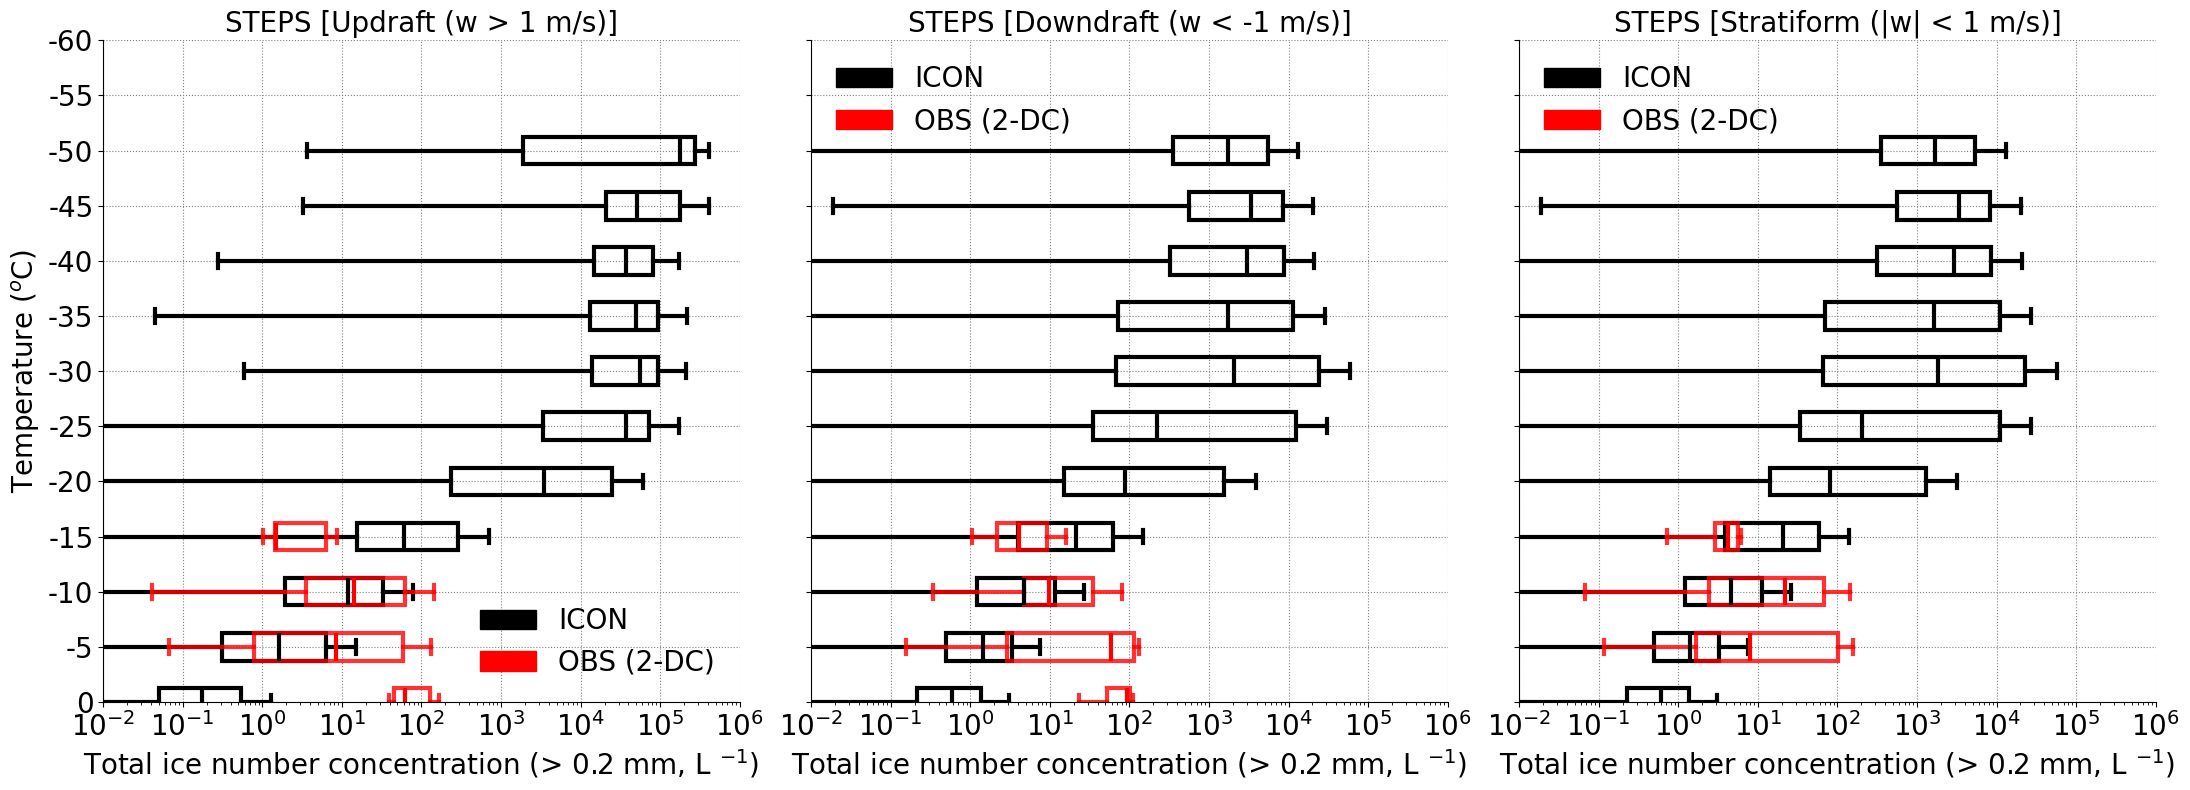

In [270]:
temp_2dc_bin = np.arange(-50., 20., 5.)
temp_2dc_bin = np.sort(temp_2dc_bin)
#temp_2dc_bin = (df_2dc_obs['tempc'].min() - 2, df_2dc_obs['tempc'].max() + 2, 3)
#temp_2dc_bin = np.sort(temp_2dc_bin)
df_2dc_obs['temp_2dc_bin'] = np.digitize(df_2dc_obs['tempc'], bins=temp_2dc_bin, right=False)

bin_edges = np.concatenate([temp_2dc_bin - 2, [temp_2dc_bin[-1] + 2]])  # Adjust to cover the temperature range
df_2dc_obs['temp_bin'] = bin_edges[df_2dc_obs['temp_2dc_bin']]


### LWC
df_inc200_up_2dc = df_2dc_obs[['inc200_2dc_up', 'temp_bin']].dropna()
df_inc200_dn_2dc = df_2dc_obs[['inc200_2dc_dn', 'temp_bin']].dropna()
df_inc200_st_2dc = df_2dc_obs[['inc200_2dc_st', 'temp_bin']].dropna()

df_inc200_up_2dc = df_inc200_up_2dc.dropna(subset=['temp_bin'])
df_inc200_dn_2dc = df_inc200_dn_2dc.dropna(subset=['temp_bin'])
df_inc200_st_2dc = df_inc200_st_2dc.dropna(subset=['temp_bin'])

inc200_2dc_up_by_bin = [df_inc200_up_2dc[df_inc200_up_2dc['temp_bin'] == temp]['inc200_2dc_up'].values for temp in bin_edges]
inc200_2dc_dn_by_bin = [df_inc200_dn_2dc[df_inc200_dn_2dc['temp_bin'] == temp]['inc200_2dc_dn'].values for temp in bin_edges]
inc200_2dc_st_by_bin = [df_inc200_st_2dc[df_inc200_st_2dc['temp_bin'] == temp]['inc200_2dc_st'].values for temp in bin_edges]


fig, axes = plt.subplots(1, 3, figsize=(22, 8), sharey=True)
plot_titles = ['STEPS [Updraft (w > 1 m/s)]', 'STEPS [Downdraft (w < -1 m/s)]', 'STEPS [Stratiform (|w| < 1 m/s)]']

fontsize = 20;
linewidth = 3;
width=2.5
alpha1=1.0
alpha2=0.8
for i, ax in enumerate(axes):
    #temp_bins = temp_bins_list[i]
    #data_by_bin = data_list[i]

    # Plot ICON line if applicable (replace with actual values)
    if i == 0:
        #ax.plot(iwc200_2dc_up_by_bin, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(inc_4sip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            showfliers=False)
        ax.boxplot(inc200_2dc_up_by_bin[:-1], positions=temp_2dc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
            medianprops=dict(color='red', linewidth=linewidth),  
            whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
            capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
            showfliers=False)
        
        
    elif i == 1:
        #ax.plot(iwc200_2dc_dn_by_bin, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(inc_4sip_dn_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            showfliers=False)
        ax.boxplot(inc200_2dc_dn_by_bin[:-1], positions=temp_2dc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
            medianprops=dict(color='red', linewidth=linewidth),  
            whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
            capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
            showfliers=False)
        
    elif i == 2:
        #ax.plot(iwc200_2dc_st_by_bin, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(inc_4sip_st_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            showfliers=False)
        ax.boxplot(inc200_2dc_st_by_bin[:-1], positions=temp_2dc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
            medianprops=dict(color='red', linewidth=linewidth),  
            whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
            capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
            showfliers=False)
        

    ax.set_xscale('log')
    ax.set_xlim(1.e-2, 1.e6)
    #ax.set_xticklabels([1.e-2, 1.e0, 1.e2, 1.e4], fontsize=fontsize)
    ax.set_ylim(0, -50)
    ax.set_title(plot_titles[i], fontsize=fontsize)
    ax.set_xlabel('Total ice number concentration (> 0.2 mm, L $^{-1}$)', fontsize=fontsize)
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.grid(True, linestyle=':', color='grey',alpha=1.0)

    # Combine both ICON line and boxplot legend
    handles, labels = ax.get_legend_handles_labels()

    obs_patch1 = mpatches.Patch(color='black', label='ICON')
    obs_patch2 = mpatches.Patch(color='red', label='OBS (2-DC)')

    ax.legend(handles=handles + [obs_patch1, obs_patch2], frameon=False, loc='best', fontsize=fontsize)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[2].set_xscale('log')
axes[0].set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
axes[0].set_yticks([0, -5, -10, -15, -20, -25, -30, -35, -40, -45, -50, -55, -60])
axes[0].set_yticklabels(['0', '-5', '-10', '-15', '-20', '-25', '-30', '-35', '-40', '-45', '-50', '-55', '-60'], fontsize=fontsize)

#axes[0].set_yticks([20, 15, 10, 5, 0, -5, -10, -15, -20, -25, -30, -35, -40, -45, -50])
#axes[0].set_yticklabels(['20', '15', '10', '5', '0', '-5', '-10', '-15', '-20', '-25', '-30', '-35', '-40',  '-45', '-50'], fontsize=fontsize)

plt.tight_layout()
plt.show()

In [19]:

file_path = '/work/bk1415/b382718/output/steps/observations/aircraft_data/raw/yr2000/f756/f756_2dc.raw'

# Attempt to read the raw file as a generic binary file
raw_data = np.fromfile(file_path, dtype=np.uint8)  # or dtype=np.uint16, np.int16, etc.

# Inspect the first few bytes
print(raw_data[:3])

[  0   0 112]


In [20]:

def calc_dewpoint(tempc, rh):
    dewpoint = tempc - ((100. - rh)/5.)
    return dewpoint


def calc_tdew(t, rh):        # Magnus-Tetens approximation
    a = 17.27; b = 237.7;
    alpha = (a*t/(b+t)) + np.log(rh/100)
    td = b*alpha/(a-alpha)
    return td
    
def calc_vir_temp(tc, q):
    #virt_tempk_wk = t/(1. - (ev/p)*(1-0.622))
    temp = tc + (1-0.622*q)
    return temp
    
def calculate_lcl(pressure, temperature, dewpoint):
    l = np.argmin(np.abs(temperature - dewpoint))
    return pressure[l], temperature[l]

def calc_lcl(t, td):
    lcl = td + 125.*(t-td)
    return lcl
    
def e_sat_hpa(tc):
    e_sat_pa = 6.112*np.exp((17.67*tc)/(tc+243.5))
    return e_sat_pa

def calc_parcel_temp(pres, ht, q_sat, tk_lcl):
    grav = 9.8  # acceleration due to gravity [m/s^2]
    eps = 0.622  # ratio of the gas constants for water vapor and dry air
    Rd = 287.  # specific gas constant for dry air [J/(kg*K)]
    cp = 1005.  # specific heat capacity at constant pressure for dry air [J/(kg*K)]
    lv = 2.5e6  # latent heat of vaporization [J/kg]
    Rv = 461.  # specific gas constant for water vapor [J/(kg*K)]

    tk_parcel = np.zeros(len(ht))  
    del_t_par = np.zeros(len(ht))  

    tk_parcel[0] = tk_lcl + 273.15 
    
    for i in range(1, len(ht)):
        dht = ht[i] - ht[i - 1]  
        qs = q_sat[i]  
        term_a = 1. + lv * qs / (Rd * tk_parcel[i - 1])
        term_b = (lv ** 2.) * eps * qs
        term_c = Rd * (tk_parcel[i - 1]) ** 2.
        
        del_t_par[i] = grav * term_a / (cp + (term_b / term_c))

        tk_parcel[i] = tk_parcel[i - 1] - del_t_par[i] * dht
        
    tempc = tk_parcel - 273.15
    return tempc

import numpy as np



def calc_cape(pres, t_env, t_par, tv_env, tv_par):
    """
    Calculate Convective Available Potential Energy (CAPE).
    
    Parameters:
        pres (array): Pressure levels (hPa or Pa).
        t_env (array): Environmental temperature (°C).
        t_par (array): Parcel temperature (°C).
        tv_env (array): Environmental virtual temperature (°C).
        tv_par (array): Parcel virtual temperature (°C).
    
    Returns:
        cape (float): CAPE value (J/kg).
    """
    Rd = 287.0  # gas constant for dry air (J/kg/K)
    
    # Convert temperatures to Kelvin
    tk_env = t_env + 273.15
    tk_v_env = tv_env + 273.15
    tk_par = t_par + 273.15
    tk_v_par = tv_par + 273.15
    
    cape = 0.0
    
    # Loop through pressure levels
    for i in range(1, len(pres)):
        # Check if parcel is warmer than the environment
        if tk_v_par[i] > tk_v_env[i]:
            # Calculate logarithmic pressure difference
            dlnp = np.log(pres[i-1] / pres[i])
            cape = cape + Rd * (tk_v_par[i] - tk_v_env[i]) * dlnp
    return cape
        

In [48]:
ds_4sip.time

<xarray.DataArray 'time' (time: 29)>
array(['2000-06-19T12:00:00.000000000', '2000-06-19T12:30:00.000000000',
       '2000-06-19T13:00:00.000000000', '2000-06-19T13:30:00.000000000',
       '2000-06-19T14:00:00.000000000', '2000-06-19T14:30:00.000000000',
       '2000-06-19T15:00:00.000000000', '2000-06-19T15:30:00.000000000',
       '2000-06-19T16:00:00.000000000', '2000-06-19T16:30:00.000000000',
       '2000-06-19T17:00:00.000000000', '2000-06-19T17:30:00.000000000',
       '2000-06-19T18:00:00.000000000', '2000-06-19T18:30:00.000000000',
       '2000-06-19T19:00:00.000000000', '2000-06-19T19:30:00.000000000',
       '2000-06-19T20:00:00.000000000', '2000-06-19T20:30:00.000000000',
       '2000-06-19T21:00:00.000000000', '2000-06-19T21:30:00.000000000',
       '2000-06-19T22:00:00.000000000', '2000-06-19T22:30:00.000000000',
       '2000-06-19T23:00:00.000000000', '2000-06-19T23:30:00.000000000',
       '2000-06-20T00:00:00.000000000', '2000-06-20T00:30:00.000000000',
       '2000-06-20T01:00:00.000000000', '2000-06-20T01:30:00.000000000',
       '2000-06-20T02:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-06-19T12:00:00 ... 2000-06-20T02:00:00
Attributes:
    standard_name:  time
    axis:           T

CAPE ::  1134.2228793854447


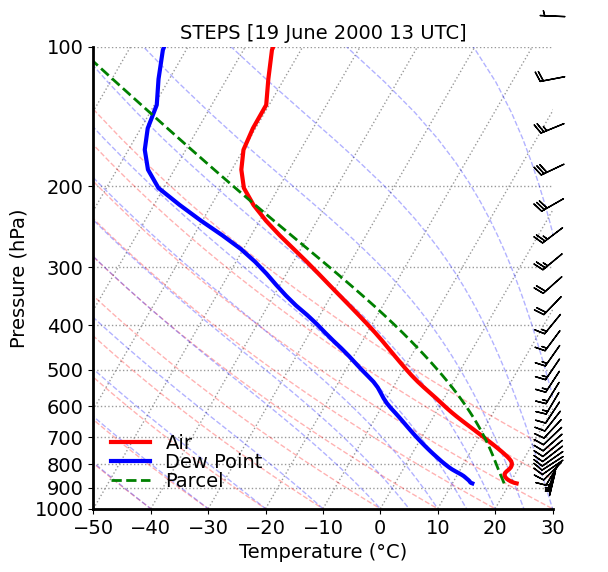

In [21]:

ds_skewt = ds_4sip.sel(time=ds_4sip.time[6])

tempc = ds_skewt.temp-273.15 #.values
pres_pa = ds_skewt.pres #.values
ht_m = ds_skewt.z_mc
rel_hum = ds_skewt.rh #.values
u_wind = ds_skewt.u
v_wind = ds_skewt.v
q_vap = ds_skewt.qv

   
temp_dew = calc_dewpoint(tempc, rel_hum)
#temp_dew = calc_tdew(tempc, rel_hum)

avg_tempc = tempc.mean(dim=('ncells')).values
avg_dewtempc = temp_dew.mean(dim=('ncells')).values
avg_pres = 0.01*pres_pa.mean(dim=('ncells')).values
avg_ht = ht_m.mean(dim=('ncells')).values
avg_rh = rel_hum.mean(dim=('ncells')).values
avg_qv = q_vap.mean(dim=('ncells')).values

avg_u = u_wind.mean(dim=('ncells')).values
avg_v = v_wind.mean(dim=('ncells')).values

avg_tempc = avg_tempc[::-1]
avg_dewtempc = avg_dewtempc[::-1]
avg_pres = avg_pres[::-1]
avg_ht = avg_ht[::-1]
avg_rh = avg_rh[::-1]
avg_u = avg_u[::-1]
avg_v = avg_v[::-1]
avg_qv = avg_qv[::-1]

#----- Calculate parcel properties
e_sat = e_sat_hpa(avg_tempc)
q_sat = 0.622*e_sat/(avg_pres-e_sat)

lcl_pressure, lcl_temp = calculate_lcl(avg_pres, avg_tempc, avg_dewtempc)
#lcl_temp = calc_lcl(avg_tempc[0], avg_dewtempc)
parcel_temp = calc_parcel_temp(avg_pres, avg_ht, q_sat, lcl_temp)
Tv_env = calc_vir_temp(avg_tempc, avg_qv)
Tv_parcel = calc_vir_temp(parcel_temp, q_sat)
parcel_cape = calc_cape(avg_pres, avg_tempc, parcel_temp, Tv_env, Tv_parcel)
print('CAPE :: ',parcel_cape)
#------

# Create the Skew-T plot
fontsize=14;
lnwdth=3;
alpha=0.3;

fig = plt.figure(figsize=(8, 6))
skew = SkewT(fig)

# Plot temperature and dew point on the Skew-T
skew.plot(avg_pres, avg_tempc, 'r-', label='Air', linewidth=lnwdth)
#skew.plot(avg_pres, calc_dewpoint(avg_tempc, avg_rh), 'b-.', label='Dew Point', linewidth=lnwdth)
skew.plot(avg_pres, avg_dewtempc, 'b-', label='Dew Point', linewidth=lnwdth)
skew.plot(avg_pres, parcel_temp, 'g--', label='Parcel', linewidth=lnwdth-1)
# Add wind barbs 
if 'u' in ds_skewt and 'v' in ds_skewt:
    u_wind = avg_u  # Zonal wind component
    v_wind = avg_v  # Meridional wind component
    skew.plot_barbs(avg_pres[::2], u_wind[::2], v_wind[::2], length=6, color='black', pivot='middle')

# Add the dry and moist adiabats to the plot
skew.plot_dry_adiabats(linewidth=1, alpha=alpha)
skew.plot_moist_adiabats(linewidth=1, alpha=alpha)

ax = skew.ax
ax.set_xlabel('Temperature (°C)', fontsize=fontsize)
ax.set_ylabel('Pressure (hPa)', fontsize=fontsize)
ax.set_xlim(-50, 30)
ax.set_ylim(1000., 100)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)
plt.title('STEPS [19 June 2000 13 UTC]', fontsize=fontsize)

plt.legend(frameon=False, handlelength=2, labelspacing=0.01, fontsize=fontsize, loc='lower left')
plt.grid(True, linestyle=':', linewidth=1., color='grey', alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.show()

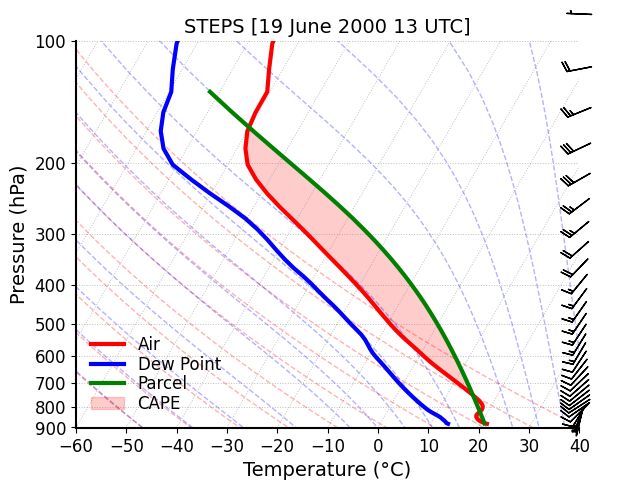

In [99]:
ds_skewt = ds_4sip.sel(time=ds_4sip.time[6])

tempc = ds_skewt.temp-273.15 #.values
pres_pa = ds_skewt.pres #.values
ht_m = ds_skewt.z_mc
rel_hum = ds_skewt.rh #.values
u_wind = ds_skewt.u
v_wind = ds_skewt.v
q_vap = ds_skewt.qv

   
temp_dew = calc_dewpoint(tempc, rel_hum)
#temp_dew = calc_tdew(tempc, rel_hum)

avg_tempc = tempc.mean(dim=('ncells')).values
avg_dewtempc = temp_dew.mean(dim=('ncells')).values
avg_pres = 0.01*pres_pa.mean(dim=('ncells')).values
avg_ht = ht_m.mean(dim=('ncells')).values
avg_rh = rel_hum.mean(dim=('ncells')).values
avg_qv = q_vap.mean(dim=('ncells')).values

avg_u = u_wind.mean(dim=('ncells')).values
avg_v = v_wind.mean(dim=('ncells')).values

avg_tempc = avg_tempc[::-1]
avg_dewtempc = avg_dewtempc[::-1]
avg_pres = avg_pres[::-1]
avg_ht = avg_ht[::-1]
avg_rh = avg_rh[::-1]
avg_u = avg_u[::-1]
avg_v = avg_v[::-1]
avg_qv = avg_qv[::-1]

# Create the Skew-T plot
fontsize=14;
lnwdth=3;
alpha=0.3;

fig = plt.figure(figsize=(8, 5))
skew = SkewT(fig)

skew.plot(avg_pres, avg_tempc, 'r-', label='Air', linewidth=lnwdth)
skew.plot(avg_pres, avg_dewtempc, 'b-', label='Dew Point', linewidth=lnwdth)

skew.plot_dry_adiabats(linewidth=1, alpha=alpha, linestyle='--')
skew.plot_moist_adiabats(linewidth=1, alpha=alpha, linestyle='--')

moist_adiabats = skew.moist_adiabats

# Now, we'll plot parcel path (that follows moist adiabatic line between LFC and LNB)
# We basically skip calculation of parcel temperature and CAPE and make use of the SKEWT plot itself

adiabat_profiles = []
for path in moist_adiabats.get_paths():
    temp_pres = path.vertices
    # We now interpolate temp_pres on available pressure levels
    adiabat_temp = np.interp(avg_pres, 
                           temp_pres[:,1][::-1],  # Pressure values
                           temp_pres[:,0][::-1])  # Temperature values
    adiabat_profiles.append(adiabat_temp)

# Find intersections between environmental temp and moist adiabats (these intersection points are LFC and LNB)
crossing_points = []
for i in range(len(avg_pres)-1):
    for j, adiabat in enumerate(adiabat_profiles):
        if ((avg_tempc[i] > adiabat[i] and avg_tempc[i+1] <= adiabat[i+1]) or 
            (avg_tempc[i] < adiabat[i] and avg_tempc[i+1] >= adiabat[i+1])):
            crossing_points.append((i, j))

# Process crossing points to find LFC and LNB
if len(crossing_points) >= 2:
    # Sort by pressure (descending)
    crossing_points.sort(key=lambda x: avg_pres[x[0]], reverse=True)
    
    lfc_idx, lfc_adiabat_idx = crossing_points[0]
    lnb_idx, lnb_adiabat_idx = crossing_points[-1]
    
    # Create parcel temperature line
    parcel_temp = np.full_like(avg_tempc, np.nan)
    parcel_temp[lfc_idx:lnb_idx+1] = adiabat_profiles[lfc_adiabat_idx][lfc_idx:lnb_idx+1]
    
    # Plot parcel path
    skew.plot(avg_pres, parcel_temp, 'g-', linewidth=lnwdth, label='Parcel')
    
    # Shade CAPE area
    skew.ax.fill_betweenx(avg_pres[lfc_idx:lnb_idx+1],
                        avg_tempc[lfc_idx:lnb_idx+1],
                        parcel_temp[lfc_idx:lnb_idx+1],
                        where=parcel_temp[lfc_idx:lnb_idx+1] > avg_tempc[lfc_idx:lnb_idx+1],
                        color='red', alpha=0.2, label='CAPE')

    # Mark LFC and LNB
    skew.plot(avg_pres[lfc_idx], avg_tempc[lfc_idx], 'k', markersize=10, markeredgewidth=2)#, label='LFC')
    skew.plot(avg_pres[lnb_idx], avg_tempc[lnb_idx], 'k', markersize=10, markeredgewidth=2)#, label='LNB')
    
    # Add text labels
    #plt.text(avg_tempc[lfc_idx]-2, avg_pres[lfc_idx]-10, 'LFC', 
    #        fontsize=fontsize-2, ha='right', va='top')
    #plt.text(avg_tempc[lnb_idx]+2, avg_pres[lnb_idx]+10, 'LNB', 
    #        fontsize=fontsize-2, ha='left', va='bottom')

# Add wind barbs if available
if 'u' in ds_skewt and 'v' in ds_skewt:
    u_wind = avg_u  # Zonal wind component
    v_wind = avg_v  # Meridional wind component
    skew.plot_barbs(avg_pres[::2], u_wind[::2], v_wind[::2], length=6, color='black', pivot='middle')

# Configure plot appearance
ax = skew.ax
ax.set_xlabel('Temperature (°C)', fontsize=fontsize)
ax.set_ylabel('Pressure (hPa)', fontsize=fontsize)
ax.set_xlim(-60, 40)
ax.set_ylim(avg_pres[0]+20, 100)
ax.tick_params(axis='both', labelsize=fontsize-2)

plt.title('STEPS [19 June 2000 13 UTC]', fontsize=fontsize)#, pad=20)

plt.legend(frameon=False, handlelength=2, labelspacing=0.1, fontsize=fontsize-2, loc='lower left')#, bbox_to_anchor=(0.7, 0.95))

plt.grid(True, linestyle=':', linewidth=0.7, color='grey', alpha=0.5)

# Clean up borders
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [111]:
print(pres_sonde)
print(e_vap)
print(qv_sonde)

[855.9 848.2 847.8 ...  98.5  98.4  98.3]
[8.32132787e+02 7.81445634e+02 7.72944876e+02 ... 1.90995475e-03
 1.88426486e-03 1.85889224e-03]
[2.17773362e+01 7.28130932e+00 6.42269613e+00 ... 1.20610649e-05
 1.19109267e-05 1.17624907e-05]


CAPE ::  1134.2228793854447
LCL ::  19.015461


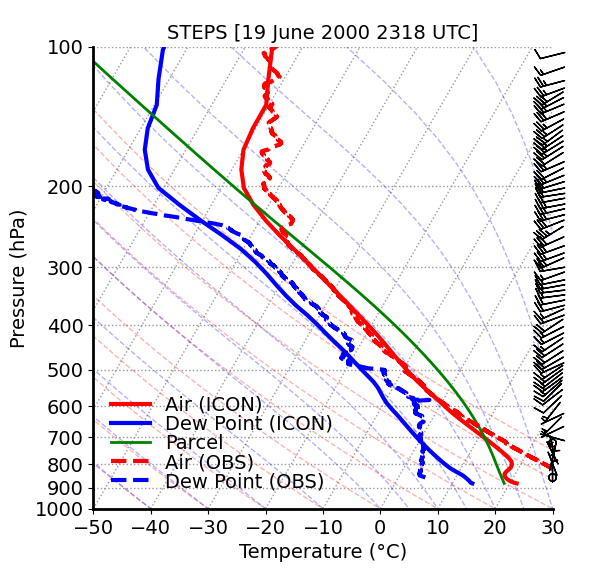

In [110]:

file_path = '/work/bk1415/b382718/output/steps/observations/sounding_data/D200006192318.st1QC.cls'
column_names = ['Time', 'pres', 'temp', 'Tdew', 'relhum', 'u_wind', 'v_wind', 'w_wind', 'w_dir', 'dZ', 'Lon', 'Lat', 'range', 'Az', 'altitude', 'Qp', 'Qt', 'Qh', 'Qu', 'Qv', 'Quv']

# Read the data with column names
ds_sonde = pd.read_csv(file_path, sep='\s+', skiprows=15, names=column_names)

ds_sonde = ds_sonde[(ds_sonde['temp'] != 999.0) & (ds_sonde['pres'] != 9999.0) & 
           (ds_sonde['Tdew'] != 999.0) & (ds_sonde['relhum'] != 999.0) & (ds_sonde['u_wind'] != 999.0) &
           (ds_sonde['v_wind'] != 999.0)& (ds_sonde['w_wind'] != 999.0)& (ds_sonde['altitude'] != 99999.0)] 

temp_sonde = ds_sonde.temp.values
pres_sonde = ds_sonde.pres.values
tdew_sonde = ds_sonde.Tdew.values
rh_sonde = ds_sonde.relhum.values
u_sonde = ds_sonde.u_wind.values
v_sonde = ds_sonde.v_wind.values
w_sonde = ds_sonde.w_wind.values
ht_sonde = ds_sonde.altitude.values

#----- Calculate parcel properties
#e_sat = e_sat_hpa(temp_sonde)
#q_sat = 0.622*e_sat/(pres_sonde-e_sat)

#e_vap = e_sat*rh_sonde
#qv_sonde = 0.622*e_vap/(pres_sonde-e_vap)

#lcl_pressure, lcl_temp = calculate_lcl(pres_sonde, temp_sonde, tdew_sonde)
##lcl_temp = calc_lcl(avg_tempc[0], avg_dewtempc)
#parcel_temp = calc_parcel_temp(pres_sonde, ht_sonde, q_sat, lcl_temp)
#Tv_env = calc_vir_temp(temp_sonde, qv_sonde)
#Tv_parcel = calc_vir_temp(parcel_temp, q_sat)
#parcel_cape = calc_cape(pres_sonde, temp_sonde, parcel_temp, Tv_env, Tv_parcel)
print('CAPE :: ',parcel_cape)
print('LCL :: ', lcl_temp)
#------

# Create the Skew-T plot
fontsize=14;
lnwdth=3;
alpha=0.3;

fig = plt.figure(figsize=(8, 6))
skew = SkewT(fig)

# Plot temperature and dew point on the Skew-T

skew.plot(avg_pres, avg_tempc, 'r-', label='Air (ICON)', linewidth=lnwdth)
skew.plot(avg_pres, avg_dewtempc, 'b-', label='Dew Point (ICON)', linewidth=lnwdth)
skew.plot(avg_pres, parcel_temp, 'g-', label='Parcel', linewidth=lnwdth-1)

skew.plot(pres_sonde, temp_sonde, 'r--', label='Air (OBS)', linewidth=lnwdth)
skew.plot(pres_sonde, tdew_sonde, 'b--', label='Dew Point (OBS)', linewidth=lnwdth)
#skew.plot(pres_sonde, parcel_temp, 'g--', label='Parcel', linewidth=lnwdth-1)

# Add wind barbs 
if 'u' in ds_skewt and 'v' in ds_skewt:
    u_wind = u_sonde  # Zonal wind component
    v_wind = v_sonde  # Meridional wind component
    skew.plot_barbs(pres_sonde[::40], u_wind[::40], v_wind[::40], length=6, color='black', pivot='middle')

# Add the dry and moist adiabats to the plot
skew.plot_dry_adiabats(linewidth=1, alpha=alpha)
skew.plot_moist_adiabats(linewidth=1, alpha=alpha)

ax = skew.ax
ax.set_xlabel('Temperature (°C)', fontsize=fontsize)
ax.set_ylabel('Pressure (hPa)', fontsize=fontsize)
ax.set_xlim(-50, 30)
ax.set_ylim(1000., 100)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)
plt.title('STEPS [19 June 2000 2318 UTC]', fontsize=fontsize)

plt.legend(frameon=False, handlelength=2, labelspacing=0.01, fontsize=fontsize, loc='lower left')
plt.grid(True, linestyle=':', linewidth=1., color='grey', alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.show()

<xarray.DataArray 'time' ()>
array('2000-06-19T18:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2000-06-19T18:00:00
Attributes:
    standard_name:  time
    axis:           T
CAPE ::  1026.5964956477408 joule / kilogram
CIN ::  -39.94582057623424 joule / kilogram


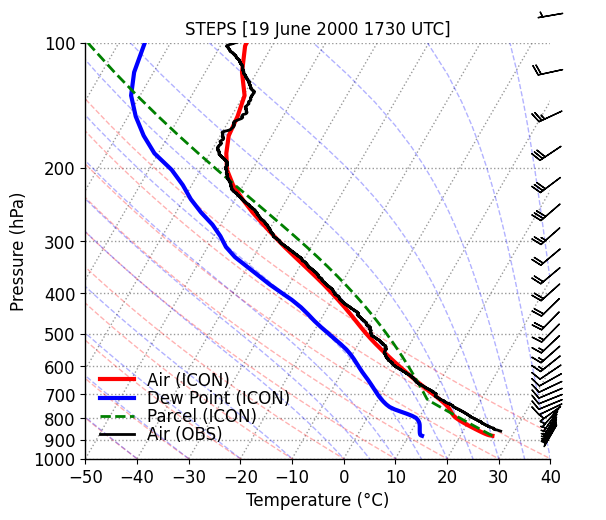

In [32]:

from metpy.calc import dewpoint_from_relative_humidity
from metpy.units import units
from metpy.calc import parcel_profile
from metpy.calc import cape_cin

file_path = '/work/bk1415/b382718/output/steps/observations/sounding_data/D200006191735.st1QC.cls'
column_names = ['Time', 'pres', 'temp', 'Tdew', 'relhum', 'u_wind', 'v_wind', 'w_wind', 'w_dir', 'dZ', 'Lon', 'Lat', 'range', 'Az', 'altitude', 'Qp', 'Qt', 'Qh', 'Qu', 'Qv', 'Quv']

# Read the data with column names
ds_sonde = pd.read_csv(file_path, sep='\s+', skiprows=15, names=column_names)

ds_sonde = ds_sonde[(ds_sonde['temp'] != 999.0) & (ds_sonde['pres'] != 9999.0) & 
           (ds_sonde['Tdew'] != 999.0) & (ds_sonde['relhum'] != 999.0) & (ds_sonde['u_wind'] != 999.0) &
           (ds_sonde['v_wind'] != 999.0)& (ds_sonde['w_wind'] != 999.0)& (ds_sonde['altitude'] != 99999.0)] 

temp_sonde = ds_sonde.temp.values
pres_sonde = ds_sonde.pres.values
tdew_sonde = ds_sonde.Tdew.values
rh_sonde = ds_sonde.relhum.values
u_sonde = ds_sonde.u_wind.values
v_sonde = ds_sonde.v_wind.values
w_sonde = ds_sonde.w_wind.values
ht_sonde = ds_sonde.altitude.values

### ICON
ds_skewt = ds_4sip.sel(time=ds_4sip.time[12])

print(ds_4sip.time[12])

tempc = ds_skewt.temp-273.15 #.values
pres_pa = ds_skewt.pres #.values
ht_m = ds_skewt.z_mc
rel_hum = ds_skewt.rh #.values
u_wind = ds_skewt.u
v_wind = ds_skewt.v
q_vap = ds_skewt.qv

   
temp_dew = calc_dewpoint(tempc, rel_hum)

avg_tempc = tempc.mean(dim=('ncells')).values
avg_dewtempc = temp_dew.mean(dim=('ncells')).values
avg_pres = 0.01*pres_pa.mean(dim=('ncells')).values
avg_ht = ht_m.mean(dim=('ncells')).values
avg_rh = rel_hum.mean(dim=('ncells')).values
avg_qv = q_vap.mean(dim=('ncells')).values

avg_u = u_wind.mean(dim=('ncells')).values
avg_v = v_wind.mean(dim=('ncells')).values

avg_tempc = avg_tempc[::-1]
avg_dewtempc = avg_dewtempc[::-1]
avg_pres = avg_pres[::-1]
avg_ht = avg_ht[::-1]
avg_rh = avg_rh[::-1]
avg_u = avg_u[::-1]
avg_v = avg_v[::-1]
avg_qv = avg_qv[::-1]

### Parcel properties from ICON
temperature_K = (avg_tempc + 273.15) * units.K
relative_humidity = avg_rh / 100.0  # Convert to fraction

dewpoint = dewpoint_from_relative_humidity(temperature_K, relative_humidity)
avg_dewtempc = dewpoint.magnitude #- 273.15

pressure = avg_pres * units.hPa
temperature = avg_tempc * units.degC
dewpoint = avg_dewtempc * units.degC

parcel_tempk = parcel_profile(pressure, temperature[0], dewpoint[0])  # First level
parcel_tempc = parcel_tempk.magnitude-273.15

parcel_tempc = parcel_tempc * units.degC
cape, cin = cape_cin(pressure, temperature, dewpoint, parcel_tempc)

print('CAPE :: ', cape)
print('CIN :: ', cin)
### End parcel properties
### End ICON

# Create the Skew-T plot
fontsize=12;
lnwdth=3;
alpha=0.3;

fig = plt.figure(figsize=(6, 8))
skew = SkewT(fig)

# Plot temperature and dew point on the Skew-T
skew.plot(avg_pres, avg_tempc, 'r-', label='Air (ICON)', linewidth=lnwdth)
skew.plot(avg_pres, avg_dewtempc, 'b-', label='Dew Point (ICON)', linewidth=lnwdth)
skew.plot(avg_pres, parcel_tempc, 'g--', label='Parcel (ICON)', linewidth=lnwdth-1)
skew.plot(pres_sonde* units.hPa, temp_sonde* units.degC, 'k-', label='Air (OBS)', linewidth=lnwdth-1)

# Add wind barbs 
if 'u' in ds_skewt and 'v' in ds_skewt:
    u_wind = avg_u  # Zonal wind component
    v_wind = avg_v  # Meridional wind component
    skew.plot_barbs(avg_pres[::2], u_wind[::2], v_wind[::2], length=6, color='black', pivot='middle')

# Add the dry and moist adiabats to the plot
skew.plot_dry_adiabats(linewidth=1, alpha=alpha)
skew.plot_moist_adiabats(linewidth=1, alpha=alpha)

ax = skew.ax
ax.set_xlabel('Temperature (°C)', fontsize=fontsize)
ax.set_ylabel('Pressure (hPa)', fontsize=fontsize)
ax.set_xlim(-50, 40)
ax.set_ylim(1000., 100)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)
plt.title('STEPS [19 June 2000 1730 UTC]', fontsize=fontsize)

plt.legend(frameon=False, handlelength=2, labelspacing=0.01, fontsize=fontsize, loc='lower left')
plt.grid(True, linestyle=':', linewidth=1., color='grey', alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.show()

# Radar

##### Before we go into details of the S-Pol radar data from STEPS, lets understand a few basic things 
##### about the radar scan

##### Radar scans rotate 360°, and the azimuth tells you where the radar is “looking.”

##### Interpreting scan direction from the radar Azimuth angle
#####     Azimuth(°) ==  Direction
#####         0      ==   North
#####        90      ==   East
#####       180      ==   South
#####       270      ==   West              

##### When we say "eastward distance", we mean: “How far something is to the east or west of the radar?”
##### If a target (like a cloud or storm) is directly east of the radar → its eastward distance is positive
##### If it’s directly west of the radar → its eastward distance is negative

##### ===========================================================================================
##### Azimuth tells the direction the radar is scanning.
##### Eastward distance means “how far east or west something is from the radar.”
##### If azimuth is in the east half (0–180°), targets are generally eastward (positive).
##### If azimuth is in the west half (180–360°), targets are generally westward (negative).
##### ===========================================================================================


(0.0, 140.0)

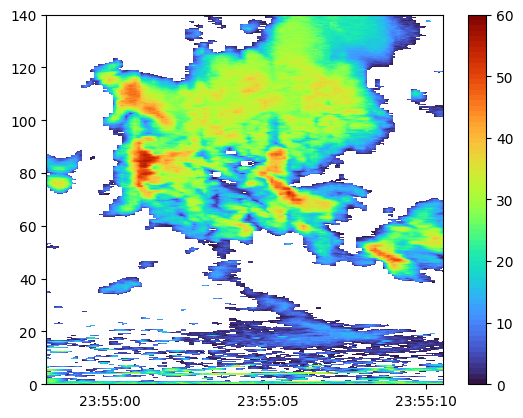

In [7]:
file_path='/work/bk1415/b382718/output/steps/observations/radar_data/deepa405903/20000619_0620'
ds_spol1 = xr.open_mfdataset(f'{file_path}/cfrad.20000619_235458.000_to_20000619_235510.533_SPOL_PPI.nc');

ds_spol1['refl'] = xr.where(ds_spol1.DZ > 0., ds_spol1.DZ, np.nan)

lev = np.linspace(0,60,70)
cont = plt.contourf(ds_spol1.time, 1.e-3*ds_spol1.range, ds_spol1.refl.T, levels=lev, cmap='turbo')
plt.colorbar(cont, ticks=[0, 10, 20, 30, 40, 50, 60])
plt.ylim(0, 140)

In [8]:

import os

file_path1='/work/bk1415/b382718/output/steps/observations/radar_data/deepa405903/20000619_0620'

# List of hhmm prefixes you want to match
hhmm_list = [
    '0001', '0002', '0003', '0004', '0007', '0008', '0009', 
    '0010', '0014', '0015', '0016', '0019', '0020', '0022', '0026', '0034', '0040', 
    '0045', '0055', '0100', '0110', '0115', '0120']#, '0122']

# Find matching files for all these times
file_list = []
for hhmm in hhmm_list:
    files = glob.glob(os.path.join(file_path1, f'cfrad.20000620_{hhmm}*PPI.nc'))
    file_list.extend(files)

file_list = sorted(file_list)
ds_ppi_0001_0120 = xr.open_mfdataset(file_list, combine='by_coords')


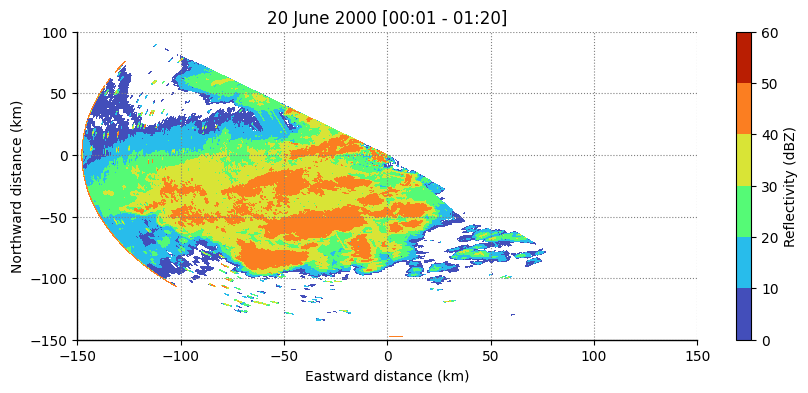

In [9]:


ds_ppi_0001_0120['refl'] = xr.where((ds_ppi_0001_0120.DZ > 0.) & (ds_ppi_0001_0120.DZ < 50.), ds_ppi_0001_0120.DZ, np.nan)


## Need to convert radar data from polar to cartesian coordinate to plot properly 
## To plot range-height plot, convert data into eastward & northward distance from ds.range and ds.azimuth 

# Get azimuth and range, convert to radians and km
azimuth = ds_ppi_0001_0120['azimuth'].values             # shape: (azimuth,)
range_gate = ds_ppi_0001_0120['range'].values * 1e-3     # convert m to km, shape: (range,)
theta = np.deg2rad(azimuth)                # radians

# 2D grids for (azimuth, range)
r_grid, theta_grid = np.meshgrid(range_gate, theta)

# Convert polar to Cartesian
eastward_dist = r_grid * np.sin(theta_grid)            # eastward (km)
northward_dist = r_grid * np.cos(theta_grid)            # northward (km)

lev = np.linspace(0, 60, 7)
# Plotting
plt.figure(figsize=(10, 4))
cont = plt.contourf(eastward_dist, northward_dist, ds_ppi_0001_0120.refl, cmap='turbo', levels=lev, shading='auto')

plt.grid(True, linestyle=':', color='grey', alpha=1.0)

plt.xlim(-150, 150)
plt.ylim(-150, 100)
plt.xlabel('Eastward distance (km)')
plt.ylabel('Northward distance (km)')
plt.title('20 June 2000 [00:01 - 01:20]')
plt.colorbar(cont, ticks=[0, 10, 20, 30, 40, 50, 60], label='Reflectivity (dBZ)')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)

plt.show()


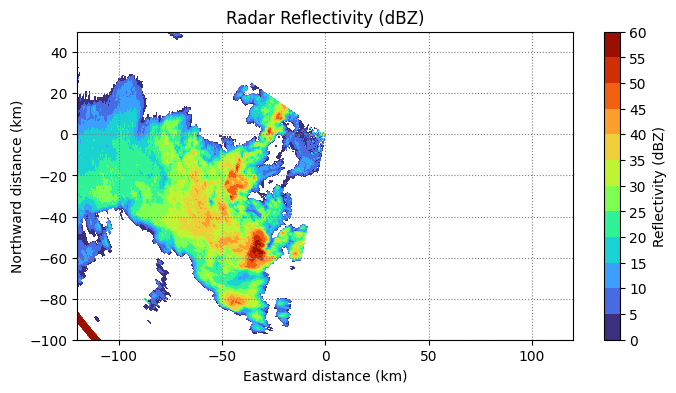

In [10]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt



file_path='/work/bk1415/b382718/output/steps/observations/radar_data/deepa405903/20000619_0620'
ds_spol1 = xr.open_mfdataset(f'{file_path}/cfrad.20000620_002602.700_to_20000620_002615.300_SPOL_PPI.nc');

ds_spol1['refl'] = xr.where(ds_spol1.DZ > 0., ds_spol1.DZ, np.nan)


## Need to convert radar data from polar to cartesian coordinate to plot properly 
## To plot range-height plot, convert data into eastward & northward distance from ds.range and ds.azimuth 

# Get azimuth and range, convert to radians and km
azimuth = ds_spol1['azimuth'].values             # shape: (azimuth,)
range_gate = ds_spol1['range'].values * 1e-3     # convert m to km, shape: (range,)
theta = np.deg2rad(azimuth)                # radians

# 2D grids for (azimuth, range)
r_grid, theta_grid = np.meshgrid(range_gate, theta)

# Convert polar to Cartesian
x = r_grid * np.sin(theta_grid)            # eastward (km)
y = r_grid * np.cos(theta_grid)            # northward (km)

lev = np.linspace(0, 60, 13)
# Plotting
plt.figure(figsize=(8, 4))
cont = plt.contourf(x, y, ds_spol1.refl, cmap='turbo', levels=lev, shading='auto')

plt.grid(True, linestyle=':', color='grey', alpha=1.0)

plt.xlim(-120, 120)
plt.ylim(-100, 50)
plt.xlabel('Eastward distance (km)')
plt.ylabel('Northward distance (km)')
plt.title('Radar Reflectivity (dBZ)')
plt.colorbar(cont, ticks=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60], label='Reflectivity (dBZ)')

#plt.tight_layout()
plt.show()


In [11]:

import os

file_path1='/work/bk1415/b382718/output/steps/observations/radar_data/deepa405903/20000619_0620'

# List of hhmm prefixes you want to match
hhmm_list = [
    '0001', '0002', '0003', '0004', '0007', '0008', '0009', 
    '0010', '0014', '0015', '0016', '0019', '0020', '0022', '0026', '0034', '0040', 
    '0045', '0055', '0100', '0110', '0115', '0120', '0122', '0125', '0135', '0145', 
    '0155', '0200', '0213', '0214', '0215', '0216', '0217']

# Find matching files for all these times
file_list = []
for hhmm in hhmm_list:
    files = glob.glob(os.path.join(file_path1, f'cfrad.20000620_{hhmm}*PPI.nc'))
    file_list.extend(files)

file_list = sorted(file_list)
ds_ppi_0001_0217 = xr.open_mfdataset(file_list, combine='by_coords')


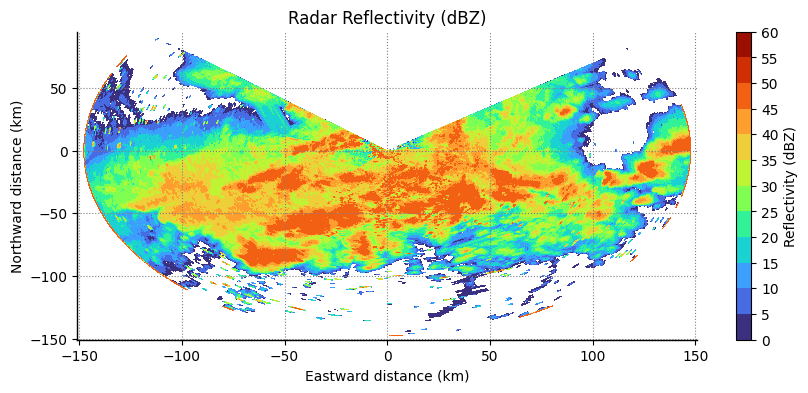

In [12]:
ds_ppi_0001_0217['refl'] = xr.where((ds_ppi_0001_0217.DZ > 0.) & (ds_ppi_0001_0217.DZ < 50.), ds_ppi_0001_0217.DZ, np.nan)


## Need to convert radar data from polar to cartesian coordinate to plot properly 
## To plot range-height plot, convert data into eastward & northward distance from ds.range and ds.azimuth 

# Get azimuth and range, convert to radians and km
azimuth = ds_ppi_0001_0217['azimuth'].values             # shape: (azimuth,)
range_gate = ds_ppi_0001_0217['range'].values * 1e-3     # convert m to km, shape: (range,)
theta = np.deg2rad(azimuth)                # radians

# 2D grids for (azimuth, range)
r_grid, theta_grid = np.meshgrid(range_gate, theta)

# Convert polar to Cartesian
x = r_grid * np.sin(theta_grid)            # eastward (km)
y = r_grid * np.cos(theta_grid)            # northward (km)

lev = np.linspace(0, 60, 13)
# Plotting
plt.figure(figsize=(10, 4))
cont = plt.contourf(x, y, ds_ppi_0001_0217.refl, cmap='turbo', levels=lev, shading='auto')

plt.grid(True, linestyle=':', color='grey', alpha=1.0)

#plt.xlim(-120, 20)
#plt.ylim(-100, 20)
plt.xlabel('Eastward distance (km)')
plt.ylabel('Northward distance (km)')
plt.title('Radar Reflectivity (dBZ)')
plt.colorbar(cont, ticks=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60], label='Reflectivity (dBZ)')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)

#plt.tight_layout()
plt.show()

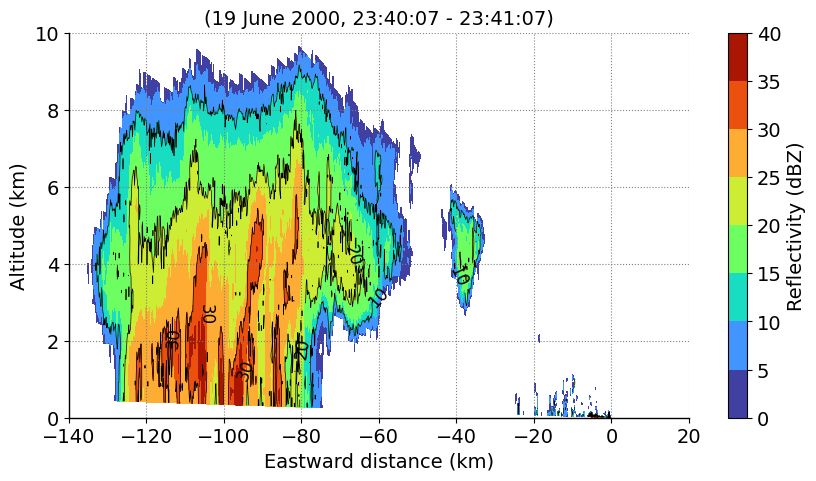

In [33]:


file_path='/work/bk1415/b382718/output/steps/observations/radar_data/deepa405903/20000619_0620'
ds_rhi = xr.open_mfdataset(f'{file_path}/cfrad.20000619_234058.267_to_20000619_234107.667_SPOL_RHI.nc');

ds_rhi['refl'] = xr.where(ds_rhi.DZ > 0., ds_rhi.DZ, np.nan)
 
## Need to convert radar data from polar to cartesian coordinate to plot properly 

## To plot range-height plot, convert data into horizontal distance and height from ds.range and ds.elevation 

# Get azimuth and range, convert to radians and km

theta_elev = ds_rhi['elevation'].values             # shape: (elevation,)
range_gate = ds_rhi['range'].values * 1e-3     # convert m to km, shape: (range,)
theta = np.deg2rad(theta_elev)                # radians


# 2D grids for (azimuth, range)
r_grid, theta_grid = np.meshgrid(range_gate, theta)

# Convert polar to Cartesian
hor_dist = r_grid * np.cos(theta_grid)            # horizontal distance (km)
height = r_grid * np.sin(theta_grid)            # height (km)

lev = np.linspace(0, 40, 9)
cont_lev = range(0, 51, 10)
fontsize=14
# Plotting
plt.figure(figsize=(10, 5))
cont = plt.contourf(-1*hor_dist, height, ds_rhi.refl, cmap='turbo', levels=lev, shading='auto')

contour=plt.contour(-1*hor_dist, height, ds_rhi.refl, levels=cont_lev, colors='k', linestyles='-', linewidths=0.5)
plt.clabel(contour, inline=True, fontsize=fontsize-2, fmt='%d')

plt.grid(True, linestyle=':', color='grey', alpha=1.0)
plt.xlim(-140, 20)
plt.ylim(0, 10)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Eastward distance (km)', fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)
plt.title('(19 June 2000, 23:40:07 - 23:41:07)', fontsize=fontsize)
cb=plt.colorbar(cont, ticks=[0, 5, 10, 15, 20, 25, 30, 35, 40], label='Reflectivity (dBZ)')
cb.ax.tick_params(labelsize=fontsize)
cb.set_label(label='Reflectivity (dBZ)', size=fontsize)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)

#plt.tight_layout()
plt.show()

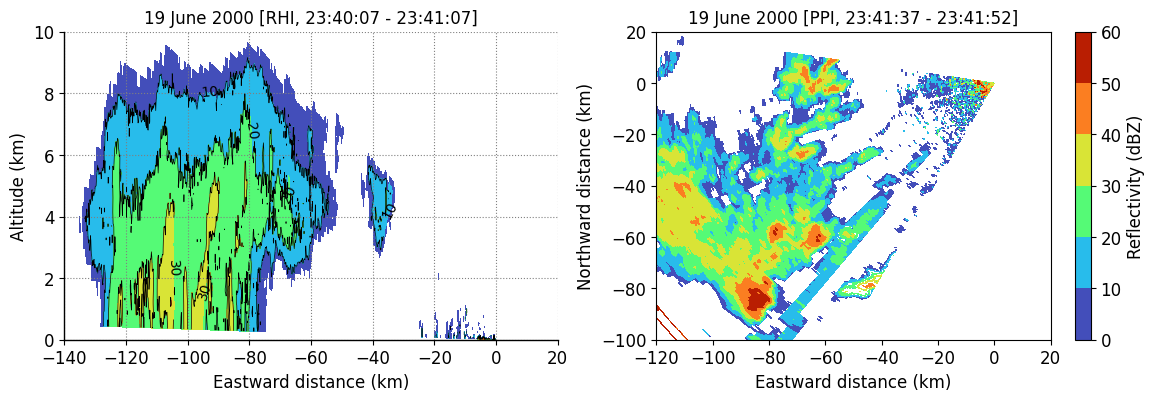

In [34]:


file_path='/work/bk1415/b382718/output/steps/observations/radar_data/deepa405903/20000619_0620'

ds_ppi = xr.open_mfdataset(f'{file_path}/cfrad.20000619_234137.133_to_20000619_234152.800_SPOL_PPI.nc');

ds_ppi['refl'] = xr.where(ds_ppi.DZ > 0., ds_ppi.DZ, np.nan)


ds_rhi = xr.open_mfdataset(f'{file_path}/cfrad.20000619_234058.267_to_20000619_234107.667_SPOL_RHI.nc');

ds_rhi['refl'] = xr.where(ds_rhi.DZ > 0., ds_rhi.DZ, np.nan)
 
## Need to convert radar data from polar to cartesian coordinate to plot properly 
## To plot eastward-northward plot, convert data into eastward & northward distance from ds.range and ds.azimuth 

# Get azimuth and range, convert to radians and km
azimuth = ds_ppi['azimuth'].values             # shape: (azimuth,)
range_gate = ds_ppi['range'].values * 1e-3     # convert m to km, shape: (range,)
theta = np.deg2rad(azimuth)                # radians

# 2D grids for (azimuth, range)
r_grid, theta_grid = np.meshgrid(range_gate, theta)

# Convert polar to Cartesian
eastward_dist = r_grid * np.sin(theta_grid)            # eastward (km)
northward_dist = r_grid * np.cos(theta_grid)            # northward (km)

## To plot range-height plot, convert data into horizontal distance and height from ds.range and ds.elevation 

# Get elevation and range, convert to radians and km

theta_elev = ds_rhi['elevation'].values             # shape: (elevation,)
range_gate = ds_rhi['range'].values * 1e-3     # convert m to km, shape: (range,)
theta = np.deg2rad(theta_elev)                # radians


# 2D grids for (azimuth, range)
r_grid, theta_grid = np.meshgrid(range_gate, theta)

# Convert polar to Cartesian
hor_dist = r_grid * np.cos(theta_grid)            # horizontal distance (km)
height = r_grid * np.sin(theta_grid)            # height (km)

lev = np.linspace(0, 60, 7)
cont_lev = range(0, 51, 10)
fontsize=12


# Plotting
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
cont = plt.contourf(-1*hor_dist, height, ds_rhi.refl, cmap='turbo', levels=lev, shading='auto')

contour=plt.contour(-1*hor_dist, height, ds_rhi.refl, levels=cont_lev, colors='k', linestyles='-', linewidths=0.5)
plt.clabel(contour, inline=True, fontsize=fontsize-2, fmt='%d')

plt.grid(True, linestyle=':', color='grey', alpha=1.0)
plt.xlim(-140, 20)
plt.ylim(0, 10)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Eastward distance (km)', fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)
plt.title('19 June 2000 [RHI, 23:40:07 - 23:41:07]', fontsize=fontsize)
#cb=plt.colorbar(cont, ticks=[0, 5, 10, 15, 20, 25, 30, 35, 40], label='Reflectivity (dBZ)')
#cb.ax.tick_params(labelsize=fontsize)
#cb.set_label(label='Reflectivity (dBZ)', size=fontsize)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)

plt.subplot(1,2,2)
cont = plt.contourf(eastward_dist, northward_dist, ds_ppi.refl, cmap='turbo', levels=lev, shading='auto')

#contour=plt.contour(eastward_dist, northward_dist, ds_ppi.refl, levels=cont_lev, colors='k', linestyles='-', linewidths=0.5)
#plt.clabel(contour, inline=True, fontsize=fontsize-2, fmt='%d')

plt.xlim(-120, 20)
plt.ylim(-100, 20)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Eastward distance (km)', fontsize=fontsize)
plt.ylabel('Northward distance (km)', fontsize=fontsize)
plt.title('19 June 2000 [PPI, 23:41:37 - 23:41:52]', fontsize=fontsize)
cb=plt.colorbar(cont, ticks=[0, 10, 20, 30, 40, 50, 60], label='Reflectivity (dBZ)')
cb.ax.tick_params(labelsize=fontsize)
cb.set_label(label='Reflectivity (dBZ)', size=fontsize)

#plt.tight_layout()
plt.show()

In [15]:
import os

file_path1='/work/bk1415/b382718/output/steps/observations/radar_data/deepa405903/20000619_0620'

# List of hhmm prefixes you want to match
hhmm_list = [
    '0001', '0002', '0003', '0004', '0007', '0008', '0009', 
    '0010', '0014', '0015', '0016', '0019', '0020', '0022', '0026', '0028', '0029', 
    '0032']

# Find matching files for all these times
file_list = []
for hhmm in hhmm_list:
    files = glob.glob(os.path.join(file_path1, f'cfrad.20000620_{hhmm}*PPI.nc'))
    file_list.extend(files)

file_list = sorted(file_list)
ds_ppi_0001_0032 = xr.open_mfdataset(file_list, combine='by_coords')


hhmm_list = [
    '0001', '0005', '0006', '0007', '0012', '0013', '0014', 
    '0017', '0018', '0019', '0023', '0024', '0025', '0030']

# Find matching files for all these times
file_list = []
for hhmm in hhmm_list:
    files = glob.glob(os.path.join(file_path1, f'cfrad.20000620_{hhmm}*RHI.nc'))
    file_list.extend(files)

file_list = sorted(file_list)
ds_rhi_0001_0030 = xr.open_mfdataset(file_list, combine='by_coords')


In [28]:
print(eastward_dist)

[[-1.02363788e-01 -2.04652935e-01 -3.06942075e-01 ... -1.02800667e+02
  -1.02902954e+02 -1.03005241e+02]
 [-9.69812721e-02 -1.93891823e-01 -2.90802389e-01 ... -9.73951797e+01
  -9.74920883e+01 -9.75889969e+01]
 [-9.35885087e-02 -1.87108770e-01 -2.80629039e-01 ... -9.39879379e+01
  -9.40814590e+01 -9.41749725e+01]
 ...
 [-1.26577809e-01 -2.53063321e-01 -3.79548818e-01 ... -1.27118027e+02
  -1.27244514e+02 -1.27370995e+02]
 [-1.25209659e-01 -2.50328004e-01 -3.75446349e-01 ... -1.25744041e+02
  -1.25869156e+02 -1.25994270e+02]
 [-1.23790011e-01 -2.47489765e-01 -3.71189505e-01 ... -1.24318344e+02
  -1.24442039e+02 -1.24565735e+02]]


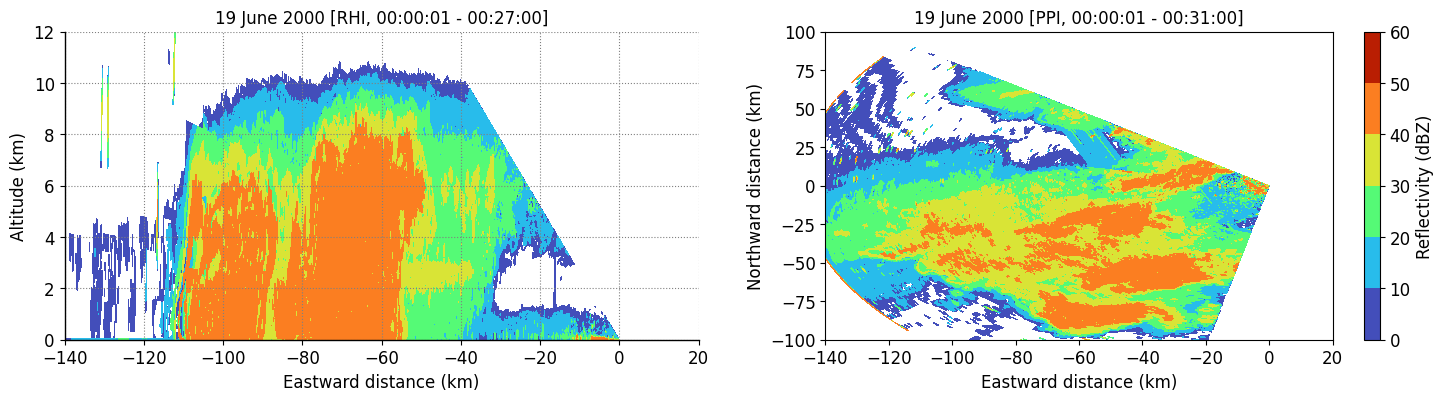

In [35]:

ds_ppi_0001_0032['refl'] = xr.where((ds_ppi_0001_0032.DZ > 0.) & (ds_ppi_0001_0032.DZ < 50.), ds_ppi_0001_0032.DZ, np.nan)
ds_rhi_0001_0030['refl'] = xr.where((ds_rhi_0001_0030.DZ > 0.) & (ds_rhi_0001_0030.DZ < 50.), ds_rhi_0001_0030.DZ, np.nan)


azimuth = ds_ppi_0001_0032['azimuth'].values             # shape: (azimuth,)
range_gate = ds_ppi_0001_0032['range'].values * 1e-3     # convert m to km, shape: (range,)
theta = np.deg2rad(azimuth)                # radians

# 2D grids for (azimuth, range)
r_grid, theta_grid = np.meshgrid(range_gate, theta)

# Convert polar to Cartesian
eastward_dist = r_grid * np.sin(theta_grid)            # eastward (km)
northward_dist = r_grid * np.cos(theta_grid)            # northward (km)

## To plot range-height plot, convert data into horizontal distance and height from ds.range and ds.elevation 

# Get elevation and range, convert to radians and km

theta_elev = ds_rhi_0001_0030['elevation'].values             # shape: (elevation,)
range_gate = ds_rhi_0001_0030['range'].values * 1e-3     # convert m to km, shape: (range,)
theta = np.deg2rad(theta_elev)                # radians


# 2D grids for (azimuth, range)
r_grid, theta_grid = np.meshgrid(range_gate, theta)

# Convert polar to Cartesian
hor_dist = r_grid * np.cos(theta_grid)            # horizontal distance (km)
height = r_grid * np.sin(theta_grid)            # height (km)

lev = np.linspace(0, 60, 7)
cont_lev = range(0, 51, 10)
fontsize=12


# Plotting
plt.figure(figsize=(18, 4))
plt.subplot(1,2,1)
cont = plt.contourf(-1.*hor_dist, height, ds_rhi_0001_0030.refl, cmap='turbo', levels=lev, shading='auto')

#contour=plt.contour(hor_dist, height, ds_rhi_0001_0030.refl, levels=cont_lev, colors='k', linestyles='-', linewidths=0.5)
#plt.clabel(contour, inline=True, fontsize=fontsize-2, fmt='%d')

plt.grid(True, linestyle=':', color='grey', alpha=1.0)


plt.xlim(-140, 20)
plt.ylim(0, 12)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

#plt.xlabel("Distance along radar beam (~220° azimuth) (km)") # if using positive values of hor_dist

plt.xlabel('Eastward distance (km)', fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)
plt.title('19 June 2000 [RHI, 00:00:01 - 00:27:00]', fontsize=fontsize)
#cb=plt.colorbar(cont, ticks=[0, 5, 10, 15, 20, 25, 30, 35, 40], label='Reflectivity (dBZ)')
#cb.ax.tick_params(labelsize=fontsize)
#cb.set_label(label='Reflectivity (dBZ)', size=fontsize)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)

plt.subplot(1,2,2)
cont = plt.contourf(eastward_dist, northward_dist, ds_ppi_0001_0032.refl, cmap='turbo', levels=lev, shading='auto')

#contour=plt.contour(eastward_dist, northward_dist, ds_ppi.refl, levels=cont_lev, colors='k', linestyles='-', linewidths=0.5)
#plt.clabel(contour, inline=True, fontsize=fontsize-2, fmt='%d')


plt.xlim(-140, 20)
plt.ylim(-100, 100)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Eastward distance (km)', fontsize=fontsize)
plt.ylabel('Northward distance (km)', fontsize=fontsize)
plt.title('19 June 2000 [PPI, 00:00:01 - 00:31:00]', fontsize=fontsize)
cb=plt.colorbar(cont, ticks=[0, 10, 20, 30, 40, 50, 60], label='Reflectivity (dBZ)')
cb.ax.tick_params(labelsize=fontsize)
cb.set_label(label='Reflectivity (dBZ)', size=fontsize)

#plt.tight_layout()
plt.show()

In [24]:

print(ds_rhi_0001_0030.azimuth.values)
print(ds_rhi_0001_0030.elevation.values)
print(ds_ppi_0001_0032.azimuth.values)
print(ds_ppi_0001_0032.elevation.values)

[223.74756 223.74756 223.75854 ... 215.00244 215.00244 215.00244]
[359.85718  359.8105   359.7473   ...  13.301697  13.592834  13.883972]
[223.03345 220.28137 218.60321 ... 302.45087 303.41217 304.38446]
[11.738892  11.195068   9.992065  ...  2.0214844  2.0214844  2.0214844]


In [21]:

print(ds_rhi_0001_0030.longitude.values)
print(ds_rhi_0001_0030.latitude.values)
print(ds_ppi_0001_0032.longitude.values)
print(ds_ppi_0001_0032.latitude.values)

[-102.09346771 -102.09346771 -102.09346771 ... -102.09346771 -102.09346771
 -102.09346771]
[39.76114273 39.76114273 39.76114273 ... 39.76114273 39.76114273
 39.76114273]
[-102.09346771 -102.09346771 -102.09346771 ... -102.09346771 -102.09346771
 -102.09346771]
[39.76114273 39.76114273 39.76114273 ... 39.76114273 39.76114273
 39.76114273]


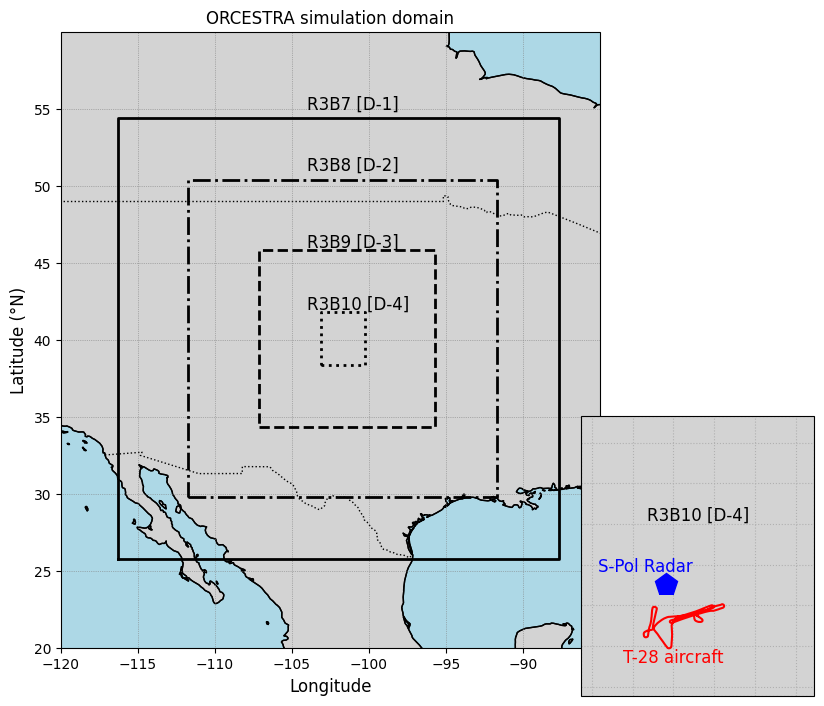

In [18]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# open radar dataset
file_path='/work/bk1415/b382718/output/steps/observations/radar_data/deepa405903/20000619_0620'
ds_spol1 = xr.open_mfdataset(f'{file_path}/cfrad.20000620_002602.700_to_20000620_002615.300_SPOL_PPI.nc');

mean_lon_rad = np.nanmean(ds_spol1.longitude)
mean_lat_rad = np.nanmean(ds_spol1.latitude)

ds_spol1['refl'] = xr.where(ds_spol1.DZ > 0., ds_spol1.DZ, np.nan)

# Open aircraft dataset
ds_t28 = xr.open_dataset('/work/bk1415/b382718/output/steps/observations/aircraft_data/T28_STEPS2000_756.nc')

mean_lon_t28 = np.nanmean(ds_t28.LONGITUDE_DECIMAL_DEG_20Hz, axis=1)
mean_lat_t28 = np.nanmean(ds_t28.LATITUDE_DECIMAL_DEG_20Hz, axis=1)

mean_lon_t28[mean_lon_t28 > -101] = np.nan
mean_lat_t28[mean_lat_t28 < 38] = np.nan

# Define bounding boxes (in degrees)
lon4 = [np.rad2deg(-1.8), np.rad2deg(-1.75)]
lat4 = [np.rad2deg(0.67), np.rad2deg(0.73)]
lon1 = [np.rad2deg(-2.029706), np.rad2deg(-1.53023)]
lat1 = [np.rad2deg(0.45), np.rad2deg(0.95)]
lon2 = [np.rad2deg(-1.95), np.rad2deg(-1.60)]
lat2 = [np.rad2deg(0.52), np.rad2deg(0.88)]
lon3 = [np.rad2deg(-1.87), np.rad2deg(-1.67)]
lat3 = [np.rad2deg(0.6), np.rad2deg(0.80)]

fontsize = 12
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Plot base map
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')

# Plot bounding boxes
for lon, lat, style in zip(
    [lon1, lon2, lon3, lon4],
    [lat1, lat2, lat3, lat4],
    ['-', '-.', '--', ':']
):
    ax.plot([lon[0], lon[1], lon[1], lon[0], lon[0]],
            [lat[0], lat[0], lat[1], lat[1], lat[0]],
            color='black', linewidth=2, linestyle=style, transform=proj)

# Aircraft track
#ax.plot(mean_lon_t28, mean_lat_t28, 'r-', linewidth=2, transform=proj)

# Labels
ax.text(-104, 55, "R3B7 [D-1]", transform=proj, fontsize=fontsize)
ax.text(-104, 51, "R3B8 [D-2]", transform=proj, fontsize=fontsize)
ax.text(-104, 46, "R3B9 [D-3]", transform=proj, fontsize=fontsize)
ax.text(-104, 42, "R3B10 [D-4]", transform=proj, fontsize=fontsize)

# Map limits
ax.set_xlim(-120., -85.)
ax.set_ylim(20., 60.)
ax.set_xticks(range(-120, -85, 5))
ax.set_yticks(range(20, 60, 5))
ax.set_xlabel("Longitude", fontsize=fontsize)
ax.set_ylabel("Latitude (°N)", fontsize=fontsize)
ax.set_title('ORCESTRA simulation domain', fontsize=fontsize)
ax.grid(True, linestyle=':', linewidth=0.5, color='grey')

# === Create inset axes === #
inset_position = [0.60, 0.05, 0.35, 0.35]  # [left, bottom, width, height] in figure coordinates
inset_ax = fig.add_axes(inset_position, projection=proj)
inset_ax.set_extent([lon4[0], lon4[1], lat4[0], lat4[1]], crs=proj)
inset_ax.coastlines(resolution='50m')
inset_ax.add_feature(cfeature.LAND, facecolor='lightgray')
inset_ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
inset_ax.gridlines(draw_labels=False, linestyle=':')

# Aircraft track in inset
inset_ax.plot(mean_lon_t28, mean_lat_t28, 'r-', transform=proj)

# Draw zoomed box again in inset 
inset_ax.plot([lon4[0], lon4[1], lon4[1], lon4[0], lon4[0]],
              [lat4[0], lat4[0], lat4[1], lat4[1], lat4[0]],
              color='black', linewidth=1, linestyle=':', alpha=0.1, transform=proj)

inset_ax.text(np.mean(lon4), np.mean(lat4)+0.5, 'R3B10 [D-4]', transform=proj, 
              fontsize=fontsize, ha='center', va='center', 
              bbox=dict(facecolor='none', edgecolor='none', alpha=0.7))


# --- Radar marker in zoomed inset ---
inset_ax.plot(mean_lon_rad, mean_lat_rad, marker='p', color='blue', markersize=16, transform=proj)
inset_ax.text(mean_lon_rad-0.25, mean_lat_rad+0.15, 'S-Pol Radar', transform=proj, fontsize=fontsize, ha='center', color='blue')
inset_ax.text(-102, 38.8, 'T-28 aircraft', transform=proj, fontsize=fontsize, ha='center', color='red')

plt.show()


In [277]:

import os

file_path1='/work/bk1415/b382718/output/steps/observations/radar_data/deepa405903/20000619_0620'

# List of hhmm prefixes you want to match
hhmm_list = [
    '2318', '2319', '2320', '2322', '2323', '2324', '2325', '2326', '2328', '2329',
    '2330', '2331', '2332', '2335', '2336', '2337', '2338', '2339', '2341', '2342',
    '2343', '2344', '2345', '2348', '2349', '2350', '2351', '2352', '2354', '2355',
    '2356', '2357', '2358']#, '0001', '0002', '0003', '0004', '0007', '0008', '0009', 
    #'0010', '0014', '0015', '0016', '0019', '0020', '0022', '0026', '0034', '0040', 
    #'0045', '0055', '0100', '0110', '0115', '0120', '0122', '0125', '0135', '0145', 
    #'0155', '0200', '0213'
#]

# Find matching files for all these times
file_list = []
for hhmm in hhmm_list:
    files = glob.glob(os.path.join(file_path1, f'cfrad.20000619_{hhmm}*PPI.nc'))
    file_list.extend(files)

file_list = sorted(file_list)
ds_ppi_2318_2358 = xr.open_mfdataset(file_list, combine='by_coords')

# List of dates to search
#date_list = ['20000619', '20000620']

#file_list = []
#for date in date_list:
#    for hhmm in hhmm_list:
#        pattern = os.path.join(file_path1, f'cfrad.{date}_{hhmm}*PPI.nc')
#        files = glob.glob(pattern)
#        file_list.extend(files)
        
# Sort and open them
#file_list = sorted(file_list)
#ds_ppi_2318_0213 = xr.open_mfdataset(file_list, combine='by_coords')


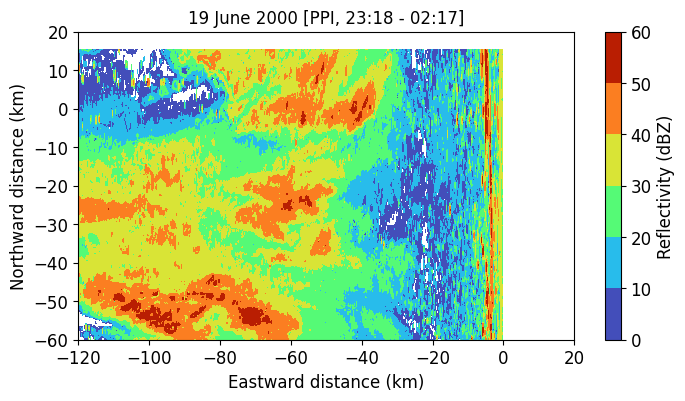

In [278]:


ds_ppi_2318_2358['refl'] = xr.where(ds_ppi_2318_2358.DZ > 0., ds_ppi_2318_2358.DZ, np.nan)

## Need to convert radar data from polar to cartesian coordinate to plot properly 
## To plot eastward-northward plot, convert data into eastward & northward distance from ds.range and ds.azimuth 

# Get azimuth and range, convert to radians and km
azimuth = ds_ppi_2318_2358['azimuth'].values             # shape: (azimuth,)
range_gate = ds_ppi_2318_2358['range'].values * 1e-3     # convert m to km, shape: (range,)
theta = np.deg2rad(azimuth)                # radians

# 2D grids for (azimuth, range)
r_grid, theta_grid = np.meshgrid(range_gate, theta)

# Convert polar to Cartesian
eastward_dist = r_grid * np.sin(theta_grid)            # eastward (km)
northward_dist = r_grid * np.cos(theta_grid)            # northward (km)


lev = np.linspace(0, 60, 7)
cont_lev = range(0, 51, 10)
fontsize=12


# Plotting
plt.figure(figsize=(8, 4))
#cont = plt.contourf(eastward_dist, northward_dist, ds_ppi_2318_2358.refl, cmap='turbo', levels=lev, shading='auto')
cont = plt.contourf(np.nanmean(eastward_dist, axis=0), np.nanmean(northward_dist, axis=1), ds_ppi_2318_2358.refl, cmap='turbo', levels=lev, shading='auto')
#contour=plt.contour(eastward_dist, northward_dist, ds_ppi.refl, levels=cont_lev, colors='k', linestyles='-', linewidths=0.5)
#plt.clabel(contour, inline=True, fontsize=fontsize-2, fmt='%d')

plt.xlim(-120, 20)
plt.ylim(-60, 20)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Eastward distance (km)', fontsize=fontsize)
plt.ylabel('Northward distance (km)', fontsize=fontsize)
plt.title('19 June 2000 [PPI, 23:18 - 02:17]', fontsize=fontsize)
cb=plt.colorbar(cont, ticks=[0, 10, 20, 30, 40, 50, 60], label='Reflectivity (dBZ)')
cb.ax.tick_params(labelsize=fontsize)
cb.set_label(label='Reflectivity (dBZ)', size=fontsize)

#plt.tight_layout()
plt.show()

In [258]:
ds_ppi_2318_2358.refl

<xarray.DataArray 'refl' (time: 11666, range: 1007)> Size: 47MB
dask.array<where, shape=(11666, 1007), dtype=float32, chunksize=(113, 1007), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 93kB 2000-06-19T23:18:13.266999959 ... 200...
  * range    (range) float32 4kB 150.0 299.9 449.8 ... 1.508e+05 1.509e+05

In [ ]:
import os
import re
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# 1. Data Loading and Filtering (same as your code)
file_path1 = '/work/bk1415/b382718/output/steps/observations/radar_data/deepa405903/20000619'
hhmm_list = [
    '2318', '2319', '2320', '2322', '2323', '2324', '2325', '2326', '2328', '2329',
    '2330', '2331', '2332', '2335', '2336', '2337', '2338', '2339', '2341', '2342',
    '2343', '2344', '2345', '2348', '2349', '2350', '2351', '2352', '2354', '2355',
    '2356', '2357', '2358'
]

file_list = []
for hhmm in hhmm_list:
    files = glob.glob(os.path.join(file_path1, f'cfrad.20000619_{hhmm}*PPI.nc'))
    file_list.extend(files)

file_list = sorted(file_list)
ds_ppi_2318_2358 = xr.open_mfdataset(file_list, combine='nested', concat_dim='time')

ds_ppi_2318_2358['refl'] = xr.where(ds_ppi_2318_2358.DZ > 0., ds_ppi_2318_2358.DZ, np.nan)

# Apply scale factor and mask fill values (recommended)
scale_factor = ds_ppi_2318_2358.DZ.attrs.get('scale_factor', 1.0)
fill_value = ds_ppi_2318_2358.DZ.attrs.get('_FillValue', -32768)

refl = ds_ppi_2318_2358.DZ.where(ds_ppi_2318_2358.DZ != fill_value) * scale_factor  # Now in dBZ, masked


# 2. Cartesian Coordinate Conversion (same as your code)
azimuth = ds_ppi_2318_2358['azimuth'].values
range_gate = ds_ppi_2318_2358['range'].values * 1e-3
theta = np.deg2rad(azimuth)

r_grid, theta_grid = np.meshgrid(range_gate, theta)

eastward_dist = r_grid * np.sin(theta_grid)
northward_dist = r_grid * np.cos(theta_grid)

# 3. Calculate Maximum Reflectivity over Time
max_refl = refl.max(dim='time')  # Calculate maximum reflectivity along time dimension

# 4. Plotting (adjustments for the correct data)
lev = np.linspace(0, 60, 7)
cont_lev = range(0, 51, 10)
fontsize = 12

plt.figure(figsize=(8, 4))
cont = plt.contourf(eastward_dist[0, ], northward_dist[0, 1], ds_ppi_2318_2358.refl, cmap='turbo', levels=lev, shading='auto')  # Access first element of arrays as they should be the same for each step

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Eastward distance (km)', fontsize=fontsize)
plt.ylabel('Northward distance (km)', fontsize=fontsize)
plt.title('19 June 2000 [PPI, 23:18 - 23:58] - Max Reflectivity', fontsize=fontsize)  # Updated title
cb = plt.colorbar(cont, ticks=[0, 10, 20, 30, 40, 50, 60], label='Reflectivity (dBZ)')
cb.ax.tick_params(labelsize=fontsize)
cb.set_label(label='Reflectivity (dBZ)', size=fontsize)
plt.show()


In [252]:
eastward_dist[1:10,1]

array([-0.23351465, -0.22836135, -0.22233939, -0.21565245, -0.20830174,
       -0.20038022, -0.19203204, -0.18328711, -0.17441459], dtype=float32)

In [13]:
import os

file_path='/work/bk1415/b382718/output/steps/observations/radar_data/deepa405903/20000619_0620'
ds_rhi = xr.open_mfdataset(f'{file_path}/cfrad.20000619_234058.267_to_20000619_234107.667_SPOL_RHI.nc');

ds_rhi['refl'] = xr.where(ds_rhi.DZ > 0., ds_rhi.DZ, np.nan)
 
## To plot range-height plot, convert data into horizontal distance and height from ds.range and ds.elevation 

# Get elevation and range, convert to radians and km

theta_elev = ds_rhi['elevation'].values             # shape: (elevation,)
range_gate = ds_rhi['range'].values * 1e-3     # convert m to km, shape: (range,)
theta = np.deg2rad(theta_elev)                # radians


# 2D grids for (azimuth, range)
r_grid, theta_grid = np.meshgrid(range_gate, theta)

# Convert polar to Cartesian
hor_dist = r_grid * np.cos(theta_grid)            # horizontal distance (km)
height = r_grid * np.sin(theta_grid)            # height (km)


In [18]:

ds_rhi.latitude.max().values

array(39.76114273)

In [25]:
from datetime import datetime
import re

def parse_rhi_filename(filename):
    # Regex to match: cfrad.YYYYMMDD_HHMMSS.sss_to
    time_match = re.search(r'cfrad\.(\d{8}_\d{6}\.\d{3})_to', filename)
    if time_match:
        time_str = time_match.group(1)
        # Parse with milliseconds
        time = datetime.strptime(time_str, "%Y%m%d_%H%M%S.%f")
        return time
    else:
        return None

filename = "cfrad.20220802_195306.792_to_20220802_195312.382_SR1_v11_s00_az247.00_RHI.nc"
print(parse_rhi_filename(filename))
# Output: 2022-08-02 19:53:06.792000


2022-08-02 19:53:06.792000


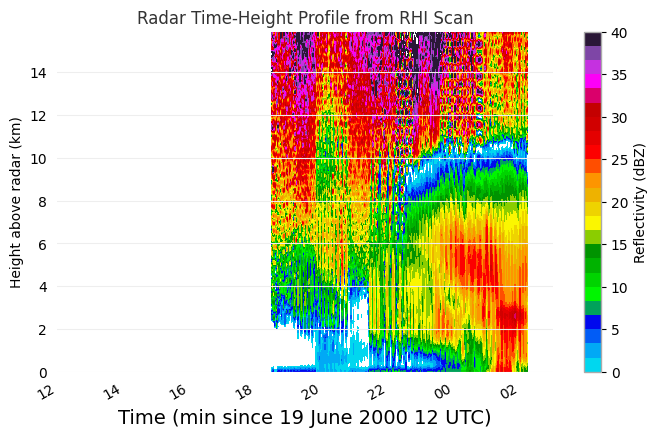

In [27]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter

import matplotlib.dates as mdates
from scipy.ndimage import gaussian_filter1d

#def parse_rhi_filename(filename):
#    import re
#    time_match = re.search(r'cfrad\.(\d{8}_\d{6})\.\d+', filename)
#    if time_match:
#        time_str = time_match.group(1)
#        time = datetime.strptime(time_str, "%Y%m%d_%H%M%S")
#        return time
#    else:
#        return None

def parse_rhi_filename(filename):
    # Regex to match: cfrad.YYYYMMDD_HHMMSS.sss_to
    time_match = re.search(r'cfrad\.(\d{8}_\d{6}\.\d{3})_to', filename)
    if time_match:
        time_str = time_match.group(1)
        # Parse with milliseconds
        time = datetime.strptime(time_str, "%Y%m%d_%H%M%S.%f")
        return time
    else:
        return None
        
def range_elev_to_height(range_m, elev_deg):
    # returns 2D array: (elevation, range)
    elev_rad = np.deg2rad(elev_deg)
    return range_m[None, :] * np.sin(elev_rad[:, None]) / 1000.0



# Get all RHI files
#file_path='/work/bk1415/b382718/output/steps/observations/radar_data/deepa405903/20000619_0620'
#ds_rhi = xr.open_mfdataset(f'{file_path}/cfrad.20000619_234058.267_to_20000619_234107.667_SPOL_RHI.nc');
rhi_files = sorted(glob.glob("/work/bk1415/b382718/output/steps/observations/radar_data/deepa405903/20000619_0620/*RHI.nc"))

height_grid = np.arange(0, 16, 0.1)  # 0 to 16 km, 100 m bins
time_list = []
refl_profiles = []

for file in rhi_files:
    time = parse_rhi_filename(file)
    if time is None:
        continue
    ds = xr.open_dataset(file)
    # Find reflectivity variable
    for var in ['reflectivity', 'DBZ', 'ZH', 'DZ']:
        if var in ds.variables:
            refl = ds[var].values
            break
    else:
        continue
    rng = ds['range'].values  # meters
    elev = ds['elevation'].values  # degrees
    # refl shape: (elevation, range)
    heights = range_elev_to_height(rng, elev)
    # Flatten all (elevation, range) pairs into 1D arrays
    heights_flat = heights.flatten()
    refl_flat = refl.flatten()
    refl_flat[refl_flat <= -10] = np.nan
    # For each height in height_grid, take the max reflectivity from all (elev, range) pairs within 100 m
    refl_at_heights = np.full_like(height_grid, np.nan, dtype=float)
    for i, h in enumerate(height_grid):
        idx = np.where(np.abs(heights_flat - h) < 0.1)[0]
        if len(idx) > 0:
            refl_at_heights[i] = np.nanmean(refl_flat[idx])
    # Optional: smooth the profile (Gaussian filter)
    refl_at_heights = gaussian_filter1d(refl_at_heights, sigma=1, mode='nearest', truncate=2.0)
    time_list.append(time)
    refl_profiles.append(refl_at_heights)
    ds.close()

refl_matrix = np.array(refl_profiles)


# Prepare the grid
ntime, nheight = refl_matrix.shape
T, H = np.meshgrid(np.arange(ntime), height_grid, indexing='ij')  # Use 'ij' indexing!
mask = ~np.isnan(refl_matrix)
points = np.column_stack((T[mask], H[mask]))
values = refl_matrix[mask]


# Define a finer grid for interpolation
fine_time = np.linspace(0, ntime-1, ntime*2)
fine_height = np.linspace(height_grid[0], height_grid[-1], nheight*4)
Fine_T, Fine_H = np.meshgrid(fine_time, fine_height)

# Interpolate
refl_interp = griddata(points, values, (Fine_T, Fine_H), method='nearest')

# Optional: smooth with a Gaussian filter
refl_smooth = gaussian_filter(refl_interp, sigma=2)

# Plot
lev=np.linspace(0,40,25)
fig, ax = plt.subplots(figsize=(8,5))
# Convert fine_time to datetime for x-axis
fine_time_dt = mdates.date2num([time_list[0] + (time_list[-1]-time_list[0]) * t/(ntime-1) for t in fine_time])
pcm = ax.contourf(fine_time_dt, fine_height, refl_smooth, cmap='pyart_NWSRef', levels=lev)#, shading='auto', vmin=0, vmax=60)
ax.set_ylabel("Height above radar (km)")
ax.set_xlabel("UTC Time")
ax.xaxis_date()
fig.autofmt_xdate()
plt.xlabel('Time (min since 19 June 2000 12 UTC)', fontsize=fontsize)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2000, 6, 19, 12, 0) 
end_date = datetime(2000, 6, 20, 3, 0)

plt.xlim(start_date, end_date)
plt.colorbar(pcm, ticks=[0, 5, 10, 15, 20, 25, 30, 35, 40] ,label="Reflectivity (dBZ)")
plt.title("Radar Time-Height Profile from RHI Scan")
plt.show()


[0.03612754 0.03608284 0.03598119 ... 0.04332243 0.04389196 0.0440925 ]


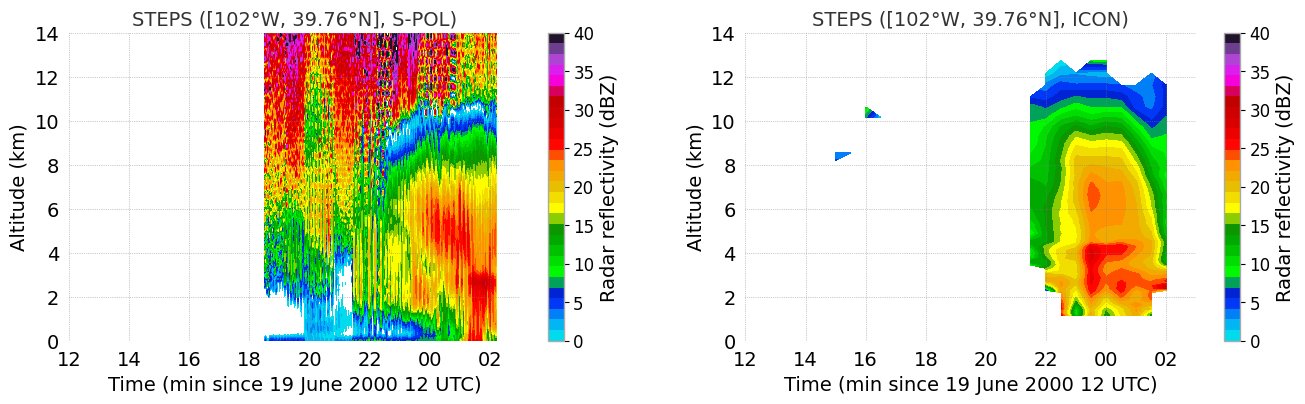

In [30]:
import numpy as np
import pyart

# Convert target coordinates to radians
target_lon_rad = np.deg2rad(-102)
target_lat_rad = np.deg2rad(39.76)

# Extract lon/lat arrays (no parentheses!)
clon = ds_4sip.clon.values
clat = ds_4sip.clat.values

# Define a tolerance (in radians, e.g., ~0.01 rad ≈ 60 km)
tolerance = 0.01

# Find closest cells within the tolerance
distance = np.sqrt((clon - target_lon_rad)**2 + (clat - target_lat_rad)**2)
selected_cells = np.where(distance < tolerance)[0]

print(distance)
# Extract dbz for those cells
dbz_section = ds_4sip['dbz'][:, :, selected_cells]


avg_ht = 1.e-3*ds_4sip.z_mc.mean(dim=('time','ncells'))
avg_refl_sip = dbz_section.where(dbz_section > 0).mean(dim=('ncells'))


######### Plotting
lnwdth = 3
fontsize = 14
lev = np.linspace(0, 40, 30)

plt.figure(figsize=(16, 4))

plt.subplot(1,2,1)
contour = plt.contourf(fine_time_dt, fine_height, refl_smooth, cmap='pyart_NWSRef', levels=lev)
#colorbar = plt.colorbar(contour, ticks=[0, 10, 20, 30, 40, 50, 60, 70], label='Radar reflectivity (dBZ)')
colorbar = plt.colorbar(contour, ticks=[0, 5, 10, 15, 20, 25, 30, 35, 40], label='Radar reflectivity (dBZ)')
colorbar.ax.tick_params(labelsize=12)
colorbar.set_label(label='Radar reflectivity (dBZ)', size=fontsize)

plt.xlabel('Time (min since 19 June 2000 12 UTC)', fontsize=fontsize)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2000, 6, 19, 12, 0) 
end_date = datetime(2000, 6, 20, 3, 0)

plt.xlim(start_date, end_date)

plt.xticks(fontsize=fontsize)

plt.ylim([0, 14])
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14], fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.title('STEPS ([102°W, 39.76°N], S-POL)', fontsize=fontsize)

plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

plt.subplot(1,2,2)
contour = plt.contourf(ds_4sip.time, avg_ht, avg_refl_sip.T, cmap='pyart_NWSRef', levels=lev)
#colorbar = plt.colorbar(contour, ticks=[0, 10, 20, 30, 40, 50, 60, 70], label='Radar reflectivity (dBZ)')
colorbar = plt.colorbar(contour, ticks=[0, 5, 10, 15, 20, 25, 30, 35, 40], label='Radar reflectivity (dBZ)')
colorbar.ax.tick_params(labelsize=12)
colorbar.set_label(label='Radar reflectivity (dBZ)', size=fontsize)

plt.xlabel('Time (min since 19 June 2000 12 UTC)', fontsize=fontsize)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2000, 6, 19, 12, 0) 
end_date = datetime(2000, 6, 20, 3, 0)

plt.xlim(start_date, end_date)

plt.xticks(fontsize=fontsize)

plt.ylim([0, 14])
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14], fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.title('STEPS ([102°W, 39.76°N], ICON)', fontsize=fontsize)

plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.show()

In [26]:

thres_w = 2.;
thres_inc = 1.e-4;

filt_inc_nosip = xr.where((ds_nosip.tqi > thres_inc) & (ds_nosip.w_vel > thres_w), ds_nosip.inc_perl, np.nan);
filt_inc_4sip = xr.where((ds_4sip.tqi > thres_inc) & (ds_4sip.w_vel > thres_w), ds_4sip.inc_perl, np.nan);
filt_inc_nohm = xr.where((ds_nohm.tqi > thres_inc) & (ds_nohm.w_vel > thres_w), ds_nohm.inc_perl, np.nan);
filt_inc_norf = xr.where((ds_norf.tqi > thres_inc) & (ds_norf.w_vel > thres_w), ds_norf.inc_perl, np.nan);
filt_inc_nobr = xr.where((ds_nobr.tqi > thres_inc) & (ds_nobr.w_vel > thres_w), ds_nobr.inc_perl, np.nan);
filt_inc_nosb = xr.where((ds_nosb.tqi > thres_inc) & (ds_nosb.w_vel > thres_w), ds_nosb.inc_perl, np.nan);
avg_tempc = ds_4sip.tempc.mean(dim=('time','ncells'))


mean_inc_up_nosip = filt_inc_nosip.mean(dim=('time','ncells'))
mean_inc_up_4sip = filt_inc_4sip.mean(dim=('time','ncells'))
mean_inc_up_nohm = filt_inc_nohm.mean(dim=('time','ncells'))
mean_inc_up_norf = filt_inc_norf.mean(dim=('time','ncells'))
mean_inc_up_nobr = filt_inc_nobr.mean(dim=('time','ncells'))
mean_inc_up_nosb = filt_inc_nosb.mean(dim=('time','ncells'))

filt_inc_nosip = xr.where((ds_nosip.tqi > thres_inc) & (ds_nosip.w_vel < -1.*thres_w), ds_nosip.inc_perl, np.nan);
filt_inc_4sip = xr.where((ds_4sip.tqi > thres_inc) & (ds_4sip.w_vel < -1.*thres_w), ds_4sip.inc_perl, np.nan);
filt_inc_nohm = xr.where((ds_nohm.tqi > thres_inc) & (ds_nohm.w_vel < -1.*thres_w), ds_nohm.inc_perl, np.nan);
filt_inc_norf = xr.where((ds_norf.tqi > thres_inc) & (ds_norf.w_vel < -1.*thres_w), ds_norf.inc_perl, np.nan);
filt_inc_nobr = xr.where((ds_nobr.tqi > thres_inc) & (ds_nobr.w_vel < -1.*thres_w), ds_nobr.inc_perl, np.nan);
filt_inc_nosb = xr.where((ds_nosb.tqi > thres_inc) & (ds_nosb.w_vel < -1.*thres_w), ds_nosb.inc_perl, np.nan);
avg_tempc = ds_4sip.tempc.mean(dim=('time','ncells'))


mean_inc_dn_nosip = filt_inc_nosip.mean(dim=('time','ncells'))
mean_inc_dn_4sip = filt_inc_4sip.mean(dim=('time','ncells'))
mean_inc_dn_nohm = filt_inc_nohm.mean(dim=('time','ncells'))
mean_inc_dn_norf = filt_inc_norf.mean(dim=('time','ncells'))
mean_inc_dn_nobr = filt_inc_nobr.mean(dim=('time','ncells'))
mean_inc_dn_nosb = filt_inc_nosb.mean(dim=('time','ncells'))


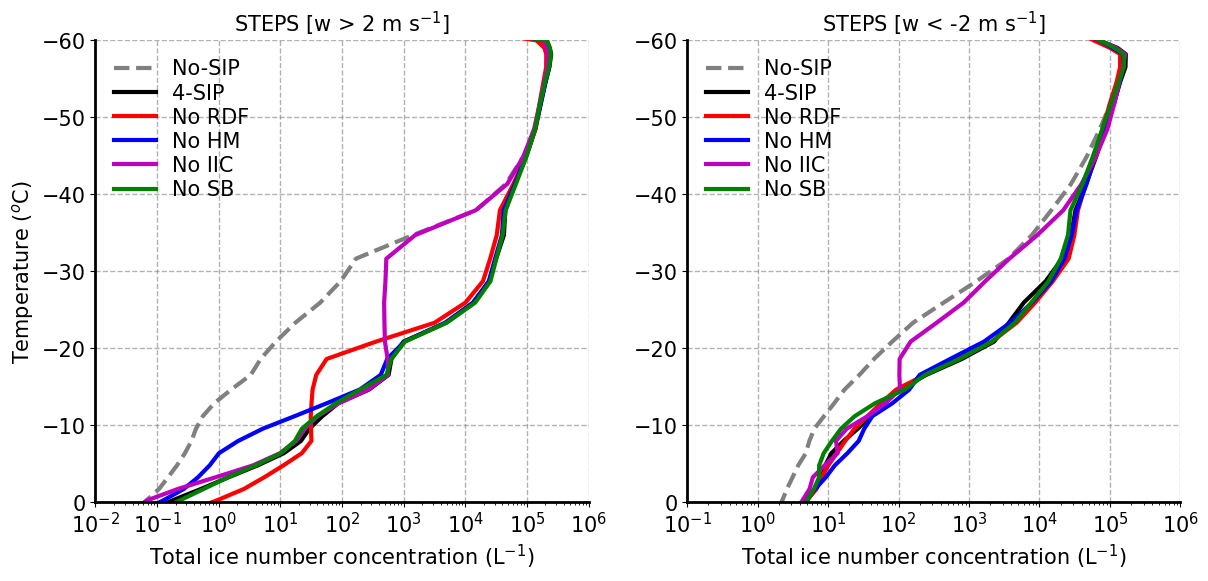

In [29]:

# Plotting
plt.figure(figsize=(14, 6))
deg_faint_errbar = 0.6
lnwdth=3
fontsize=15
plt.subplot(1,2,1)

plt.plot(mean_inc_up_nosip, avg_tempc, '--', color='grey', linewidth=lnwdth, label='No-SIP')
plt.plot(mean_inc_up_4sip, avg_tempc, 'k-', linewidth=lnwdth, label='4-SIP')
plt.plot(mean_inc_up_norf, avg_tempc, 'r-', linewidth=lnwdth, label='No RDF')
plt.plot(mean_inc_up_nohm, avg_tempc, 'b-', linewidth=lnwdth, label='No HM')
plt.plot(mean_inc_up_nobr, avg_tempc, 'm-', linewidth=lnwdth, label='No IIC')
plt.plot(mean_inc_up_nosb, avg_tempc, 'g-', linewidth=lnwdth, label='No SB')

plt.grid(True, linestyle='--', color='grey', linewidth=1, alpha=0.6)
plt.xlim(1.e-2, 1.e6)
plt.xticks([1.e-2, 1.e-1, 1.e0, 1.e1, 1.e2, 1.e3, 1.e4, 1.e5, 1.e6], fontsize=fontsize)
plt.ylim(0, -60)
plt.yticks([0, -10, -20, -30, -40, -50, -60], fontsize=fontsize)
plt.xscale('log')
plt.xlabel('Total ice number concentration (L$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('STEPS [w > 2 m s$^{-1}$]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.2, fontsize=fontsize, loc='best')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

plt.subplot(1,2,2)
plt.plot(mean_inc_dn_nosip, avg_tempc, '--', color='grey', linewidth=lnwdth, label='No-SIP')
plt.plot(mean_inc_dn_4sip, avg_tempc, 'k-', linewidth=lnwdth, label='4-SIP')
plt.plot(mean_inc_dn_norf, avg_tempc, 'r-', linewidth=lnwdth, label='No RDF')
plt.plot(mean_inc_dn_nohm, avg_tempc, 'b-', linewidth=lnwdth, label='No HM')
plt.plot(mean_inc_dn_nobr, avg_tempc, 'm-', linewidth=lnwdth, label='No IIC')
plt.plot(mean_inc_dn_nosb, avg_tempc, 'g-', linewidth=lnwdth, label='No SB')

plt.grid(True, linestyle='--', color='grey', linewidth=1, alpha=0.6)
plt.xlim(1.e-1, 1.e6)
plt.xticks([1.e-1, 1.e0, 1.e1, 1.e2, 1.e3, 1.e4, 1.e5, 1.e6], fontsize=fontsize)
plt.ylim(0, -60)
plt.yticks([0, -10, -20, -30, -40, -50, -60], fontsize=fontsize)
plt.xscale('log')
plt.xlabel('Total ice number concentration (L$^{-1}$)', fontsize=fontsize)
#plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('STEPS [w < -2 m s$^{-1}$]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.2, fontsize=fontsize, loc='best')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

# Show plot
plt.show()


In [40]:

thres_w = 2.;
thres_q = 1.e-9;

filt_nosip = xr.where((ds_nosip.qc > thres_q) & (ds_nosip.w_vel > thres_w), ds_nosip.qc, np.nan);
filt_4sip = xr.where((ds_4sip.qc > thres_q) & (ds_4sip.w_vel > thres_w), ds_4sip.qc, np.nan);
filt_nohm = xr.where((ds_nohm.qc > thres_q) & (ds_nohm.w_vel > thres_w), ds_nohm.qc, np.nan);
filt_norf = xr.where((ds_norf.qc > thres_q) & (ds_norf.w_vel > thres_w), ds_norf.qc, np.nan);
filt_nobr = xr.where((ds_nobr.qc > thres_q) & (ds_nobr.w_vel > thres_w), ds_nobr.qc, np.nan);
filt_nosb = xr.where((ds_nosb.qc > thres_q) & (ds_nosb.w_vel > thres_w), ds_nosb.qc, np.nan);
avg_tempc = ds_4sip.tempc.mean(dim=('time','ncells'))

mean_qc_up_nosip = filt_nosip.mean(dim=('time','ncells'))
mean_qc_up_4sip = filt_4sip.mean(dim=('time','ncells'))
mean_qc_up_nohm = filt_nohm.mean(dim=('time','ncells'))
mean_qc_up_norf = filt_norf.mean(dim=('time','ncells'))
mean_qc_up_nobr = filt_nobr.mean(dim=('time','ncells'))
mean_qc_up_nosb = filt_nosb.mean(dim=('time','ncells'))

filt_nosip = xr.where((ds_nosip.qc > thres_q) & (ds_nosip.w_vel < -1.*thres_w), ds_nosip.qc, np.nan);
filt_4sip = xr.where((ds_4sip.qc > thres_q) & (ds_4sip.w_vel < -1.*thres_w), ds_4sip.qc, np.nan);
filt_nohm = xr.where((ds_nohm.qc > thres_q) & (ds_nohm.w_vel < -1.*thres_w), ds_nohm.qc, np.nan);
filt_norf = xr.where((ds_norf.qc > thres_q) & (ds_norf.w_vel < -1.*thres_w), ds_norf.qc, np.nan);
filt_nobr = xr.where((ds_nobr.qc > thres_q) & (ds_nobr.w_vel < -1.*thres_w), ds_nobr.qc, np.nan);
filt_nosb = xr.where((ds_nosb.qc > thres_q) & (ds_nosb.w_vel < -1.*thres_w), ds_nosb.qc, np.nan);
avg_tempc = ds_4sip.tempc.mean(dim=('time','ncells'))


mean_qc_dn_nosip = filt_nosip.mean(dim=('time','ncells'))
mean_qc_dn_4sip = filt_4sip.mean(dim=('time','ncells'))
mean_qc_dn_nohm = filt_nohm.mean(dim=('time','ncells'))
mean_qc_dn_norf = filt_norf.mean(dim=('time','ncells'))
mean_qc_dn_nobr = filt_nobr.mean(dim=('time','ncells'))
mean_qc_dn_nosb = filt_nosb.mean(dim=('time','ncells'))


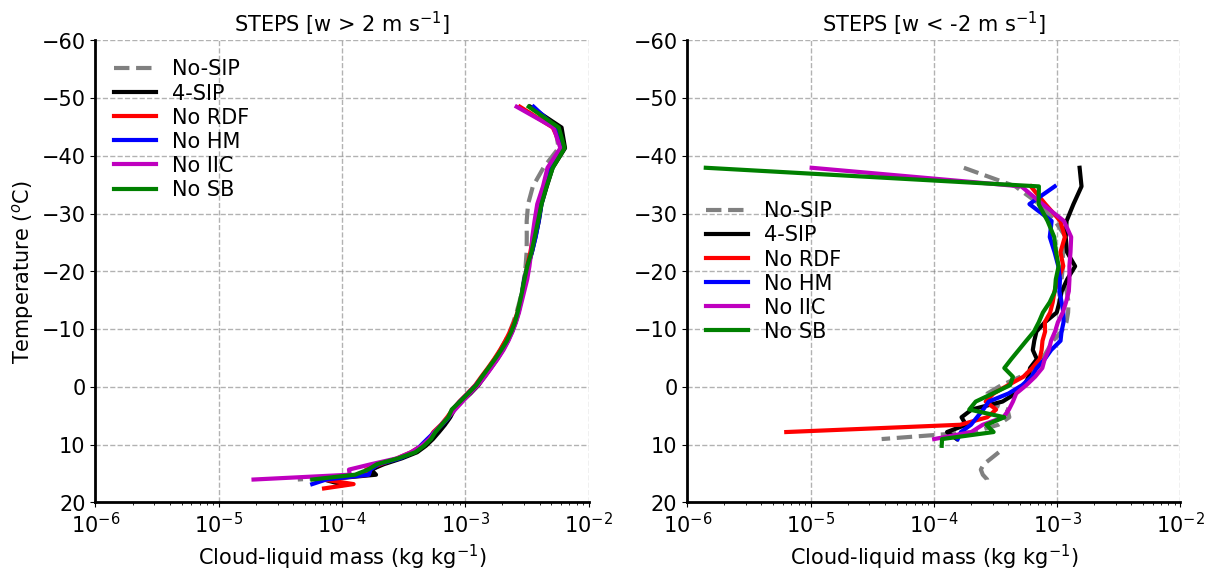

In [41]:

# Plotting
plt.figure(figsize=(14, 6))
deg_faint_errbar = 0.6
lnwdth=3
fontsize=15
plt.subplot(1,2,1)

plt.plot(mean_qc_up_nosip, avg_tempc, '--', color='grey', linewidth=lnwdth, label='No-SIP')
plt.plot(mean_qc_up_4sip, avg_tempc, 'k-', linewidth=lnwdth, label='4-SIP')
plt.plot(mean_qc_up_norf, avg_tempc, 'r-', linewidth=lnwdth, label='No RDF')
plt.plot(mean_qc_up_nohm, avg_tempc, 'b-', linewidth=lnwdth, label='No HM')
plt.plot(mean_qc_up_nobr, avg_tempc, 'm-', linewidth=lnwdth, label='No IIC')
plt.plot(mean_qc_up_nosb, avg_tempc, 'g-', linewidth=lnwdth, label='No SB')

plt.grid(True, linestyle='--', color='grey', linewidth=1, alpha=0.6)
plt.xlim(1.e-6, 1.e-2)
plt.xticks([1.e-6, 1.e-5, 1.e-4, 1.e-3, 1.e-2], fontsize=fontsize)
plt.ylim(20, -60)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60], fontsize=fontsize)
plt.xscale('log')
plt.xlabel('Cloud-liquid mass (kg kg$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('STEPS [w > 2 m s$^{-1}$]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.2, fontsize=fontsize, loc='best')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

plt.subplot(1,2,2)
plt.plot(mean_qc_dn_nosip, avg_tempc, '--', color='grey', linewidth=lnwdth, label='No-SIP')
plt.plot(mean_qc_dn_4sip, avg_tempc, 'k-', linewidth=lnwdth, label='4-SIP')
plt.plot(mean_qc_dn_norf, avg_tempc, 'r-', linewidth=lnwdth, label='No RDF')
plt.plot(mean_qc_dn_nohm, avg_tempc, 'b-', linewidth=lnwdth, label='No HM')
plt.plot(mean_qc_dn_nobr, avg_tempc, 'm-', linewidth=lnwdth, label='No IIC')
plt.plot(mean_qc_dn_nosb, avg_tempc, 'g-', linewidth=lnwdth, label='No SB')

plt.grid(True, linestyle='--', color='grey', linewidth=1, alpha=0.6)
plt.xlim(1.e-6, 1.e-2)
plt.xticks([1.e-6, 1.e-5, 1.e-4, 1.e-3, 1.e-2], fontsize=fontsize)
plt.ylim(20, -60)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60], fontsize=fontsize)
plt.xscale('log')
plt.xlabel('Cloud-liquid mass (kg kg$^{-1}$)', fontsize=fontsize)
#plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('STEPS [w < -2 m s$^{-1}$]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.2, fontsize=fontsize, loc='best')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

# Show plot
plt.show()


In [30]:

thres_w = 2.;
thres_q = 1.e-9;

filt_nosip = xr.where((ds_nosip.qr > thres_q) & (ds_nosip.w_vel > thres_w), ds_nosip.qr, np.nan);
filt_4sip = xr.where((ds_4sip.qr > thres_q) & (ds_4sip.w_vel > thres_w), ds_4sip.qr, np.nan);
filt_nohm = xr.where((ds_nohm.qr > thres_q) & (ds_nohm.w_vel > thres_w), ds_nohm.qr, np.nan);
filt_norf = xr.where((ds_norf.qr > thres_q) & (ds_norf.w_vel > thres_w), ds_norf.qr, np.nan);
filt_nobr = xr.where((ds_nobr.qr > thres_q) & (ds_nobr.w_vel > thres_w), ds_nobr.qr, np.nan);
filt_nosb = xr.where((ds_nosb.qr > thres_q) & (ds_nosb.w_vel > thres_w), ds_nosb.qr, np.nan);
avg_tempc = ds_4sip.tempc.mean(dim=('time','ncells'))

mean_qr_up_nosip = filt_nosip.mean(dim=('time','ncells'))
mean_qr_up_4sip = filt_4sip.mean(dim=('time','ncells'))
mean_qr_up_nohm = filt_nohm.mean(dim=('time','ncells'))
mean_qr_up_norf = filt_norf.mean(dim=('time','ncells'))
mean_qr_up_nobr = filt_nobr.mean(dim=('time','ncells'))
mean_qr_up_nosb = filt_nosb.mean(dim=('time','ncells'))

filt_nosip = xr.where((ds_nosip.qr > thres_q) & (ds_nosip.w_vel < -1.*thres_w), ds_nosip.qr, np.nan);
filt_4sip = xr.where((ds_4sip.qr > thres_q) & (ds_4sip.w_vel < -1.*thres_w), ds_4sip.qr, np.nan);
filt_nohm = xr.where((ds_nohm.qr > thres_q) & (ds_nohm.w_vel < -1.*thres_w), ds_nohm.qr, np.nan);
filt_norf = xr.where((ds_norf.qr > thres_q) & (ds_norf.w_vel < -1.*thres_w), ds_norf.qr, np.nan);
filt_nobr = xr.where((ds_nobr.qr > thres_q) & (ds_nobr.w_vel < -1.*thres_w), ds_nobr.qr, np.nan);
filt_nosb = xr.where((ds_nosb.qr > thres_q) & (ds_nosb.w_vel < -1.*thres_w), ds_nosb.qr, np.nan);
avg_tempc = ds_4sip.tempc.mean(dim=('time','ncells'))


mean_qr_dn_nosip = filt_nosip.mean(dim=('time','ncells'))
mean_qr_dn_4sip = filt_4sip.mean(dim=('time','ncells'))
mean_qr_dn_nohm = filt_nohm.mean(dim=('time','ncells'))
mean_qr_dn_norf = filt_norf.mean(dim=('time','ncells'))
mean_qr_dn_nobr = filt_nobr.mean(dim=('time','ncells'))
mean_qr_dn_nosb = filt_nosb.mean(dim=('time','ncells'))


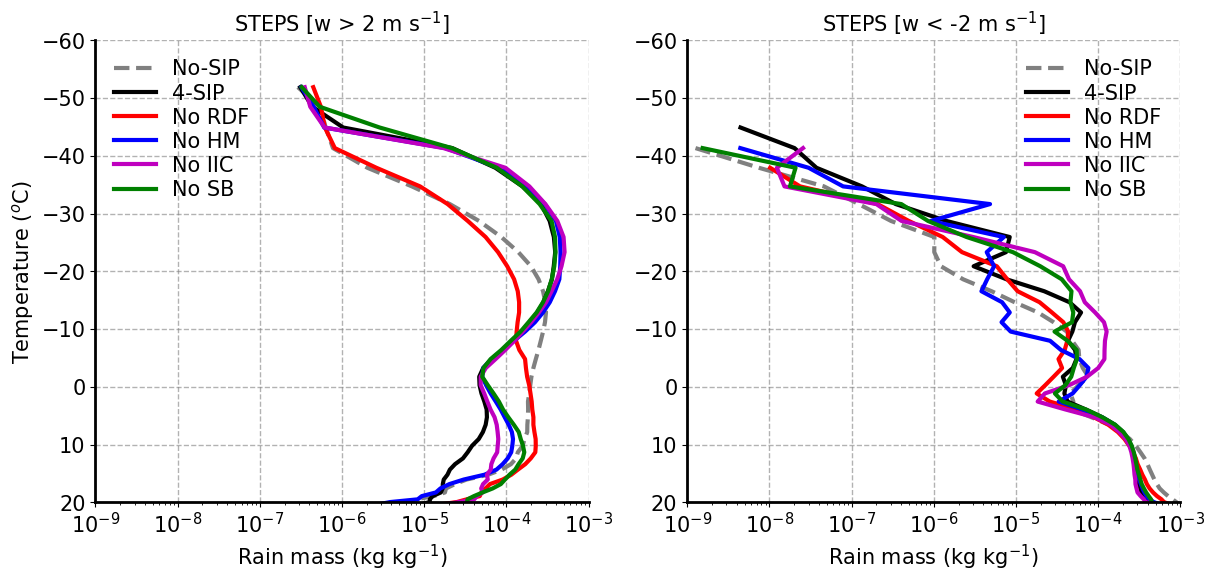

In [33]:

# Plotting
plt.figure(figsize=(14, 6))
deg_faint_errbar = 0.6
lnwdth=3
fontsize=15
plt.subplot(1,2,1)

plt.plot(mean_qr_up_nosip, avg_tempc, '--', color='grey', linewidth=lnwdth, label='No-SIP')
plt.plot(mean_qr_up_4sip, avg_tempc, 'k-', linewidth=lnwdth, label='4-SIP')
plt.plot(mean_qr_up_norf, avg_tempc, 'r-', linewidth=lnwdth, label='No RDF')
plt.plot(mean_qr_up_nohm, avg_tempc, 'b-', linewidth=lnwdth, label='No HM')
plt.plot(mean_qr_up_nobr, avg_tempc, 'm-', linewidth=lnwdth, label='No IIC')
plt.plot(mean_qr_up_nosb, avg_tempc, 'g-', linewidth=lnwdth, label='No SB')

plt.grid(True, linestyle='--', color='grey', linewidth=1, alpha=0.6)
plt.xlim(1.e-9, 1.e-3)
plt.xticks([1.e-9, 1.e-8, 1.e-7, 1.e-6, 1.e-5, 1.e-4, 1.e-3], fontsize=fontsize)
plt.ylim(20, -60)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60], fontsize=fontsize)
plt.xscale('log')
plt.xlabel('Rain mass (kg kg$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('STEPS [w > 2 m s$^{-1}$]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.2, fontsize=fontsize, loc='best')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

plt.subplot(1,2,2)
plt.plot(mean_qr_dn_nosip, avg_tempc, '--', color='grey', linewidth=lnwdth, label='No-SIP')
plt.plot(mean_qr_dn_4sip, avg_tempc, 'k-', linewidth=lnwdth, label='4-SIP')
plt.plot(mean_qr_dn_norf, avg_tempc, 'r-', linewidth=lnwdth, label='No RDF')
plt.plot(mean_qr_dn_nohm, avg_tempc, 'b-', linewidth=lnwdth, label='No HM')
plt.plot(mean_qr_dn_nobr, avg_tempc, 'm-', linewidth=lnwdth, label='No IIC')
plt.plot(mean_qr_dn_nosb, avg_tempc, 'g-', linewidth=lnwdth, label='No SB')

plt.grid(True, linestyle='--', color='grey', linewidth=1, alpha=0.6)
plt.xlim(1.e-9, 1.e-3)
plt.xticks([1.e-9, 1.e-8, 1.e-7, 1.e-6, 1.e-5, 1.e-4, 1.e-3], fontsize=fontsize)
plt.ylim(20, -60)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60], fontsize=fontsize)
plt.xscale('log')
plt.xlabel('Rain mass (kg kg$^{-1}$)', fontsize=fontsize)
#plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('STEPS [w < -2 m s$^{-1}$]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.2, fontsize=fontsize, loc='best')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

# Show plot
plt.show()


In [34]:

thres_w = 2.;
thres_q = 1.e-9;

filt_nosip = xr.where((ds_nosip.qi > thres_q) & (ds_nosip.w_vel > thres_w), ds_nosip.qi, np.nan);
filt_4sip = xr.where((ds_4sip.qi > thres_q) & (ds_4sip.w_vel > thres_w), ds_4sip.qi, np.nan);
filt_nohm = xr.where((ds_nohm.qi > thres_q) & (ds_nohm.w_vel > thres_w), ds_nohm.qi, np.nan);
filt_norf = xr.where((ds_norf.qi > thres_q) & (ds_norf.w_vel > thres_w), ds_norf.qi, np.nan);
filt_nobr = xr.where((ds_nobr.qi > thres_q) & (ds_nobr.w_vel > thres_w), ds_nobr.qi, np.nan);
filt_nosb = xr.where((ds_nosb.qi > thres_q) & (ds_nosb.w_vel > thres_w), ds_nosb.qi, np.nan);
avg_tempc = ds_4sip.tempc.mean(dim=('time','ncells'))

mean_qi_up_nosip = filt_nosip.mean(dim=('time','ncells'))
mean_qi_up_4sip = filt_4sip.mean(dim=('time','ncells'))
mean_qi_up_nohm = filt_nohm.mean(dim=('time','ncells'))
mean_qi_up_norf = filt_norf.mean(dim=('time','ncells'))
mean_qi_up_nobr = filt_nobr.mean(dim=('time','ncells'))
mean_qi_up_nosb = filt_nosb.mean(dim=('time','ncells'))

filt_nosip = xr.where((ds_nosip.qi > thres_q) & (ds_nosip.w_vel < -1.*thres_w), ds_nosip.qi, np.nan);
filt_4sip = xr.where((ds_4sip.qi > thres_q) & (ds_4sip.w_vel < -1.*thres_w), ds_4sip.qi, np.nan);
filt_nohm = xr.where((ds_nohm.qi > thres_q) & (ds_nohm.w_vel < -1.*thres_w), ds_nohm.qi, np.nan);
filt_norf = xr.where((ds_norf.qi > thres_q) & (ds_norf.w_vel < -1.*thres_w), ds_norf.qi, np.nan);
filt_nobr = xr.where((ds_nobr.qi > thres_q) & (ds_nobr.w_vel < -1.*thres_w), ds_nobr.qi, np.nan);
filt_nosb = xr.where((ds_nosb.qi > thres_q) & (ds_nosb.w_vel < -1.*thres_w), ds_nosb.qi, np.nan);
avg_tempc = ds_4sip.tempc.mean(dim=('time','ncells'))

mean_qi_dn_nosip = filt_nosip.mean(dim=('time','ncells'))
mean_qi_dn_4sip = filt_4sip.mean(dim=('time','ncells'))
mean_qi_dn_nohm = filt_nohm.mean(dim=('time','ncells'))
mean_qi_dn_norf = filt_norf.mean(dim=('time','ncells'))
mean_qi_dn_nobr = filt_nobr.mean(dim=('time','ncells'))
mean_qi_dn_nosb = filt_nosb.mean(dim=('time','ncells'))


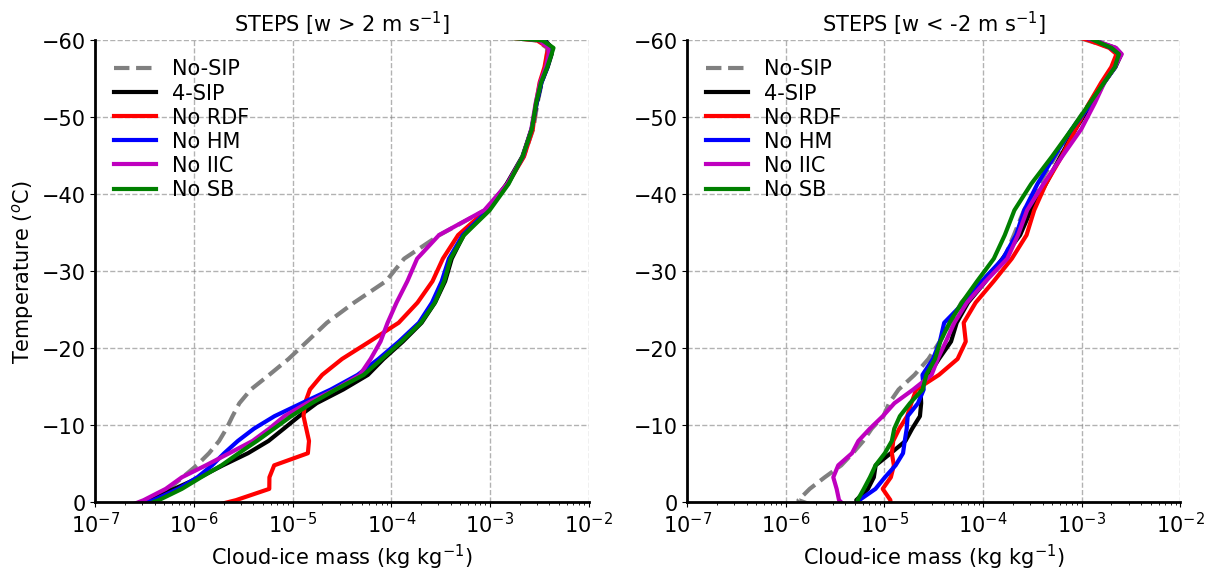

In [42]:

# Plotting
plt.figure(figsize=(14, 6))
deg_faint_errbar = 0.6
lnwdth=3
fontsize=15
plt.subplot(1,2,1)

plt.plot(mean_qi_up_nosip, avg_tempc, '--', color='grey', linewidth=lnwdth, label='No-SIP')
plt.plot(mean_qi_up_4sip, avg_tempc, 'k-', linewidth=lnwdth, label='4-SIP')
plt.plot(mean_qi_up_norf, avg_tempc, 'r-', linewidth=lnwdth, label='No RDF')
plt.plot(mean_qi_up_nohm, avg_tempc, 'b-', linewidth=lnwdth, label='No HM')
plt.plot(mean_qi_up_nobr, avg_tempc, 'm-', linewidth=lnwdth, label='No IIC')
plt.plot(mean_qi_up_nosb, avg_tempc, 'g-', linewidth=lnwdth, label='No SB')

plt.grid(True, linestyle='--', color='grey', linewidth=1, alpha=0.6)
plt.xlim(1.e-7, 1.e-2)
plt.xticks([1.e-7, 1.e-6, 1.e-5, 1.e-4, 1.e-3, 1.e-2], fontsize=fontsize)
plt.ylim(0, -60)
plt.yticks([0, -10, -20, -30, -40, -50, -60], fontsize=fontsize)
plt.xscale('log')
plt.xlabel('Cloud-ice mass (kg kg$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('STEPS [w > 2 m s$^{-1}$]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.2, fontsize=fontsize, loc='upper left')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

plt.subplot(1,2,2)
plt.plot(mean_qi_dn_nosip, avg_tempc, '--', color='grey', linewidth=lnwdth, label='No-SIP')
plt.plot(mean_qi_dn_4sip, avg_tempc, 'k-', linewidth=lnwdth, label='4-SIP')
plt.plot(mean_qi_dn_norf, avg_tempc, 'r-', linewidth=lnwdth, label='No RDF')
plt.plot(mean_qi_dn_nohm, avg_tempc, 'b-', linewidth=lnwdth, label='No HM')
plt.plot(mean_qi_dn_nobr, avg_tempc, 'm-', linewidth=lnwdth, label='No IIC')
plt.plot(mean_qi_dn_nosb, avg_tempc, 'g-', linewidth=lnwdth, label='No SB')

plt.grid(True, linestyle='--', color='grey', linewidth=1, alpha=0.6)
plt.xlim(1.e-7, 1.e-2)
plt.xticks([1.e-7, 1.e-6, 1.e-5, 1.e-4, 1.e-3, 1.e-2], fontsize=fontsize)
plt.ylim(0, -60)
plt.yticks([0, -10, -20, -30, -40, -50, -60], fontsize=fontsize)
plt.xscale('log')
plt.xlabel('Cloud-ice mass (kg kg$^{-1}$)', fontsize=fontsize)
#plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('STEPS [w < -2 m s$^{-1}$]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.2, fontsize=fontsize, loc='upper left')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

# Show plot
plt.show()


In [43]:

thres_w = 2.;
thres_q = 1.e-9;

filt_nosip = xr.where((ds_nosip.qs > thres_q) & (ds_nosip.w_vel > thres_w), ds_nosip.qs, np.nan);
filt_4sip = xr.where((ds_4sip.qs > thres_q) & (ds_4sip.w_vel > thres_w), ds_4sip.qs, np.nan);
filt_nohm = xr.where((ds_nohm.qs > thres_q) & (ds_nohm.w_vel > thres_w), ds_nohm.qs, np.nan);
filt_norf = xr.where((ds_norf.qs > thres_q) & (ds_norf.w_vel > thres_w), ds_norf.qs, np.nan);
filt_nobr = xr.where((ds_nobr.qs > thres_q) & (ds_nobr.w_vel > thres_w), ds_nobr.qs, np.nan);
filt_nosb = xr.where((ds_nosb.qs > thres_q) & (ds_nosb.w_vel > thres_w), ds_nosb.qs, np.nan);
avg_tempc = ds_4sip.tempc.mean(dim=('time','ncells'))

mean_qs_up_nosip = filt_nosip.mean(dim=('time','ncells'))
mean_qs_up_4sip = filt_4sip.mean(dim=('time','ncells'))
mean_qs_up_nohm = filt_nohm.mean(dim=('time','ncells'))
mean_qs_up_norf = filt_norf.mean(dim=('time','ncells'))
mean_qs_up_nobr = filt_nobr.mean(dim=('time','ncells'))
mean_qs_up_nosb = filt_nosb.mean(dim=('time','ncells'))

filt_nosip = xr.where((ds_nosip.qs > thres_q) & (ds_nosip.w_vel < -1.*thres_w), ds_nosip.qs, np.nan);
filt_4sip = xr.where((ds_4sip.qs > thres_q) & (ds_4sip.w_vel < -1.*thres_w), ds_4sip.qs, np.nan);
filt_nohm = xr.where((ds_nohm.qs > thres_q) & (ds_nohm.w_vel < -1.*thres_w), ds_nohm.qs, np.nan);
filt_norf = xr.where((ds_norf.qs > thres_q) & (ds_norf.w_vel < -1.*thres_w), ds_norf.qs, np.nan);
filt_nobr = xr.where((ds_nobr.qs > thres_q) & (ds_nobr.w_vel < -1.*thres_w), ds_nobr.qs, np.nan);
filt_nosb = xr.where((ds_nosb.qs > thres_q) & (ds_nosb.w_vel < -1.*thres_w), ds_nosb.qs, np.nan);
avg_tempc = ds_4sip.tempc.mean(dim=('time','ncells'))

mean_qs_dn_nosip = filt_nosip.mean(dim=('time','ncells'))
mean_qs_dn_4sip = filt_4sip.mean(dim=('time','ncells'))
mean_qs_dn_nohm = filt_nohm.mean(dim=('time','ncells'))
mean_qs_dn_norf = filt_norf.mean(dim=('time','ncells'))
mean_qs_dn_nobr = filt_nobr.mean(dim=('time','ncells'))
mean_qs_dn_nosb = filt_nosb.mean(dim=('time','ncells'))


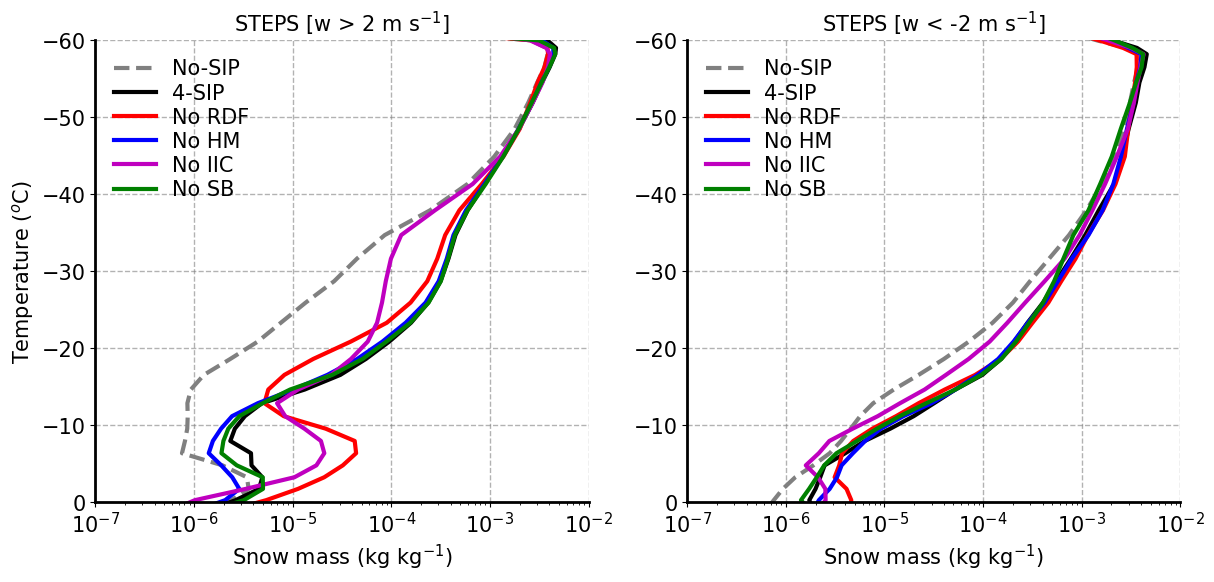

In [46]:

# Plotting
plt.figure(figsize=(14, 6))
deg_faint_errbar = 0.6
lnwdth=3
fontsize=15
plt.subplot(1,2,1)

plt.plot(mean_qs_up_nosip, avg_tempc, '--', color='grey', linewidth=lnwdth, label='No-SIP')
plt.plot(mean_qs_up_4sip, avg_tempc, 'k-', linewidth=lnwdth, label='4-SIP')
plt.plot(mean_qs_up_norf, avg_tempc, 'r-', linewidth=lnwdth, label='No RDF')
plt.plot(mean_qs_up_nohm, avg_tempc, 'b-', linewidth=lnwdth, label='No HM')
plt.plot(mean_qs_up_nobr, avg_tempc, 'm-', linewidth=lnwdth, label='No IIC')
plt.plot(mean_qs_up_nosb, avg_tempc, 'g-', linewidth=lnwdth, label='No SB')

plt.grid(True, linestyle='--', color='grey', linewidth=1, alpha=0.6)
plt.xlim(1.e-7, 1.e-2)
plt.xticks([1.e-7, 1.e-6, 1.e-5, 1.e-4, 1.e-3, 1.e-2], fontsize=fontsize)
plt.ylim(0, -60)
plt.yticks([0, -10, -20, -30, -40, -50, -60], fontsize=fontsize)
plt.xscale('log')
plt.xlabel('Snow mass (kg kg$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('STEPS [w > 2 m s$^{-1}$]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.2, fontsize=fontsize, loc='upper left')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

plt.subplot(1,2,2)
plt.plot(mean_qs_dn_nosip, avg_tempc, '--', color='grey', linewidth=lnwdth, label='No-SIP')
plt.plot(mean_qs_dn_4sip, avg_tempc, 'k-', linewidth=lnwdth, label='4-SIP')
plt.plot(mean_qs_dn_norf, avg_tempc, 'r-', linewidth=lnwdth, label='No RDF')
plt.plot(mean_qs_dn_nohm, avg_tempc, 'b-', linewidth=lnwdth, label='No HM')
plt.plot(mean_qs_dn_nobr, avg_tempc, 'm-', linewidth=lnwdth, label='No IIC')
plt.plot(mean_qs_dn_nosb, avg_tempc, 'g-', linewidth=lnwdth, label='No SB')

plt.grid(True, linestyle='--', color='grey', linewidth=1, alpha=0.6)
plt.xlim(1.e-7, 1.e-2)
plt.xticks([1.e-7, 1.e-6, 1.e-5, 1.e-4, 1.e-3, 1.e-2], fontsize=fontsize)
plt.ylim(0, -60)
plt.yticks([0, -10, -20, -30, -40, -50, -60], fontsize=fontsize)
plt.xscale('log')
plt.xlabel('Snow mass (kg kg$^{-1}$)', fontsize=fontsize)
#plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('STEPS [w < -2 m s$^{-1}$]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.2, fontsize=fontsize, loc='upper left')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

# Show plot
plt.show()


In [47]:

thres_w = 2.;
thres_q = 1.e-9;

filt_nosip = xr.where((ds_nosip.qg > thres_q) & (ds_nosip.w_vel > thres_w), ds_nosip.qg, np.nan);
filt_4sip = xr.where((ds_4sip.qg > thres_q) & (ds_4sip.w_vel > thres_w), ds_4sip.qg, np.nan);
filt_nohm = xr.where((ds_nohm.qg > thres_q) & (ds_nohm.w_vel > thres_w), ds_nohm.qg, np.nan);
filt_norf = xr.where((ds_norf.qg > thres_q) & (ds_norf.w_vel > thres_w), ds_norf.qg, np.nan);
filt_nobr = xr.where((ds_nobr.qg > thres_q) & (ds_nobr.w_vel > thres_w), ds_nobr.qg, np.nan);
filt_nosb = xr.where((ds_nosb.qg > thres_q) & (ds_nosb.w_vel > thres_w), ds_nosb.qg, np.nan);
avg_tempc = ds_4sip.tempc.mean(dim=('time','ncells'))

mean_qg_up_nosip = filt_nosip.mean(dim=('time','ncells'))
mean_qg_up_4sip = filt_4sip.mean(dim=('time','ncells'))
mean_qg_up_nohm = filt_nohm.mean(dim=('time','ncells'))
mean_qg_up_norf = filt_norf.mean(dim=('time','ncells'))
mean_qg_up_nobr = filt_nobr.mean(dim=('time','ncells'))
mean_qg_up_nosb = filt_nosb.mean(dim=('time','ncells'))

filt_nosip = xr.where((ds_nosip.qg > thres_q) & (ds_nosip.w_vel < -1.*thres_w), ds_nosip.qg, np.nan);
filt_4sip = xr.where((ds_4sip.qg > thres_q) & (ds_4sip.w_vel < -1.*thres_w), ds_4sip.qg, np.nan);
filt_nohm = xr.where((ds_nohm.qg > thres_q) & (ds_nohm.w_vel < -1.*thres_w), ds_nohm.qg, np.nan);
filt_norf = xr.where((ds_norf.qg > thres_q) & (ds_norf.w_vel < -1.*thres_w), ds_norf.qg, np.nan);
filt_nobr = xr.where((ds_nobr.qg > thres_q) & (ds_nobr.w_vel < -1.*thres_w), ds_nobr.qg, np.nan);
filt_nosb = xr.where((ds_nosb.qg > thres_q) & (ds_nosb.w_vel < -1.*thres_w), ds_nosb.qg, np.nan);
avg_tempc = ds_4sip.tempc.mean(dim=('time','ncells'))

mean_qg_dn_nosip = filt_nosip.mean(dim=('time','ncells'))
mean_qg_dn_4sip = filt_4sip.mean(dim=('time','ncells'))
mean_qg_dn_nohm = filt_nohm.mean(dim=('time','ncells'))
mean_qg_dn_norf = filt_norf.mean(dim=('time','ncells'))
mean_qg_dn_nobr = filt_nobr.mean(dim=('time','ncells'))
mean_qg_dn_nosb = filt_nosb.mean(dim=('time','ncells'))


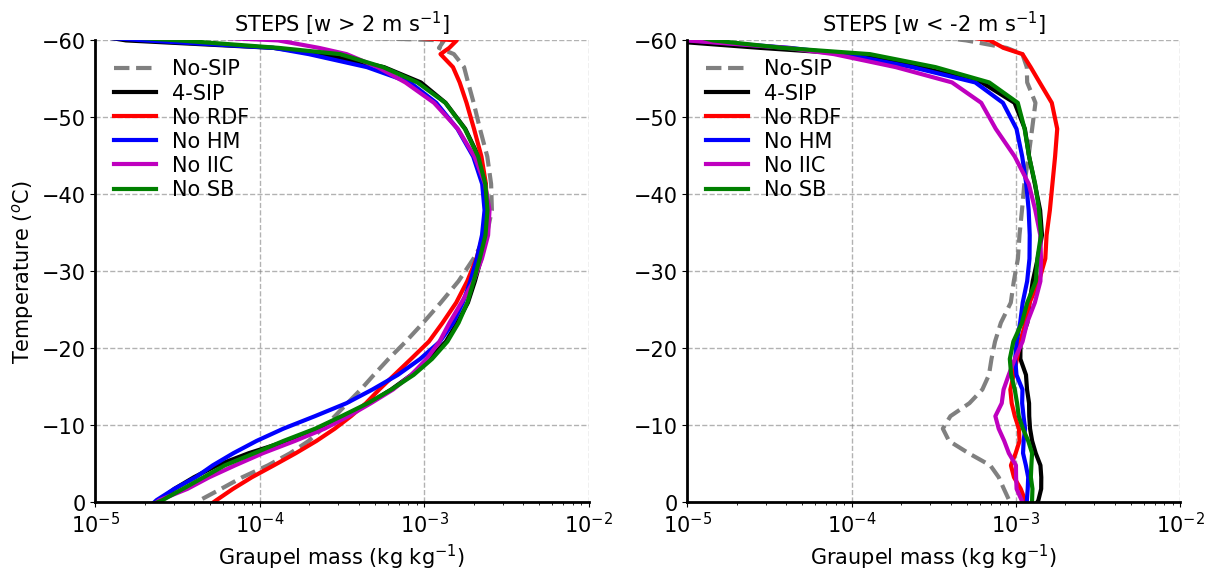

In [49]:

# Plotting
plt.figure(figsize=(14, 6))
deg_faint_errbar = 0.6
lnwdth=3
fontsize=15
plt.subplot(1,2,1)

plt.plot(mean_qg_up_nosip, avg_tempc, '--', color='grey', linewidth=lnwdth, label='No-SIP')
plt.plot(mean_qg_up_4sip, avg_tempc, 'k-', linewidth=lnwdth, label='4-SIP')
plt.plot(mean_qg_up_norf, avg_tempc, 'r-', linewidth=lnwdth, label='No RDF')
plt.plot(mean_qg_up_nohm, avg_tempc, 'b-', linewidth=lnwdth, label='No HM')
plt.plot(mean_qg_up_nobr, avg_tempc, 'm-', linewidth=lnwdth, label='No IIC')
plt.plot(mean_qg_up_nosb, avg_tempc, 'g-', linewidth=lnwdth, label='No SB')

plt.grid(True, linestyle='--', color='grey', linewidth=1, alpha=0.6)
plt.xlim(1.e-5, 1.e-2)
plt.xticks([1.e-5, 1.e-4, 1.e-3, 1.e-2], fontsize=fontsize)
plt.ylim(0, -60)
plt.yticks([0, -10, -20, -30, -40, -50, -60], fontsize=fontsize)
plt.xscale('log')
plt.xlabel('Graupel mass (kg kg$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('STEPS [w > 2 m s$^{-1}$]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.2, fontsize=fontsize, loc='upper left')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

plt.subplot(1,2,2)
plt.plot(mean_qg_dn_nosip, avg_tempc, '--', color='grey', linewidth=lnwdth, label='No-SIP')
plt.plot(mean_qg_dn_4sip, avg_tempc, 'k-', linewidth=lnwdth, label='4-SIP')
plt.plot(mean_qg_dn_norf, avg_tempc, 'r-', linewidth=lnwdth, label='No RDF')
plt.plot(mean_qg_dn_nohm, avg_tempc, 'b-', linewidth=lnwdth, label='No HM')
plt.plot(mean_qg_dn_nobr, avg_tempc, 'm-', linewidth=lnwdth, label='No IIC')
plt.plot(mean_qg_dn_nosb, avg_tempc, 'g-', linewidth=lnwdth, label='No SB')

plt.grid(True, linestyle='--', color='grey', linewidth=1, alpha=0.6)
plt.xlim(1.e-5, 1.e-2)
plt.xticks([1.e-5, 1.e-4, 1.e-3, 1.e-2], fontsize=fontsize)
plt.ylim(0, -60)
plt.yticks([0, -10, -20, -30, -40, -50, -60], fontsize=fontsize)
plt.xscale('log')
plt.xlabel('Graupel mass (kg kg$^{-1}$)', fontsize=fontsize)
#plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('STEPS [w < -2 m s$^{-1}$]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.2, fontsize=fontsize, loc='upper left')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

# Show plot
plt.show()


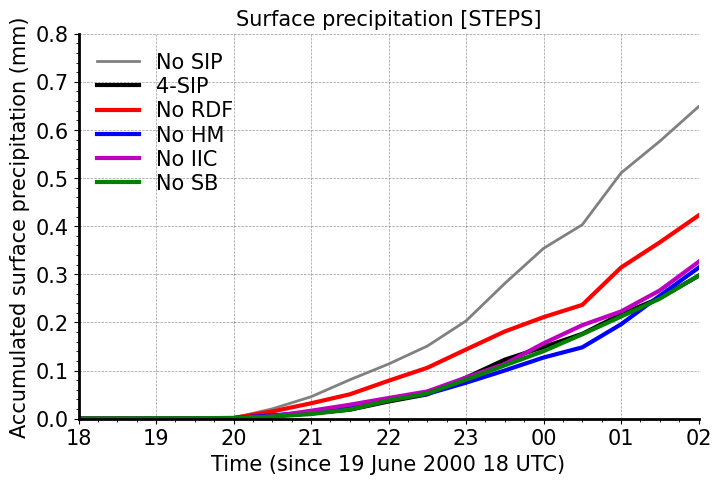

In [59]:

acc_precip_nosip = ds_nosip.tot_prec.mean('ncells')
acc_precip_4sip = ds_4sip.tot_prec.mean('ncells')
acc_precip_nohm = ds_nohm.tot_prec.mean('ncells')
acc_precip_nobr = ds_nobr.tot_prec.mean('ncells')
acc_precip_norf = ds_norf.tot_prec.mean('ncells')
acc_precip_nosb = ds_nosb.tot_prec.mean('ncells')

fontsize=15
linwdth = 3.
plt.figure(figsize=(8, 5))
plt.plot(ds_nosip.time, acc_precip_nosip, "-", color='grey', label="No SIP", linewidth = 2)
plt.plot(ds_4sip.time, acc_precip_4sip, "k-", label="4-SIP", linewidth = linwdth)
plt.plot(ds_norf.time, acc_precip_norf, "r-", label="No RDF", linewidth = linwdth)
plt.plot(ds_nohm.time, acc_precip_nohm, "b-", label="No HM", linewidth = linwdth)
plt.plot(ds_nobr.time, acc_precip_nobr, "m-", label="No IIC", linewidth = linwdth)
plt.plot(ds_nosb.time, acc_precip_nosb, "g-", label="No SB", linewidth = linwdth)

plt.grid(True, linestyle='--', color='grey', linewidth=0.5, alpha=0.8)
plt.minorticks_on()
plt.ylim(0, 0.8)
plt.xlabel('Time (since 19 June 2000 18 UTC)', fontsize=fontsize)
plt.ylabel('Accumulated surface precipitation (mm)', fontsize=fontsize)
start_date = datetime(2000, 6, 19, 18, 0)  # Start at 00 UTC on 10 May 2011
end_date = datetime(2000, 6, 20, 2, 0)
plt.xlim(start_date, end_date)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title('Surface precipitation [STEPS]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.2, fontsize=fontsize, loc='upper left')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.show()


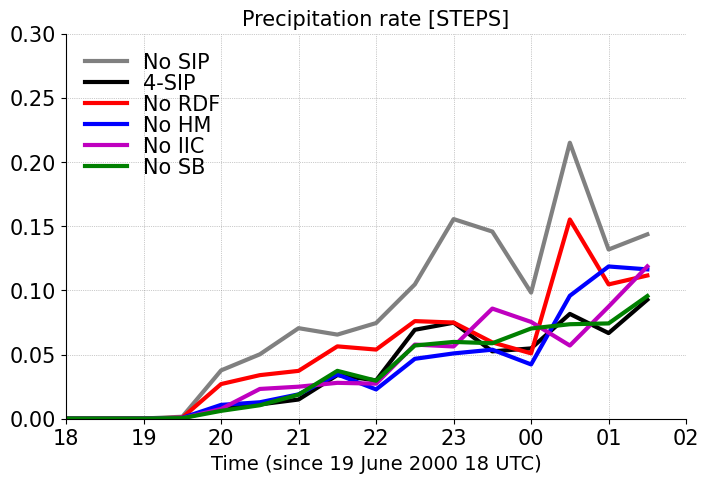

In [61]:

ds_nosb.tot_prec

del_prec_nosip = ds_nosip.tot_prec.diff('time')
del_prec_4sip = ds_4sip.tot_prec.diff('time')
del_prec_norf = ds_norf.tot_prec.diff('time')
del_prec_nohm = ds_nohm.tot_prec.diff('time')
del_prec_nobr = ds_nobr.tot_prec.diff('time')
del_prec_nosb = ds_nosb.tot_prec.diff('time')

precip_rate_nosip = del_prec_nosip/0.5
precip_rate_4sip = del_prec_4sip/0.5
precip_rate_norf = del_prec_norf/0.5            # output is over 30 min
precip_rate_nohm = del_prec_nohm/0.5
precip_rate_nobr = del_prec_nobr/0.5
precip_rate_nosb = del_prec_nosb/0.5


fontsize=15;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(8, 5))
plt.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(ds_nosip.time[:-1], precip_rate_nosip.mean('ncells'), '-', color='grey', linewidth=lnwdth, label='No SIP')
plt.plot(ds_4sip.time[:-1], precip_rate_4sip.mean('ncells'), 'k-', linewidth=lnwdth, label='4-SIP')
plt.plot(ds_norf.time[:-1], precip_rate_norf.mean('ncells'), 'r-', linewidth=lnwdth, label='No RDF')
plt.plot(ds_nohm.time[:-1], precip_rate_nohm.mean('ncells'), 'b-', linewidth=lnwdth, label='No HM')
plt.plot(ds_nobr.time[:-1], precip_rate_nobr.mean('ncells'), 'm-', linewidth=lnwdth, label='No IIC')
plt.plot(ds_nosb.time[:-1], precip_rate_nosb.mean('ncells'), 'g-', linewidth=lnwdth, label='No SB')

plt.xlabel('Time (since 19 June 2000 18 UTC)', fontsize=14)
plt.ylim(0., 0.3)
start_date = datetime(2000, 6, 19, 18, 0)  # Start at 00 UTC on 10 May 2011
end_date = datetime(2000, 6, 20, 2, 0)
plt.xlim(start_date, end_date)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title('Precipitation rate [STEPS]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper left')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_linewidth(3)
plt.gca().spines['right'].set_linewidth(3)
plt.show()


In [ ]:

mean_ht_nosip = ds_nosip.z_mc.mean(dim=('time','ncells'))
mean_tempc_nosip = ds_nosip.tempc.mean(dim=('time','ncells'))

mean_ht_4sip = ds_4sip.z_mc.mean(dim=('time','ncells'))
mean_tempc_4sip = ds_4sip.tempc.mean(dim=('time','ncells'))

mean_ht_norf = ds_norf.z_mc.mean(dim=('time','ncells'))
mean_tempc_norf = ds_norf.tempc.mean(dim=('time','ncells'))

mean_ht_nohm = ds_nohm.z_mc.mean(dim=('time','ncells'))
mean_tempc_nohm = ds_nohm.tempc.mean(dim=('time','ncells'))

mean_ht_nobr = ds_nobr.z_mc.mean(dim=('time','ncells'))
mean_tempc_nobr = ds_nobr.tempc.mean(dim=('time','ncells'))

mean_ht_nosb = ds_nosb.z_mc.mean(dim=('time','ncells'))
mean_tempc_nosb = ds_nosb.tempc.mean(dim=('time','ncells'))

w_thres = 2.
# Latent heating rate with No SIP
filt_lhr = xr.where((ds_nosip.tq > 1.e-6) & (ds_nosip.w_vel > w_thres), ds_nosip.d_lhr, np.nan)
lhr_kpers_nosip = (1./1800.) * np.gradient(ds_nosip.d_lhr, axis=0) # w.r.t. time
lhr_kperd_nosip = lhr_kpers_nosip * 86400.
mean_lhr_kperd_nosip = np.mean(lhr_kperd_nosip, axis=(0,2))

# Latent heating rate with 4-SIP
filt_lhr = xr.where((ds_4sip.tq > 1.e-6) & (ds_4sip.w_vel > w_thres), ds_4sip.d_lhr, np.nan)
lhr_kpers_4sip = (1./1800.) * np.gradient(ds_4sip.d_lhr, axis=0) # w.r.t. time
lhr_kperd_4sip = lhr_kpers_4sip * 86400.
mean_lhr_kperd_4sip = np.mean(lhr_kperd_4sip, axis=(0,2))

# Latent heating rate with No Raindrop Shattering (RF)
filt_lhr = xr.where((ds_norf.tq > 1.e-6) & (ds_norf.w_vel > w_thres), ds_norf.d_lhr, np.nan)
lhr_kpers_norf = (1./1800.) * np.gradient(ds_norf.d_lhr, axis=0) # w.r.t. time
lhr_kperd_norf = lhr_kpers_norf * 86400.
mean_lhr_kperd_norf = np.mean(lhr_kperd_norf, axis=(0,2))

# Latent heating rate with No Hallett-Mossop (HM)
filt_lhr = xr.where((ds_nohm.tq > 1.e-6) & (ds_nohm.w_vel > w_thres), ds_nohm.d_lhr, np.nan)
lhr_kpers_nohm = (1./1800.) * np.gradient(ds_nohm.d_lhr, axis=0) # w.r.t. time
lhr_kperd_nohm = lhr_kpers_nohm * 86400.
mean_lhr_kperd_nohm = np.mean(lhr_kperd_nohm, axis=(0,2))

# Latent heating rate with No ice-ice collision breakup (BR)
filt_lhr = xr.where((ds_nobr.tq > 1.e-6) & (ds_nobr.w_vel > w_thres), ds_nobr.d_lhr, np.nan)
lhr_kpers_nobr = (1./1800.) * np.gradient(ds_nobr.d_lhr, axis=0) # w.r.t. time
lhr_kperd_nobr = lhr_kpers_nobr * 86400.
mean_lhr_kperd_nobr = np.mean(lhr_kperd_nobr, axis=(0,2))

# Latent heating rate with No Sublimation (SB)
filt_lhr = xr.where((ds_nosb.tq > 1.e-6) & (ds_nosb.w_vel > w_thres), ds_nosb.d_lhr, np.nan)
lhr_kpers_nosb = (1./1800.) * np.gradient(ds_nosb.d_lhr, axis=0) # w.r.t. time
lhr_kperd_nosb = lhr_kpers_nosb * 86400.
mean_lhr_kperd_nosb = np.mean(lhr_kperd_nosb, axis=(0,2))


# Change in lhr w.r.t. control
del_lhr_kperd_norf = mean_lhr_kperd_4sip-mean_lhr_kperd_norf
del_lhr_kperd_nohm = mean_lhr_kperd_4sip-mean_lhr_kperd_nohm
del_lhr_kperd_nobr = mean_lhr_kperd_4sip-mean_lhr_kperd_nobr
del_lhr_kperd_nosb = mean_lhr_kperd_4sip-mean_lhr_kperd_nosb
del_lhr_kperd_nosip = mean_lhr_kperd_4sip-mean_lhr_kperd_nosip

In [ ]:


fontsize=15;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
plt.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(mean_lhr_kperd_nosip, mean_tempc_nosip, '--', color='grey', linewidth=lnwdth, label='No SIP')
plt.plot(mean_lhr_kperd_4sip, mean_tempc_4sip, 'k-', linewidth=lnwdth+2, label='4-SIP')
plt.plot(mean_lhr_kperd_norf, mean_tempc_norf, 'r-', linewidth=lnwdth, label='No RDS')
plt.plot(mean_lhr_kperd_nohm, mean_tempc_nohm, 'b-', linewidth=lnwdth, label='No HM')
plt.plot(mean_lhr_kperd_nobr, mean_tempc_nobr, 'm-', linewidth=lnwdth, label='No IIC')
plt.plot(mean_lhr_kperd_nosb, mean_tempc_nosb, 'g-', linewidth=lnwdth, label='No SB')

plt.xlim(-5, 15)
plt.ylim(20, -70)
plt.xticks([-5, 0, 5, 10, 15], fontsize=fontsize)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70], fontsize=fontsize)
plt.xlabel('Total latent heating rate (K d$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('STEPS [19 June 2000]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_linewidth(3)
plt.gca().spines['right'].set_linewidth(3)

plt.subplot(1,2,2)
plt.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(del_lhr_kperd_nosip, mean_tempc_nosip, '--', color='grey', linewidth=lnwdth, label='No SIP')
plt.plot(del_lhr_kperd_norf, mean_tempc_norf, 'r-', linewidth=lnwdth, label='No RDS')
plt.plot(del_lhr_kperd_nohm, mean_tempc_nohm, 'b-', linewidth=lnwdth, label='No HM')
plt.plot(del_lhr_kperd_nobr, mean_tempc_nobr, 'm-', linewidth=lnwdth, label='No IIC')
plt.plot(del_lhr_kperd_nosb, mean_tempc_nosb, 'g-', linewidth=lnwdth, label='No SB')

plt.xlim(-2, 2)
plt.ylim(20, -70)
plt.xticks([-2, -1, 0, 1, 2], fontsize=fontsize)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70], fontsize=fontsize)
plt.xlabel('Change in total latent heating rate (K d$^{-1}$)', fontsize=fontsize)
#plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('STEPS [19 June 2000]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_linewidth(3)
plt.gca().spines['right'].set_linewidth(3)
plt.show()
